# Matplotlib for presenting results

## Learning curves

Make matplotlib graphics to show up inline. 

In [1]:
%matplotlib inline

Import matplotlib. If you want to generate images without having a window appear (if you run your scripts on servers), use a non-interactive backend such as Agg (for PNGs), PDF, SVG or PS. To do so, uncomment the second line in the following cell.

In [2]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

Matplotlib has different styles. Run the cell to check which styles are available.

In [3]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

To set a style you want use ```stlye.use```.

In [4]:
matplotlib.style.use('seaborn-darkgrid')

```plot_learning_curves``` plots train, dev, test measure-time curves. Play around with different parameters to get a figure that suits you the best. ```flist``` is the list of size 3; the first element is the list of train scores, the second of dev scors and the third of test scores. 

In [5]:
def plot_learning_curves(fig_path, n_epochs, flist, style=''):
    measure = 'f1'
    steps_measure = 'epochs'
    
    plt.figure(dpi=400)
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
    
    steps = range(1, n_epochs+1)
    plt.title('learning curves' + style)
    plt.plot(steps, flist[0], linewidth=1, color='#6699ff', linestyle='-', marker='o',
             markeredgecolor='black',
             markeredgewidth=0.5, label='train')
    plt.plot(steps, flist[1], linewidth=3, color='#ff4d4d', linestyle='-', marker='D',
             markeredgecolor='black',
             markeredgewidth=0.5, label='test')
    plt.plot(steps, flist[2], linewidth=2, color='#ffcc66', linestyle='-', marker='s',
             markeredgecolor='black',
             markeredgewidth=0.5, label='dev')
    plt.xlabel(steps_measure)
    plt.xticks(steps)
    plt.ylabel(measure)
    plt.legend(loc='best', numpoints=1, fancybox=True)
    plt.show()
    plt.savefig(fig_path)

Let's generate a random examples to illustrate one figure with learning curves. 

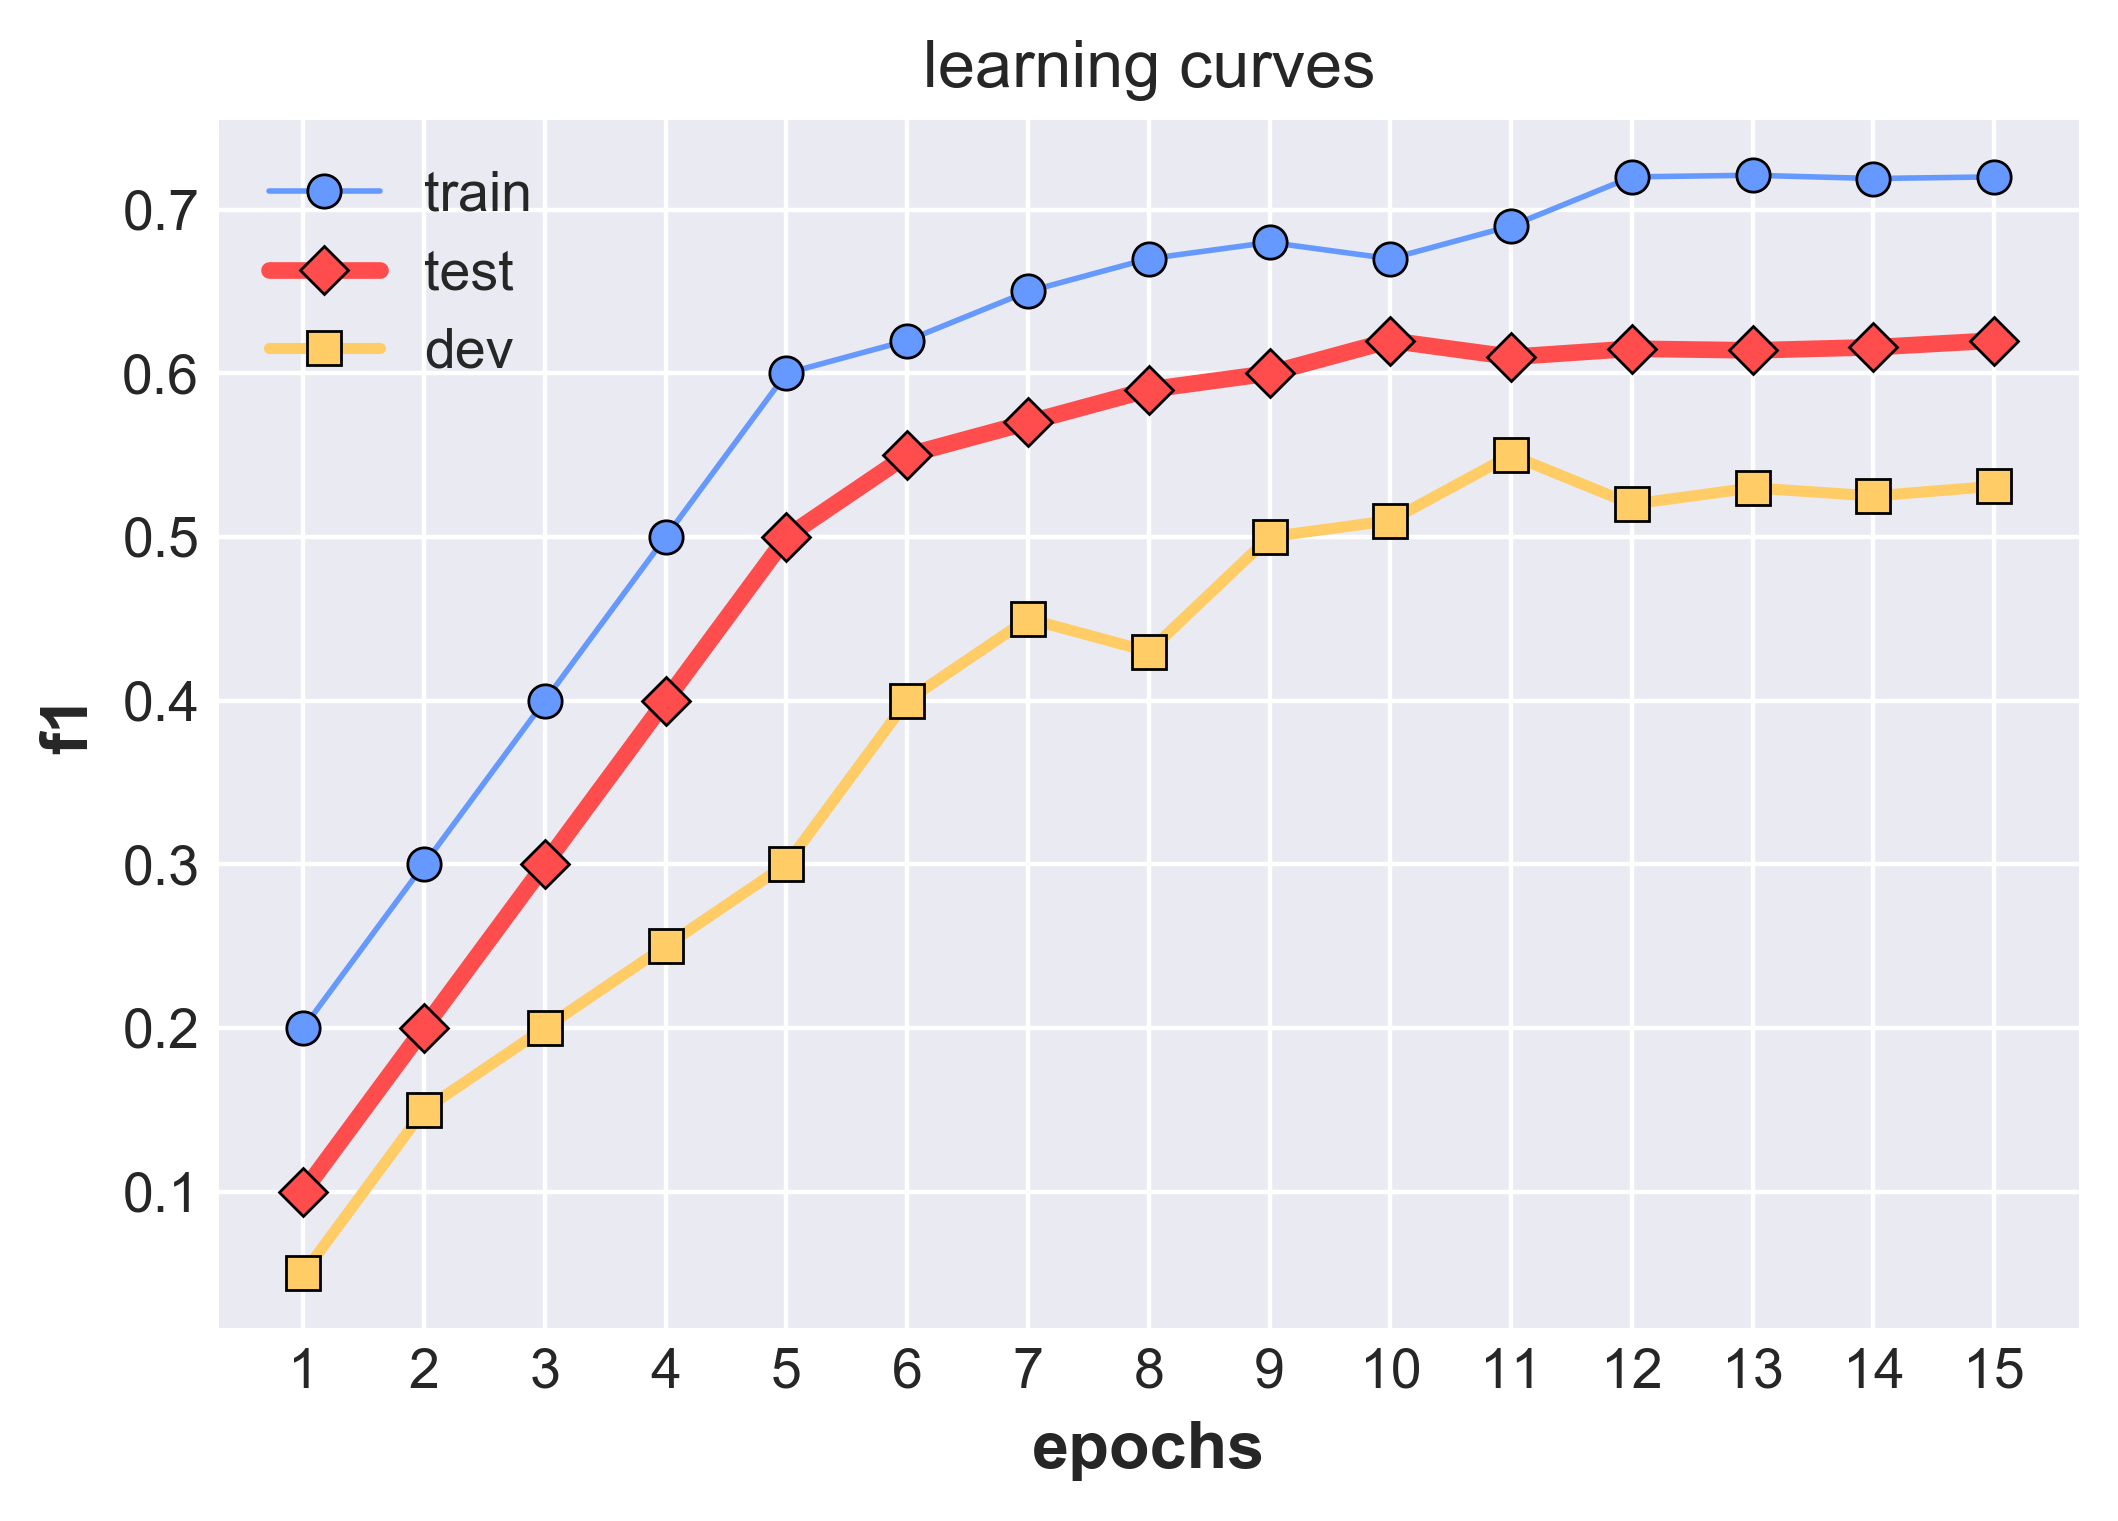

<Figure size 432x288 with 0 Axes>

In [6]:
fig_path = 'figs/'
train_f1 = [0.2, 0.3, 0.4, 0.5, 0.6, 0.62, 0.65, 0.67, 0.68, 0.67, 0.69, 0.72, 0.721, 0.719, 0.72]
dev_f1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.57, 0.59, 0.6, 0.62, 0.61, 0.615, 0.614, 0.6159, 0.62]
test_f1 = [0.05, 0.15, 0.2, 0.25, 0.3, 0.4, 0.45, 0.43, 0.5, 0.51, 0.55, 0.52, 0.53, 0.525, 0.531]
flist = [train_f1, dev_f1, test_f1]
n_epochs = 15
plot_learning_curves(fig_path + 'learning_curve.png', n_epochs , flist)

And the same figure with all available styles.

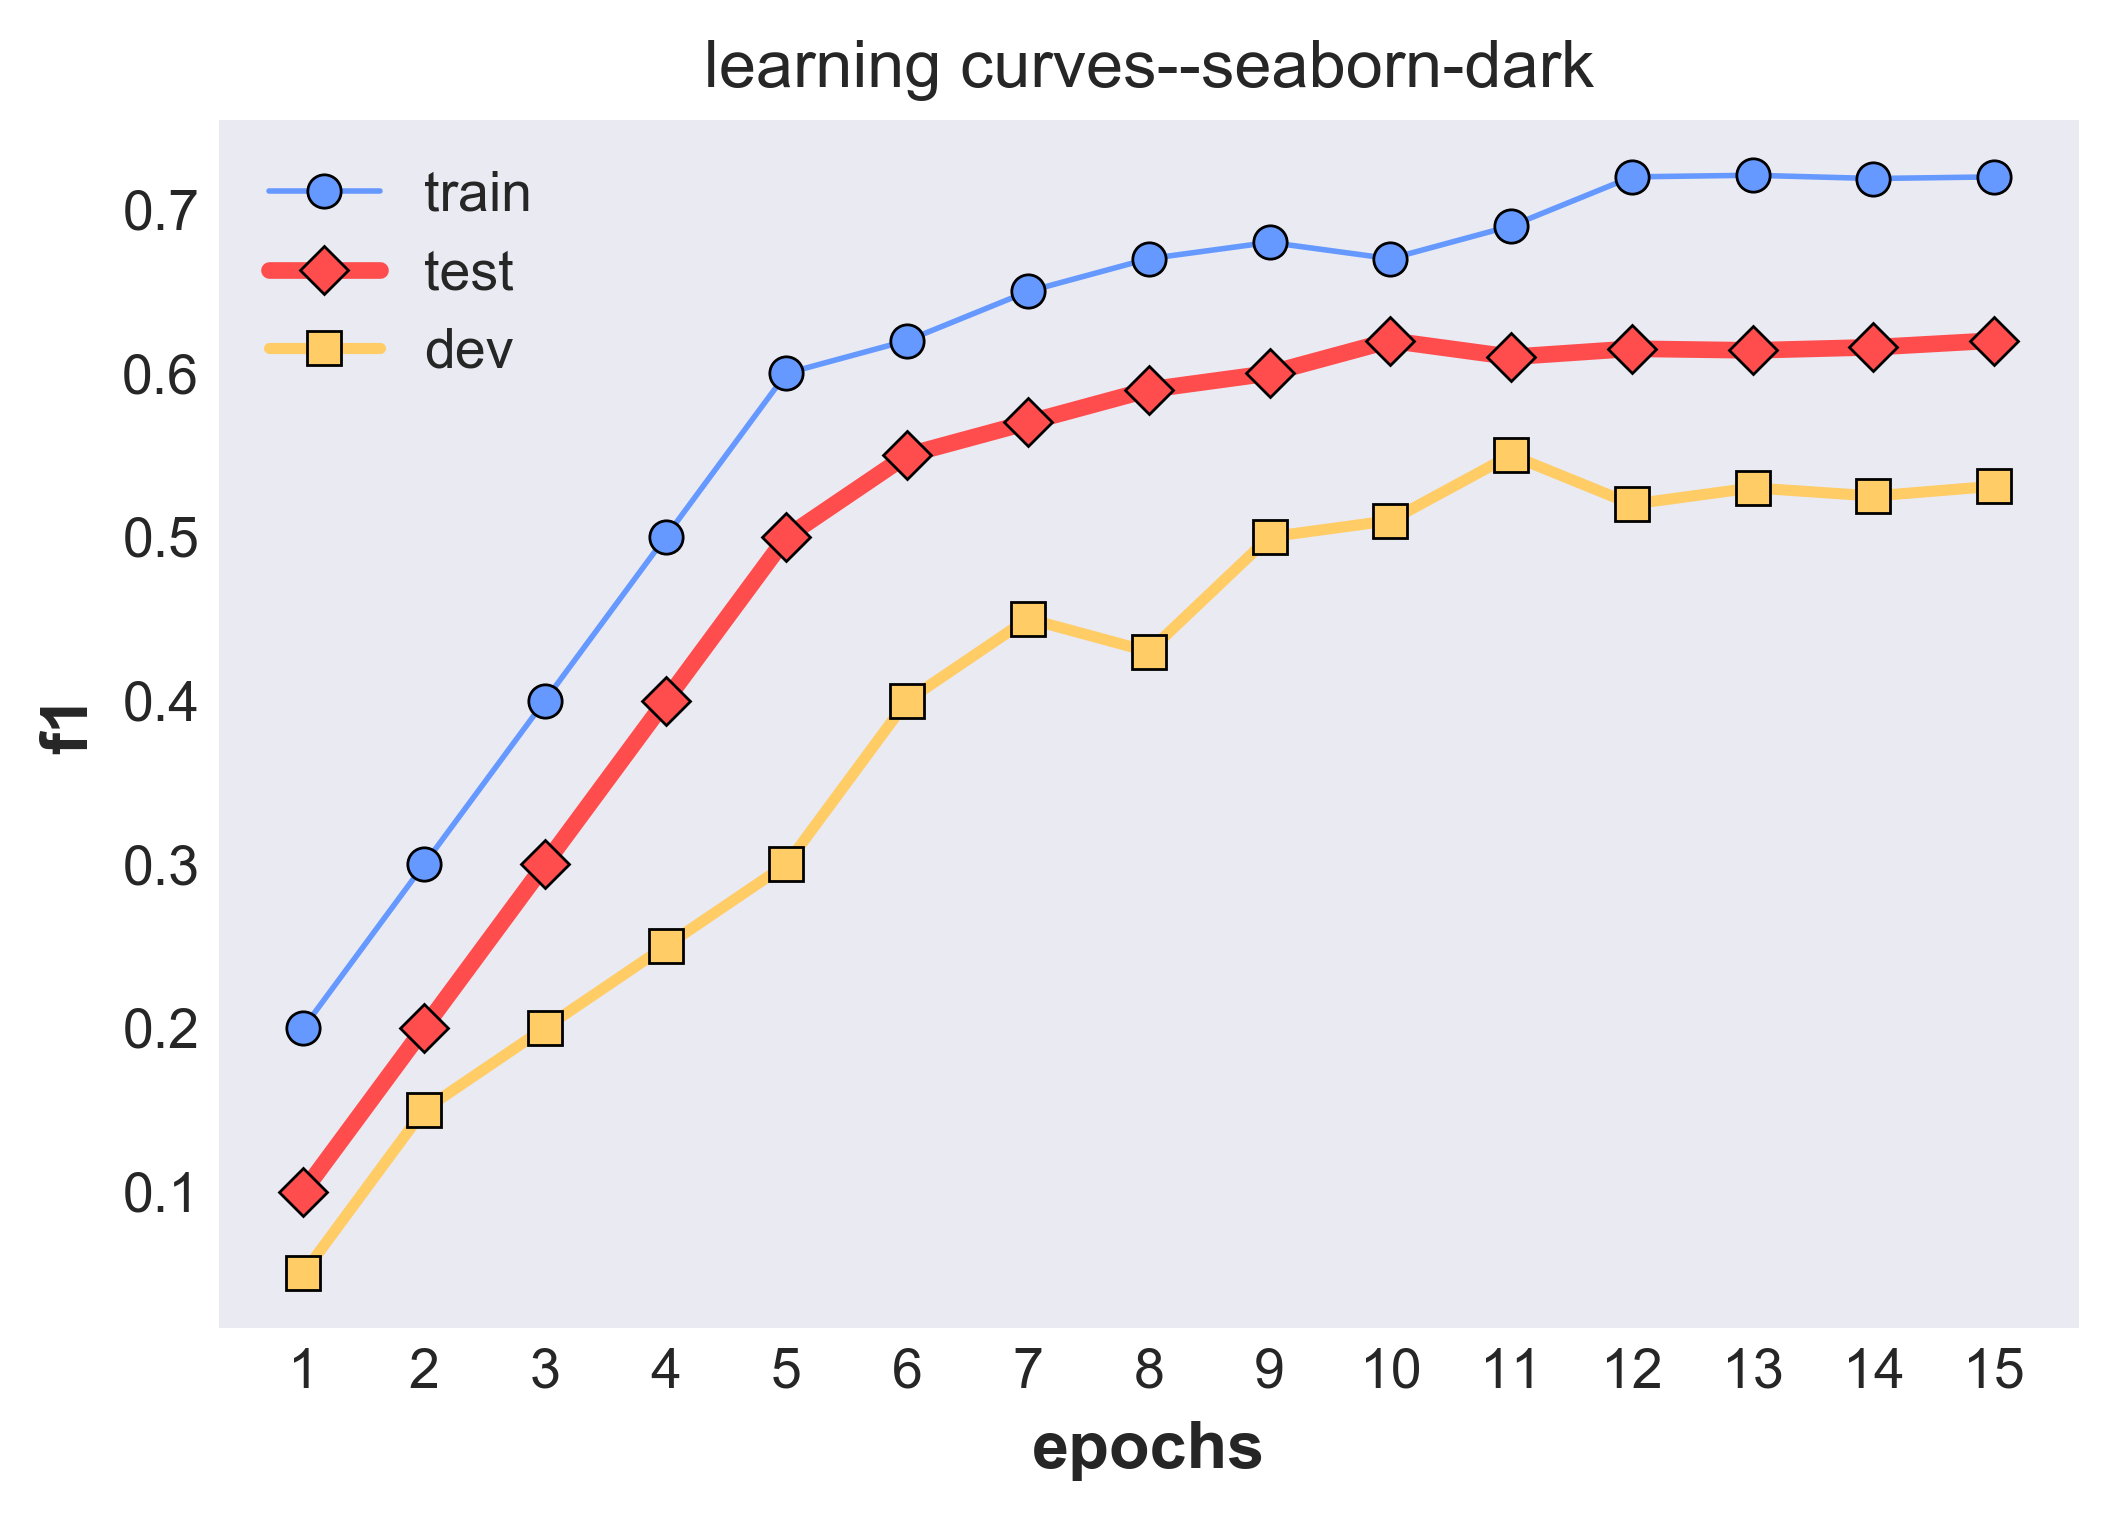

<Figure size 432x288 with 0 Axes>

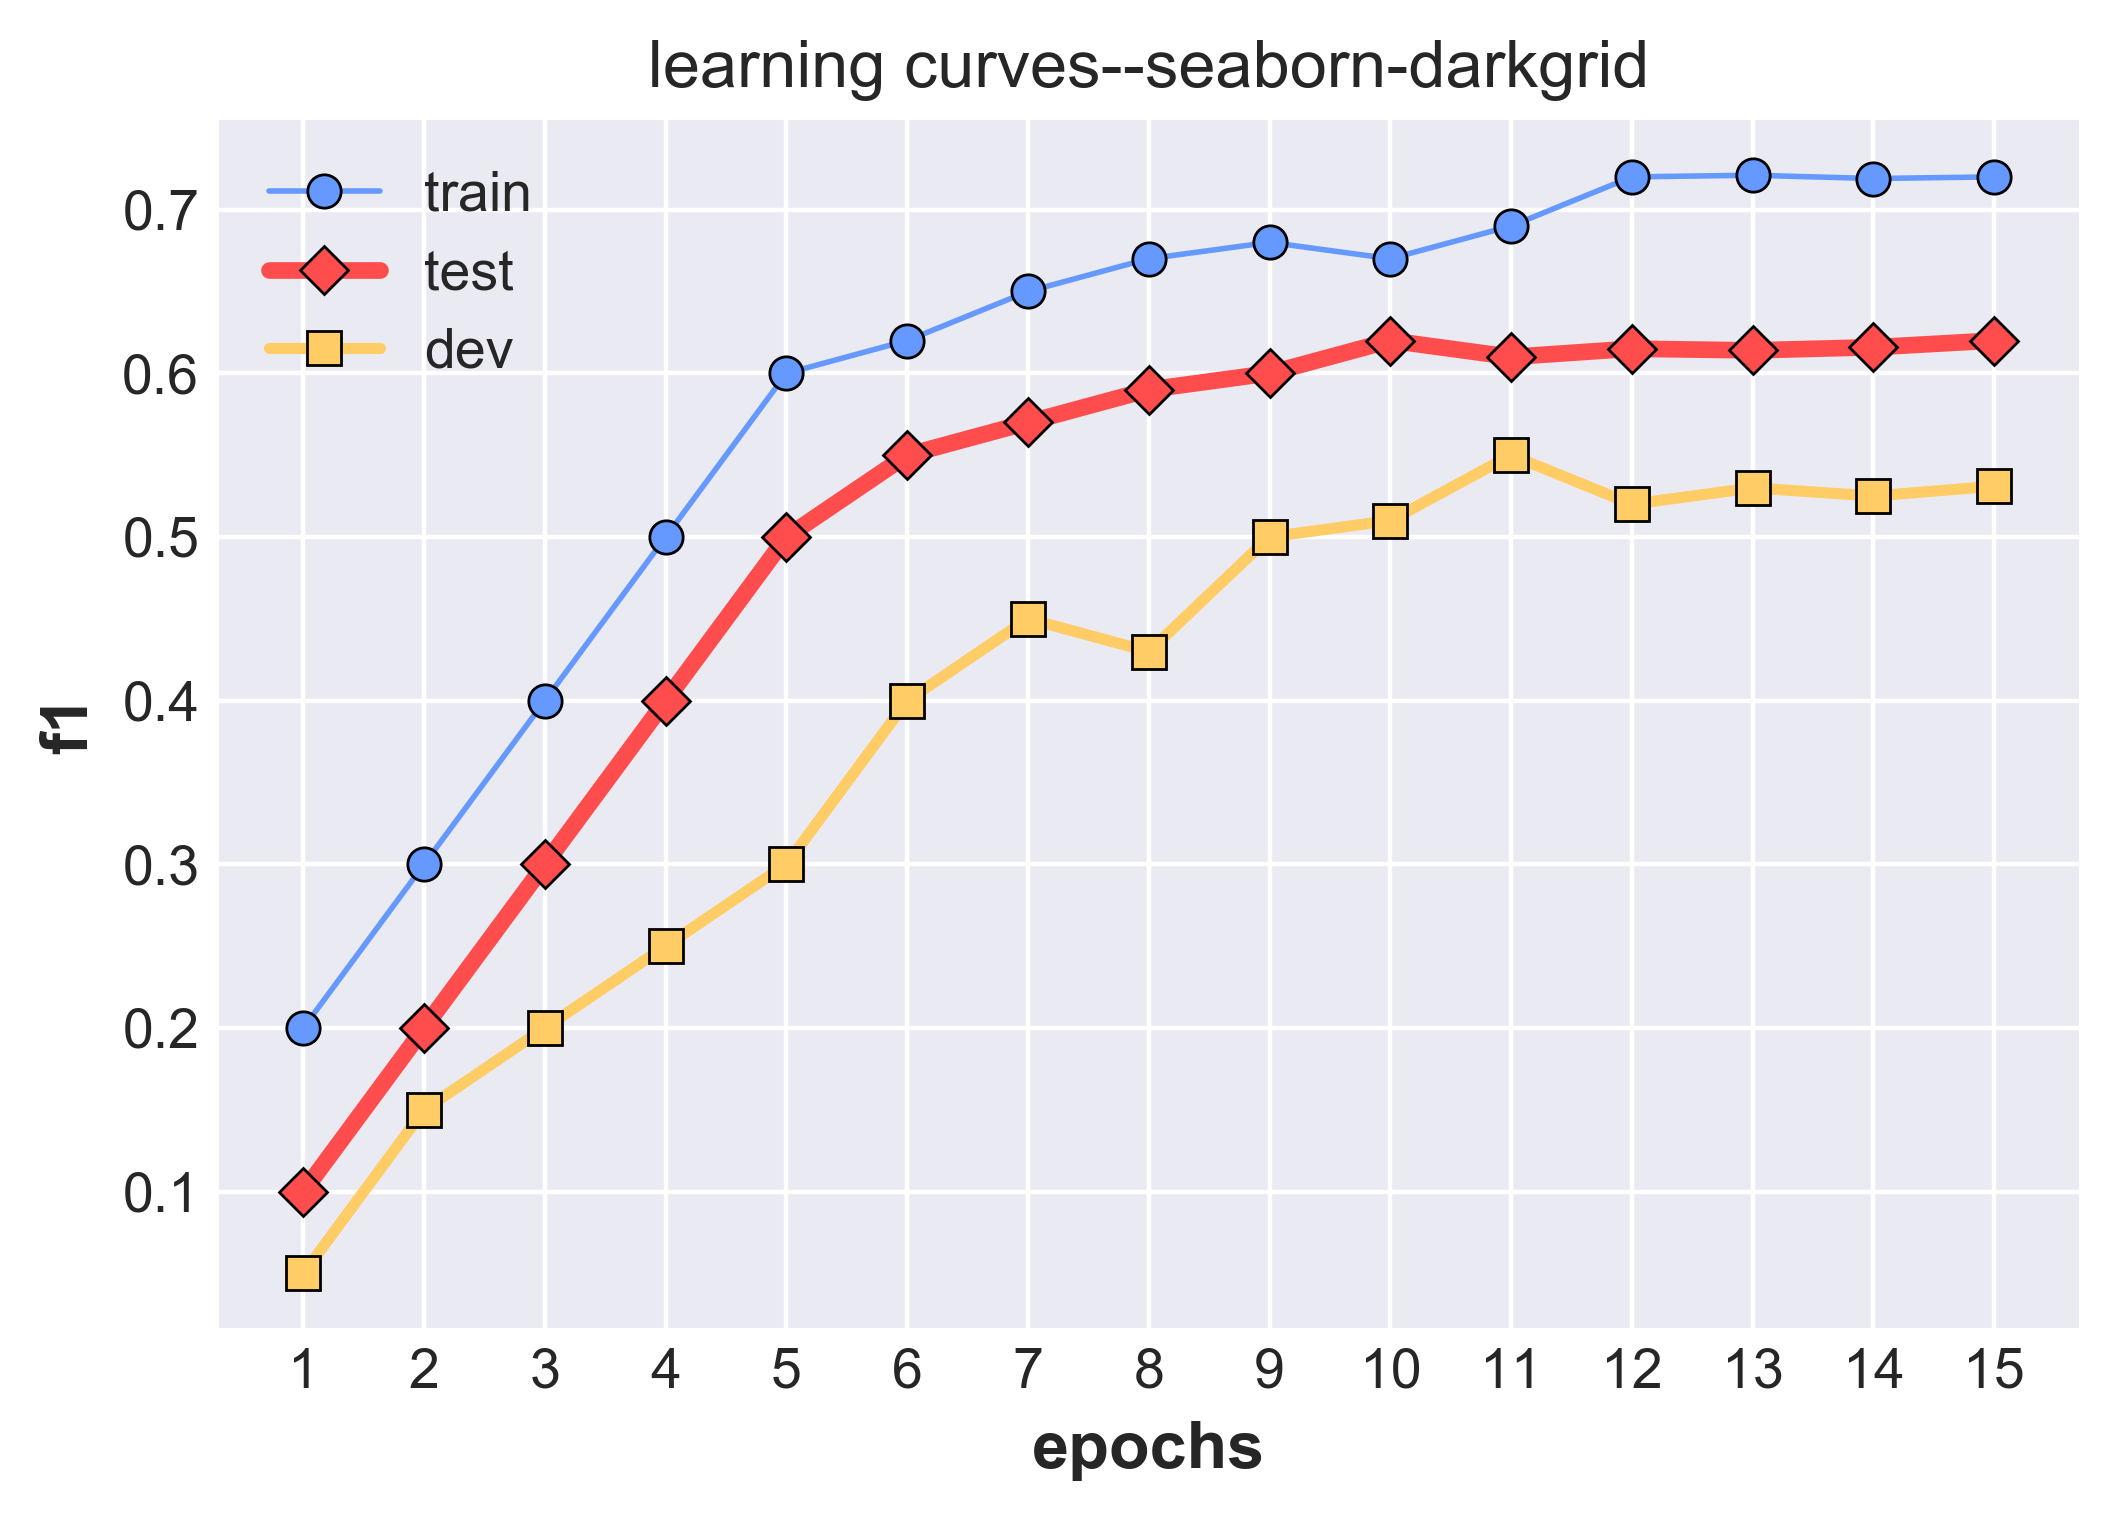

<Figure size 432x288 with 0 Axes>

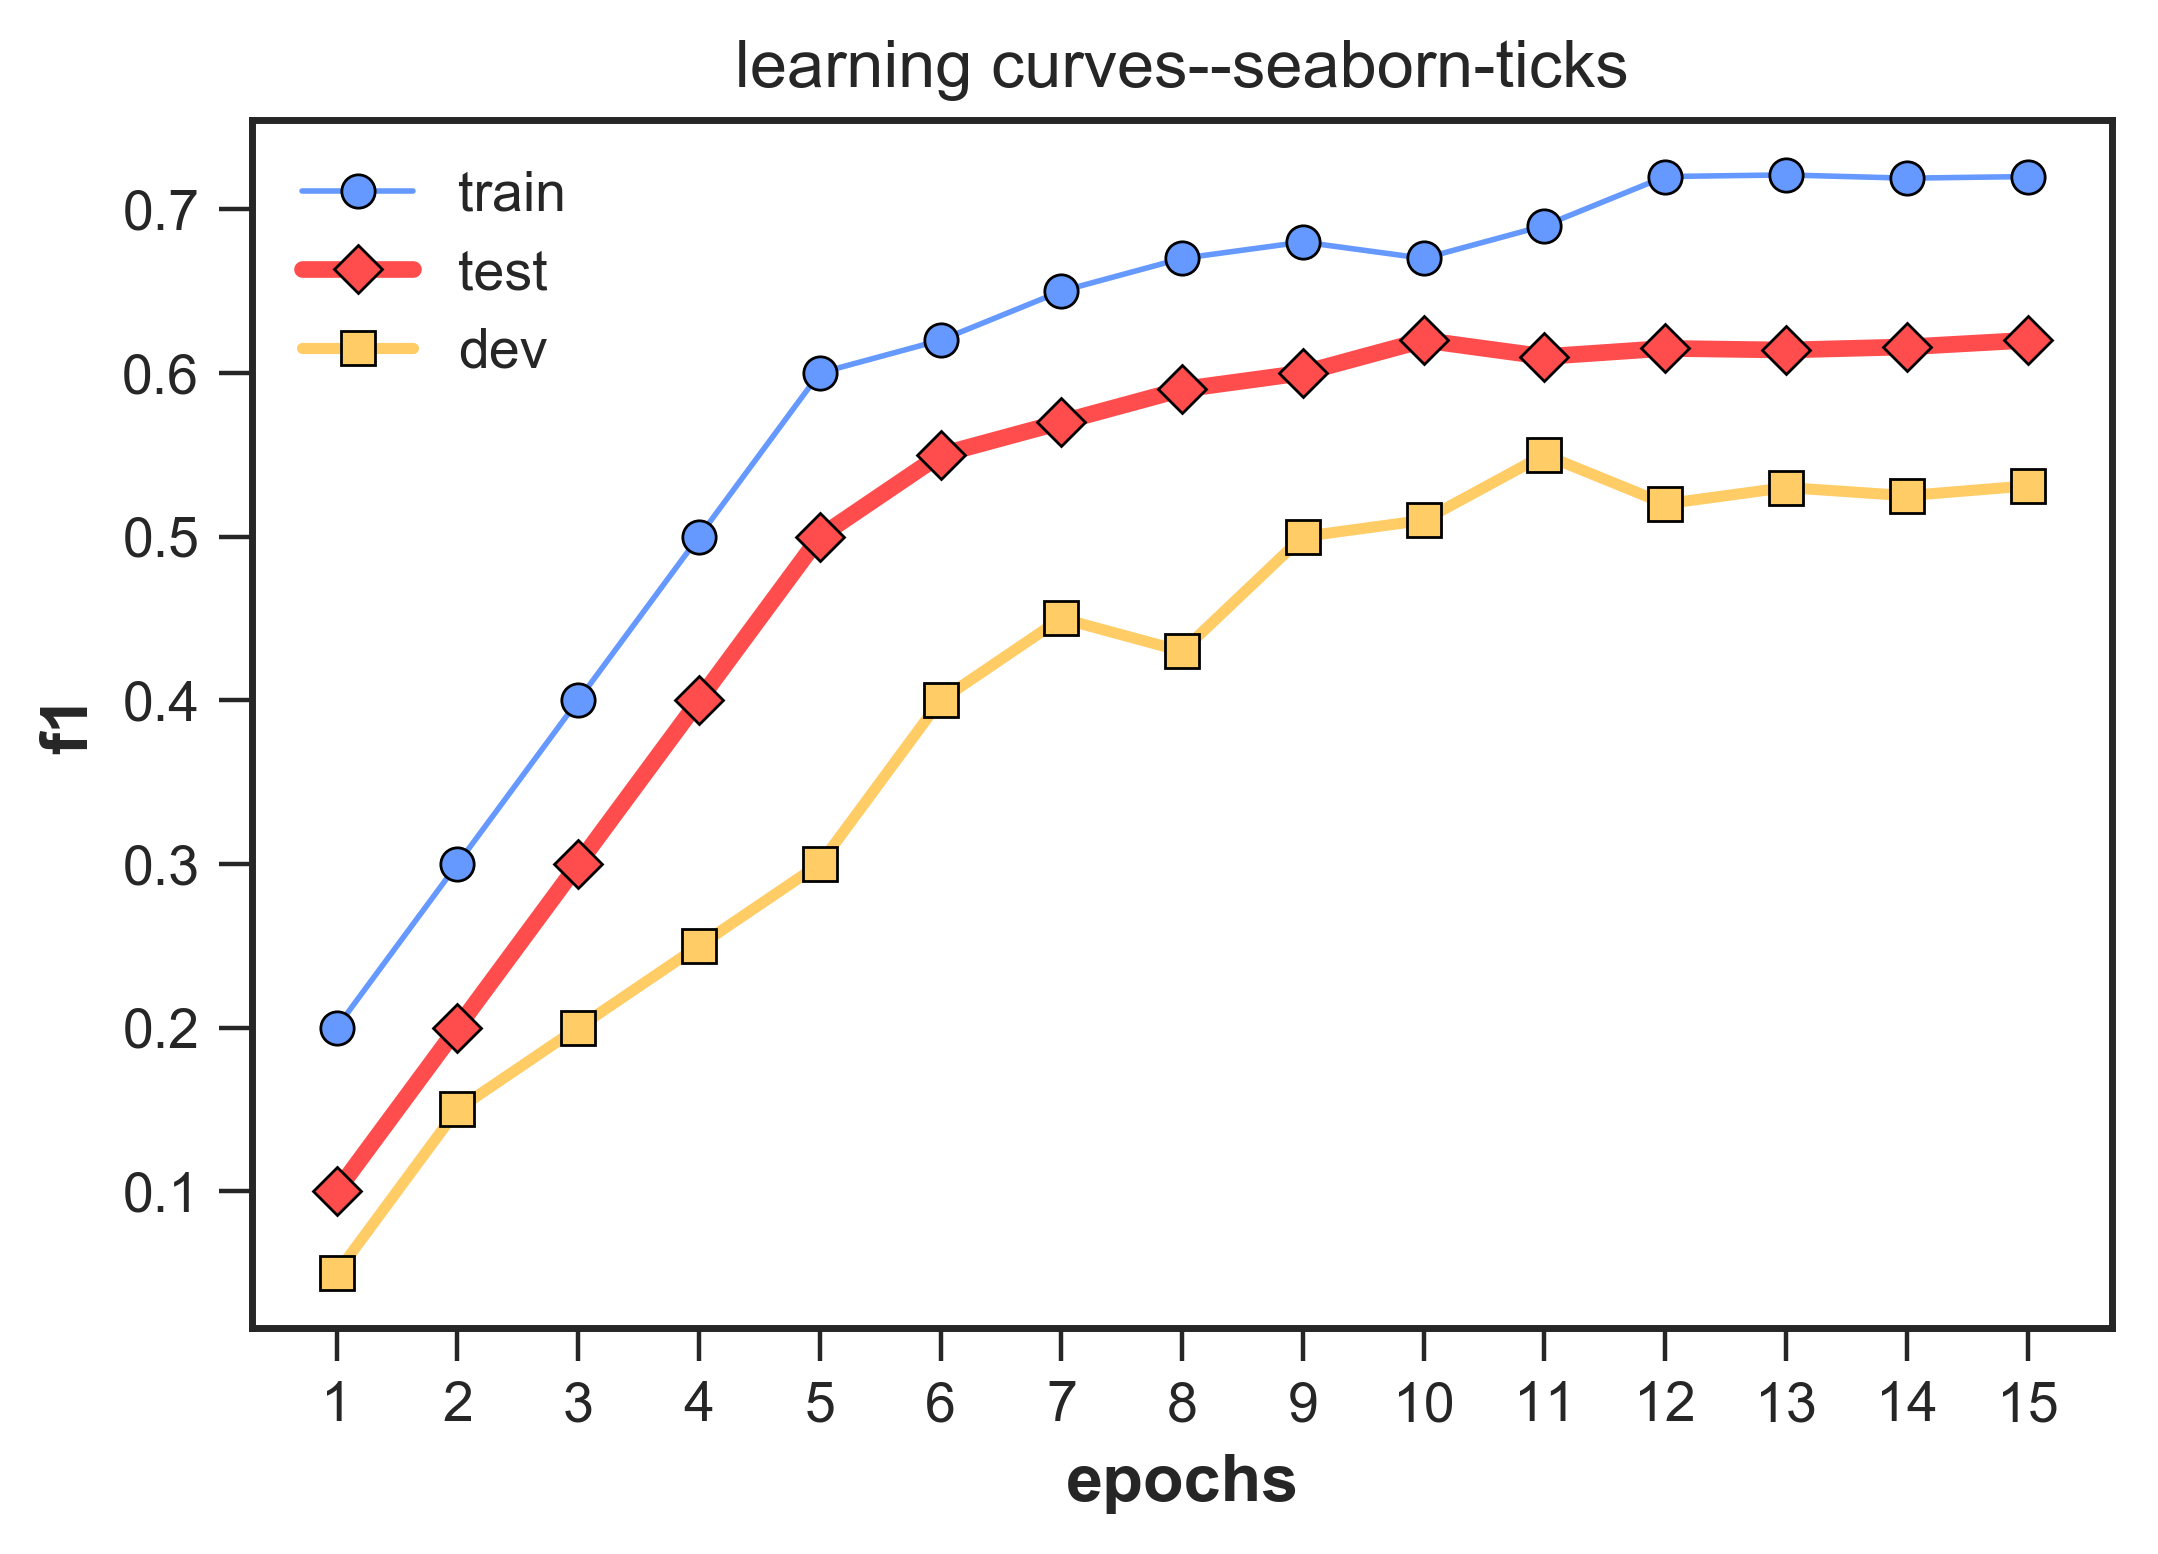

<Figure size 432x288 with 0 Axes>

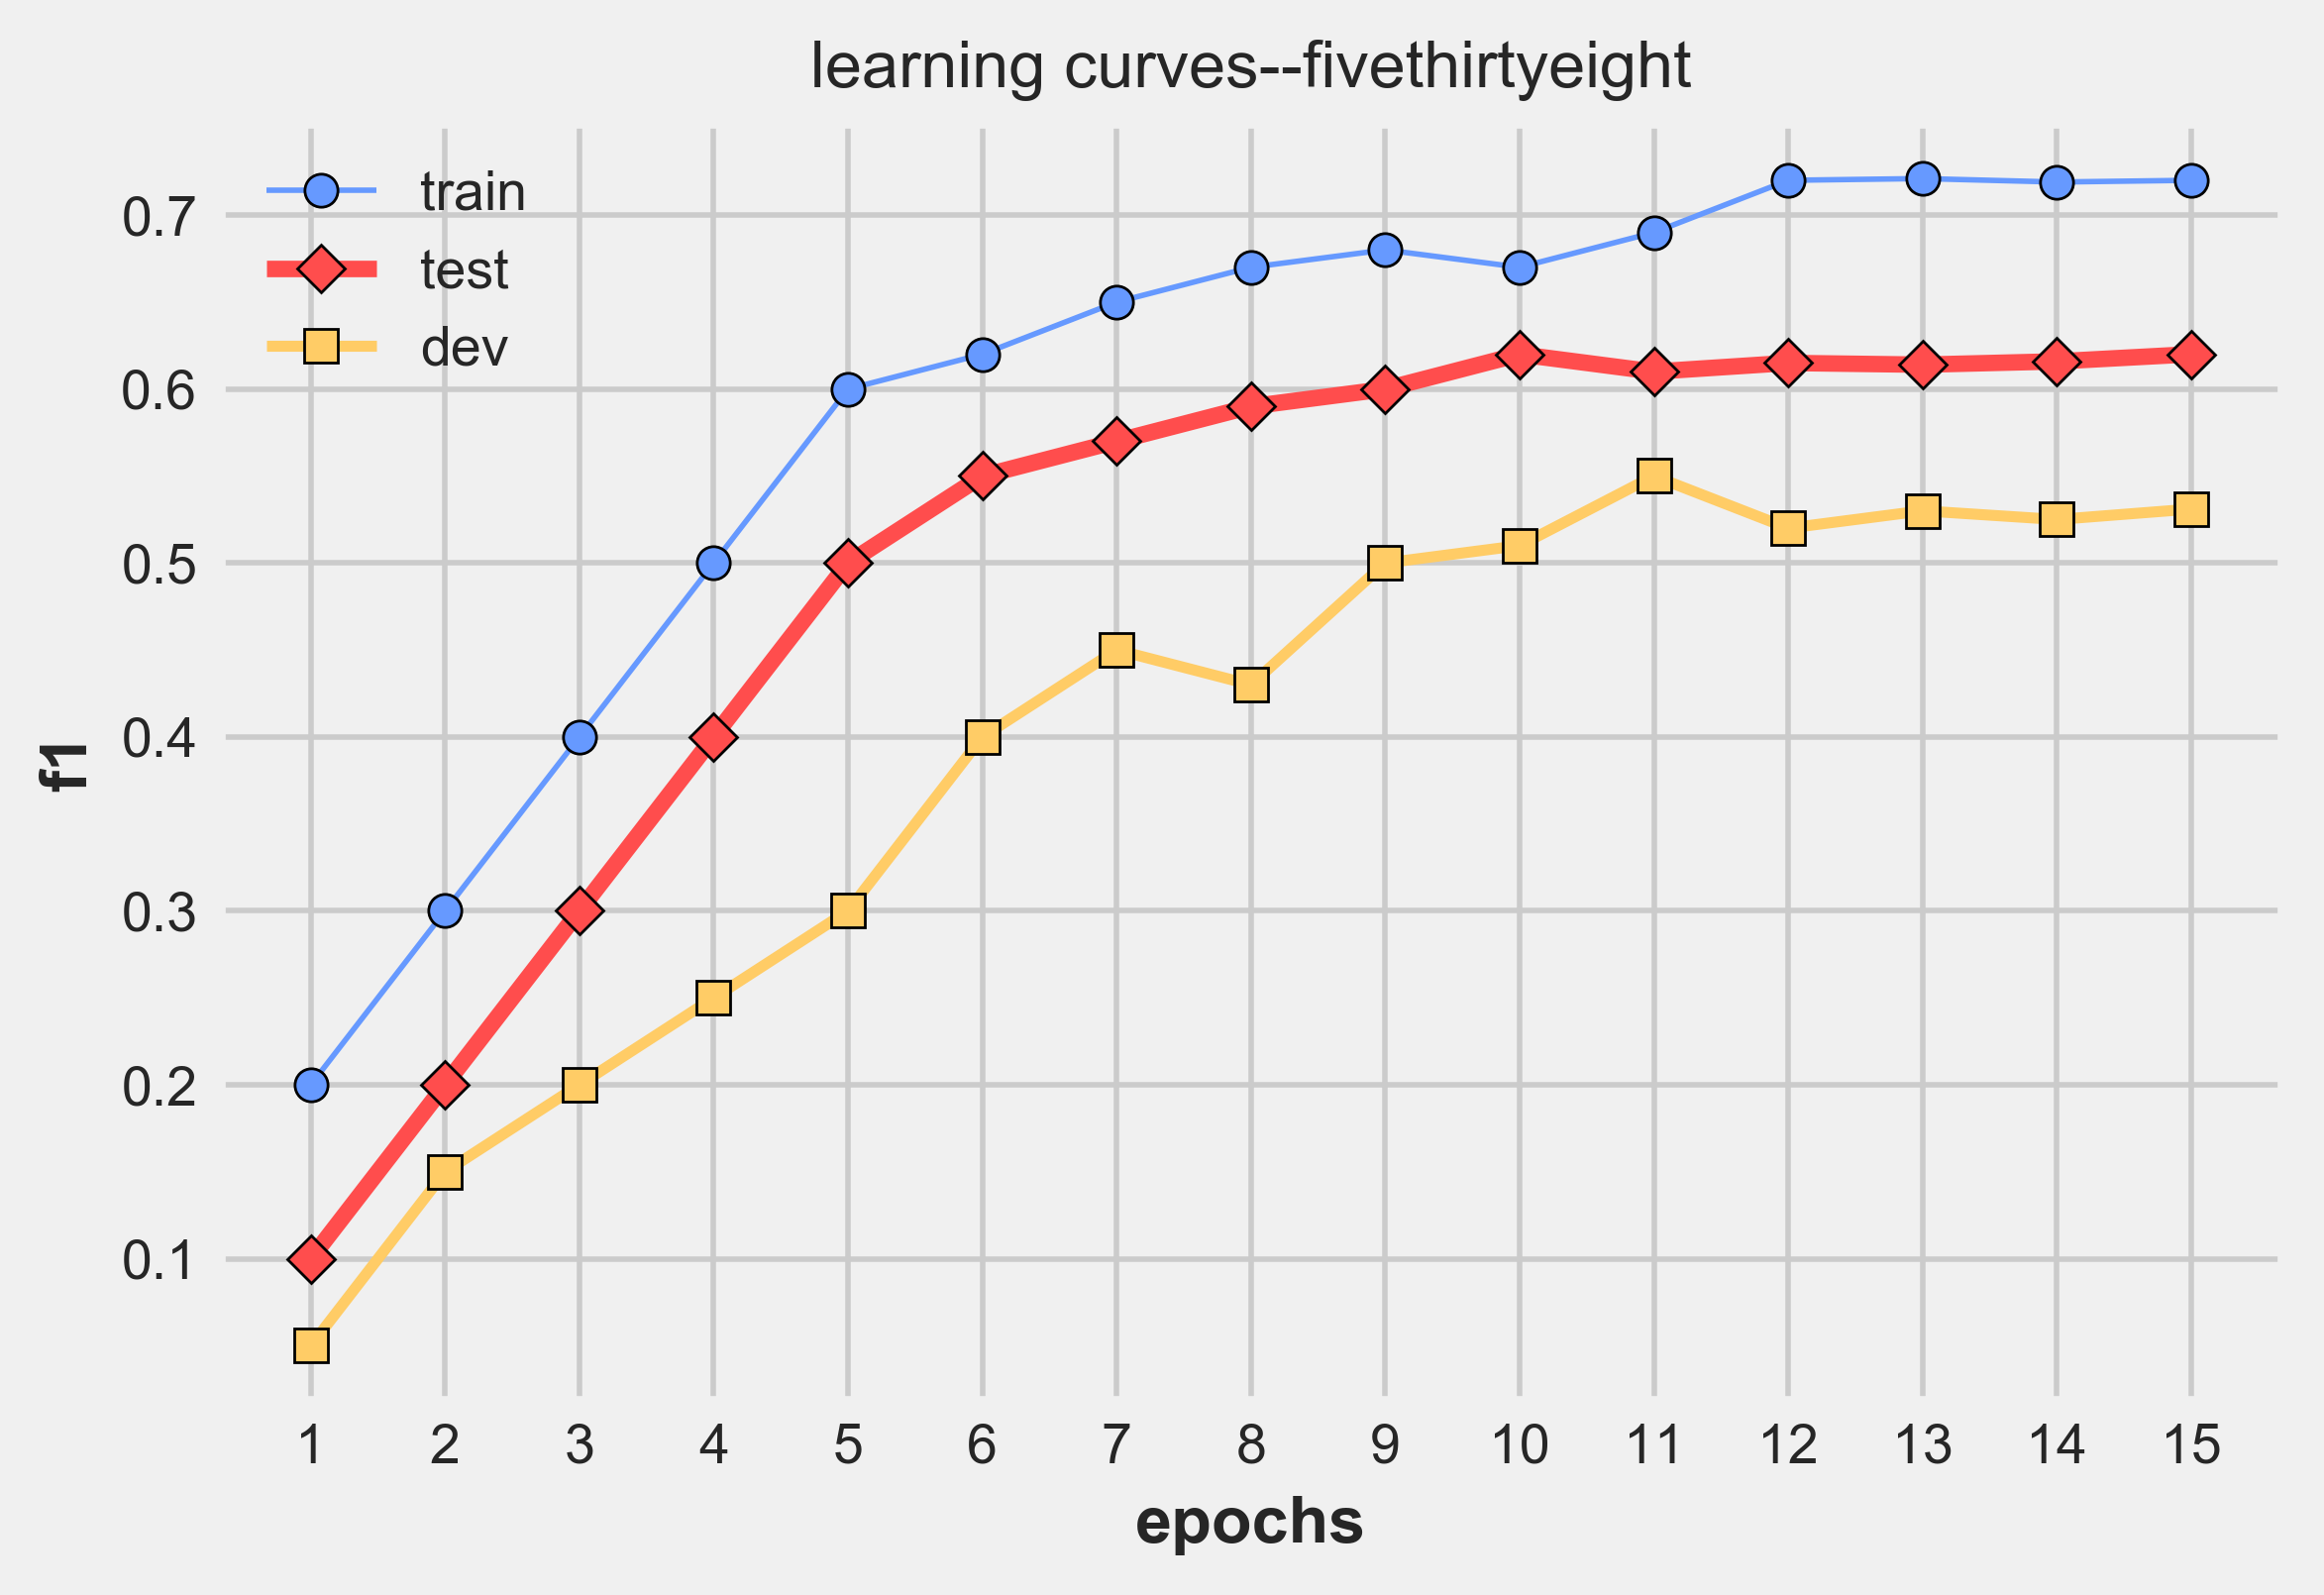

<Figure size 432x288 with 0 Axes>

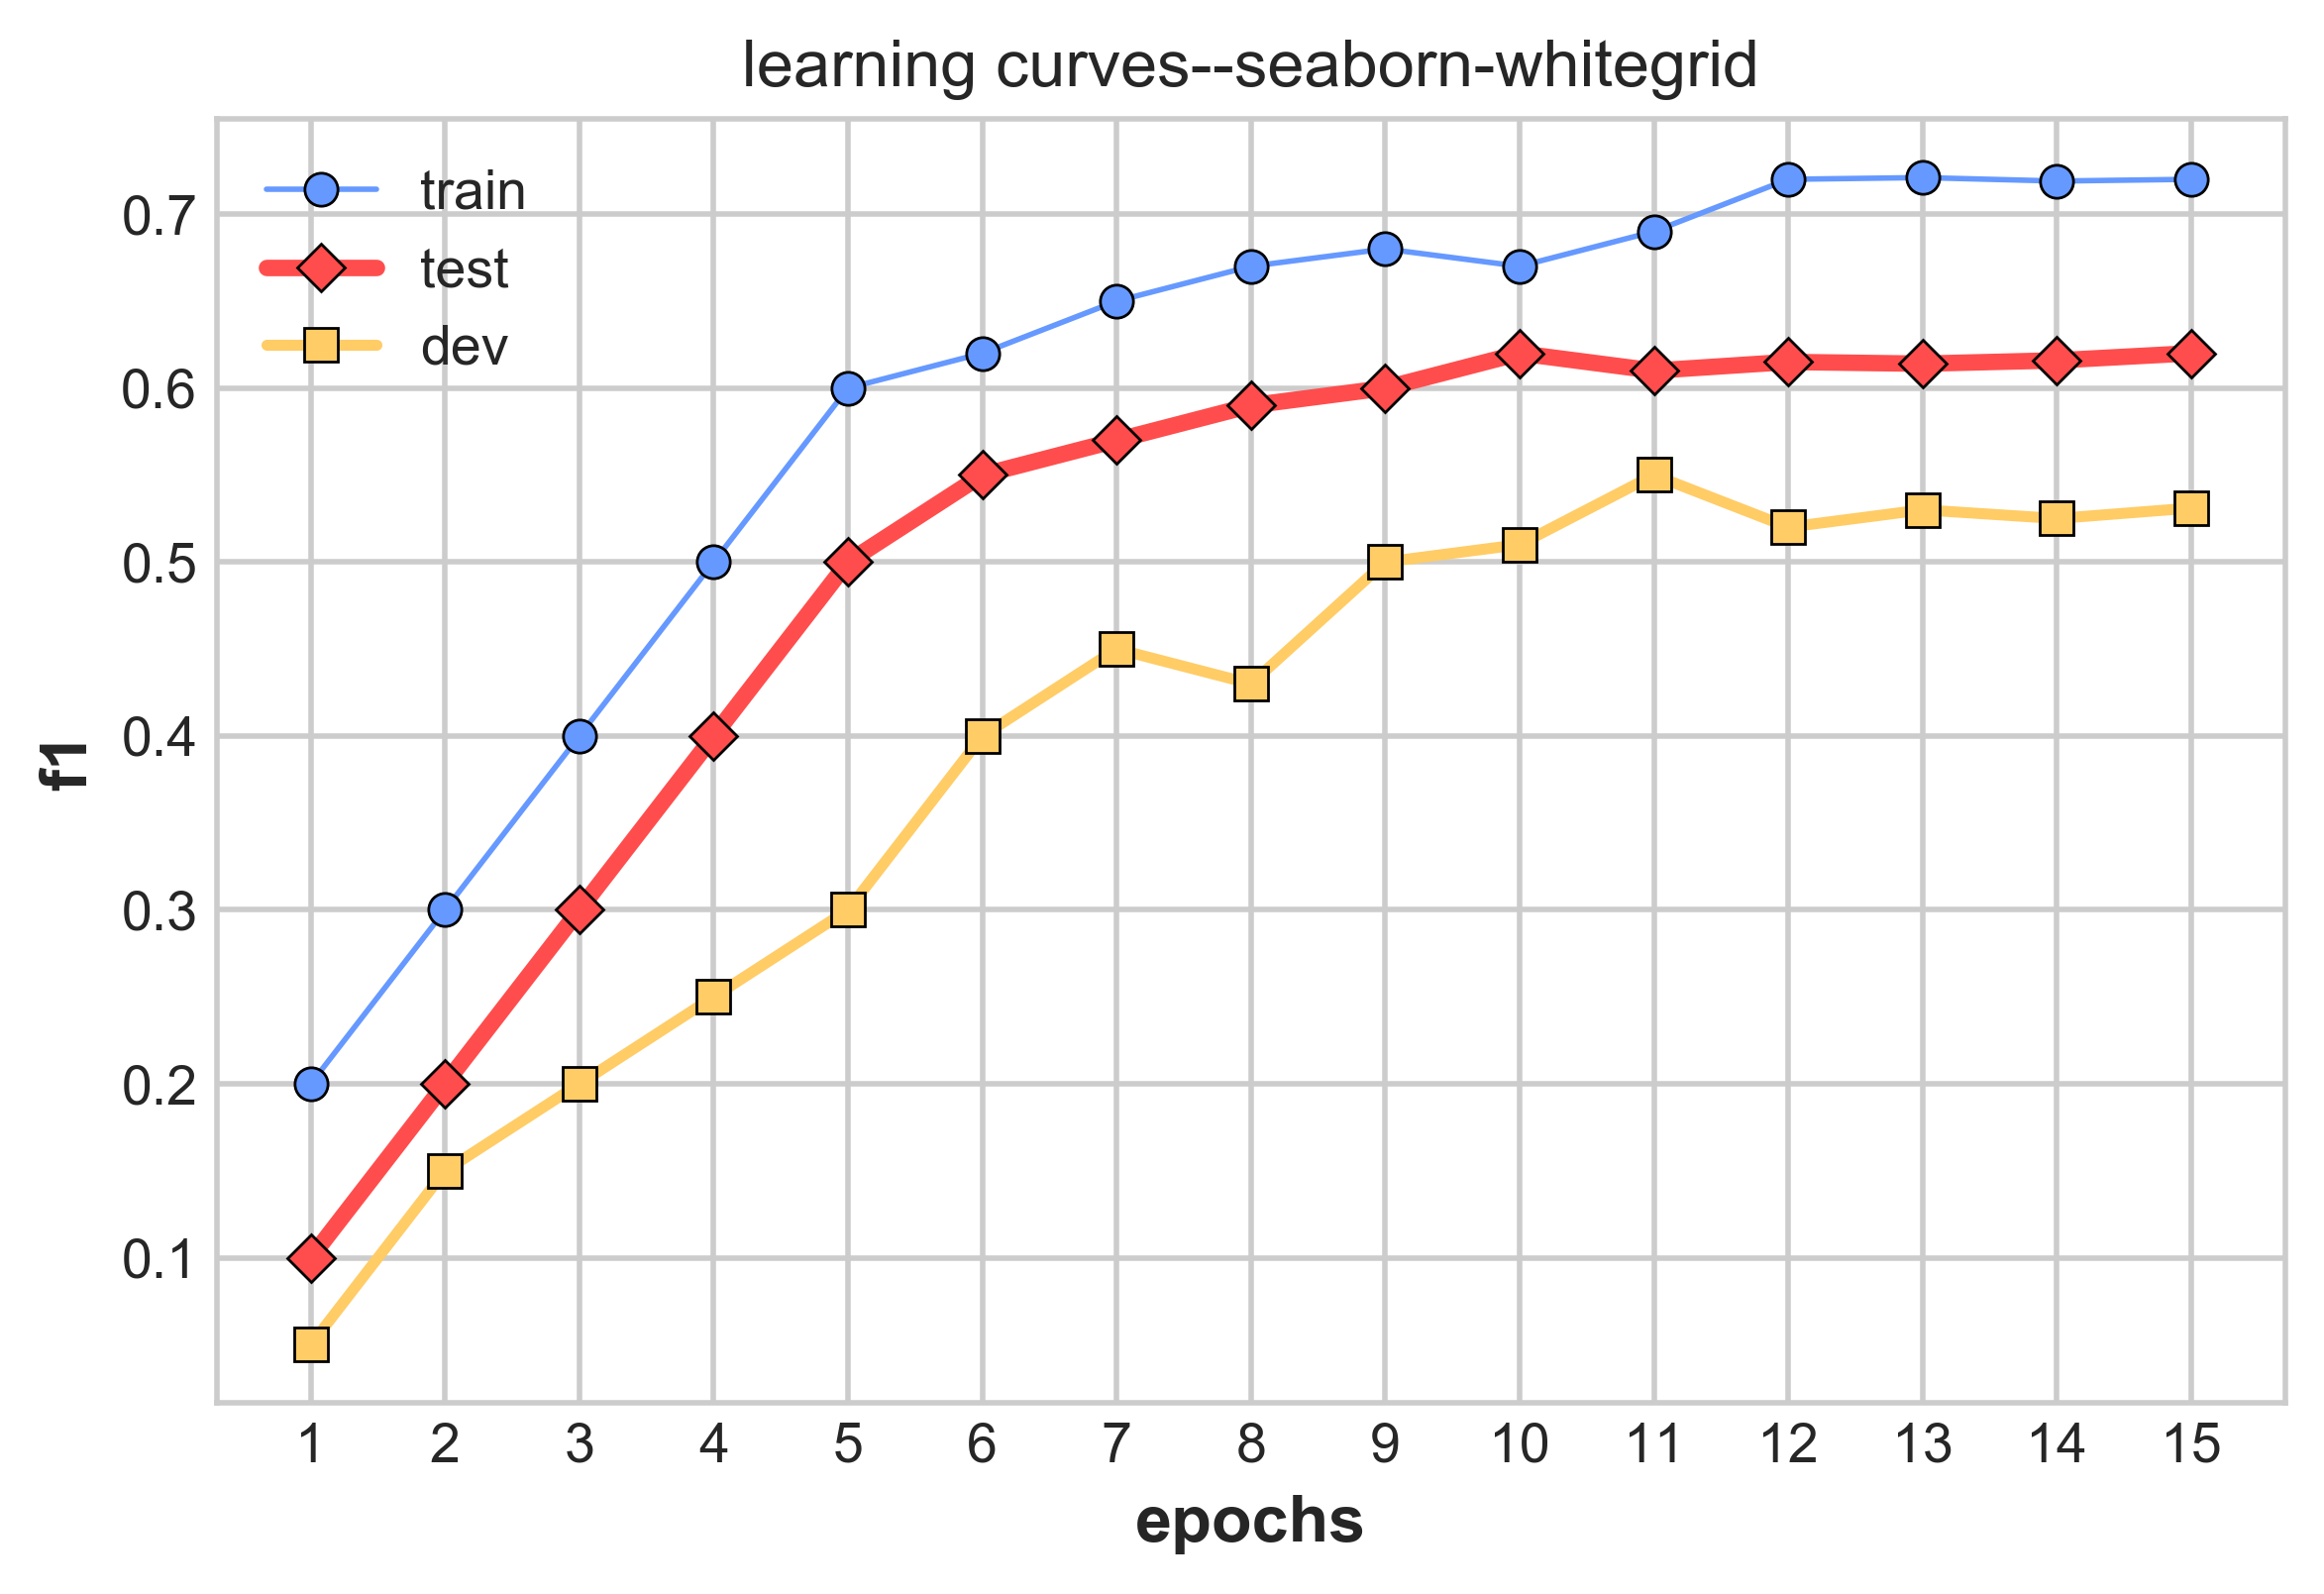

<Figure size 432x288 with 0 Axes>

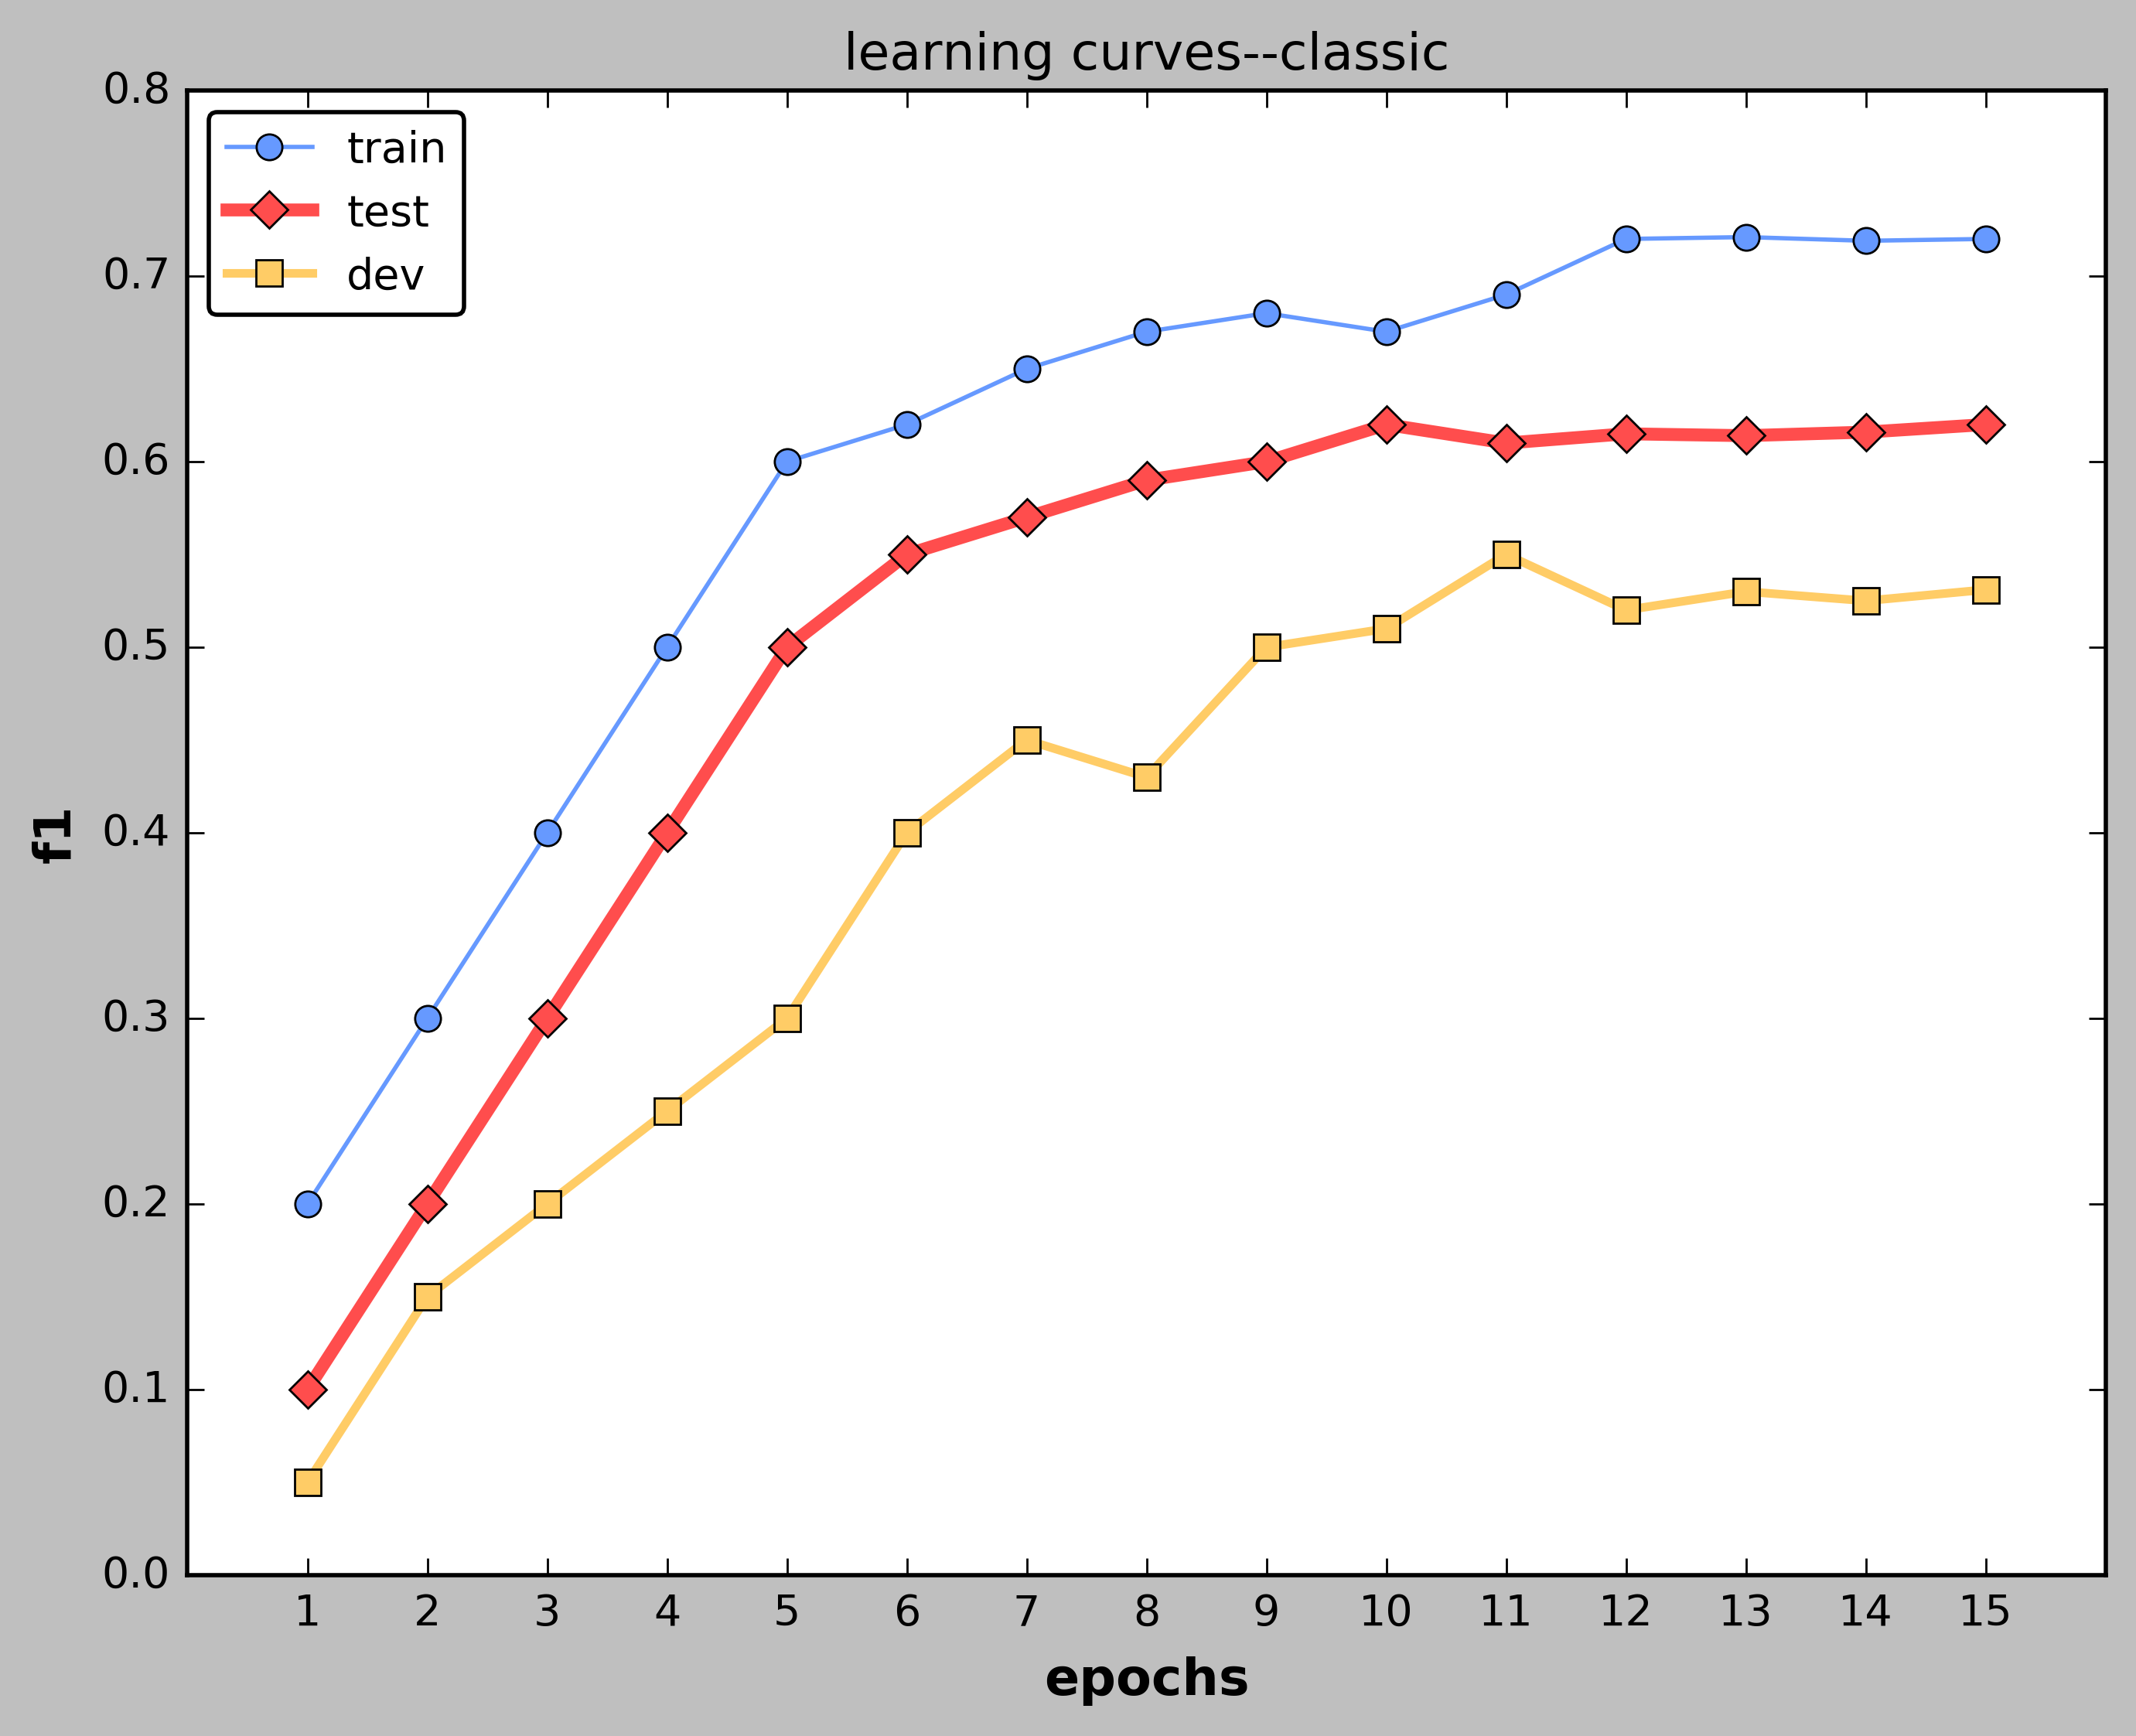

<Figure size 640x480 with 0 Axes>

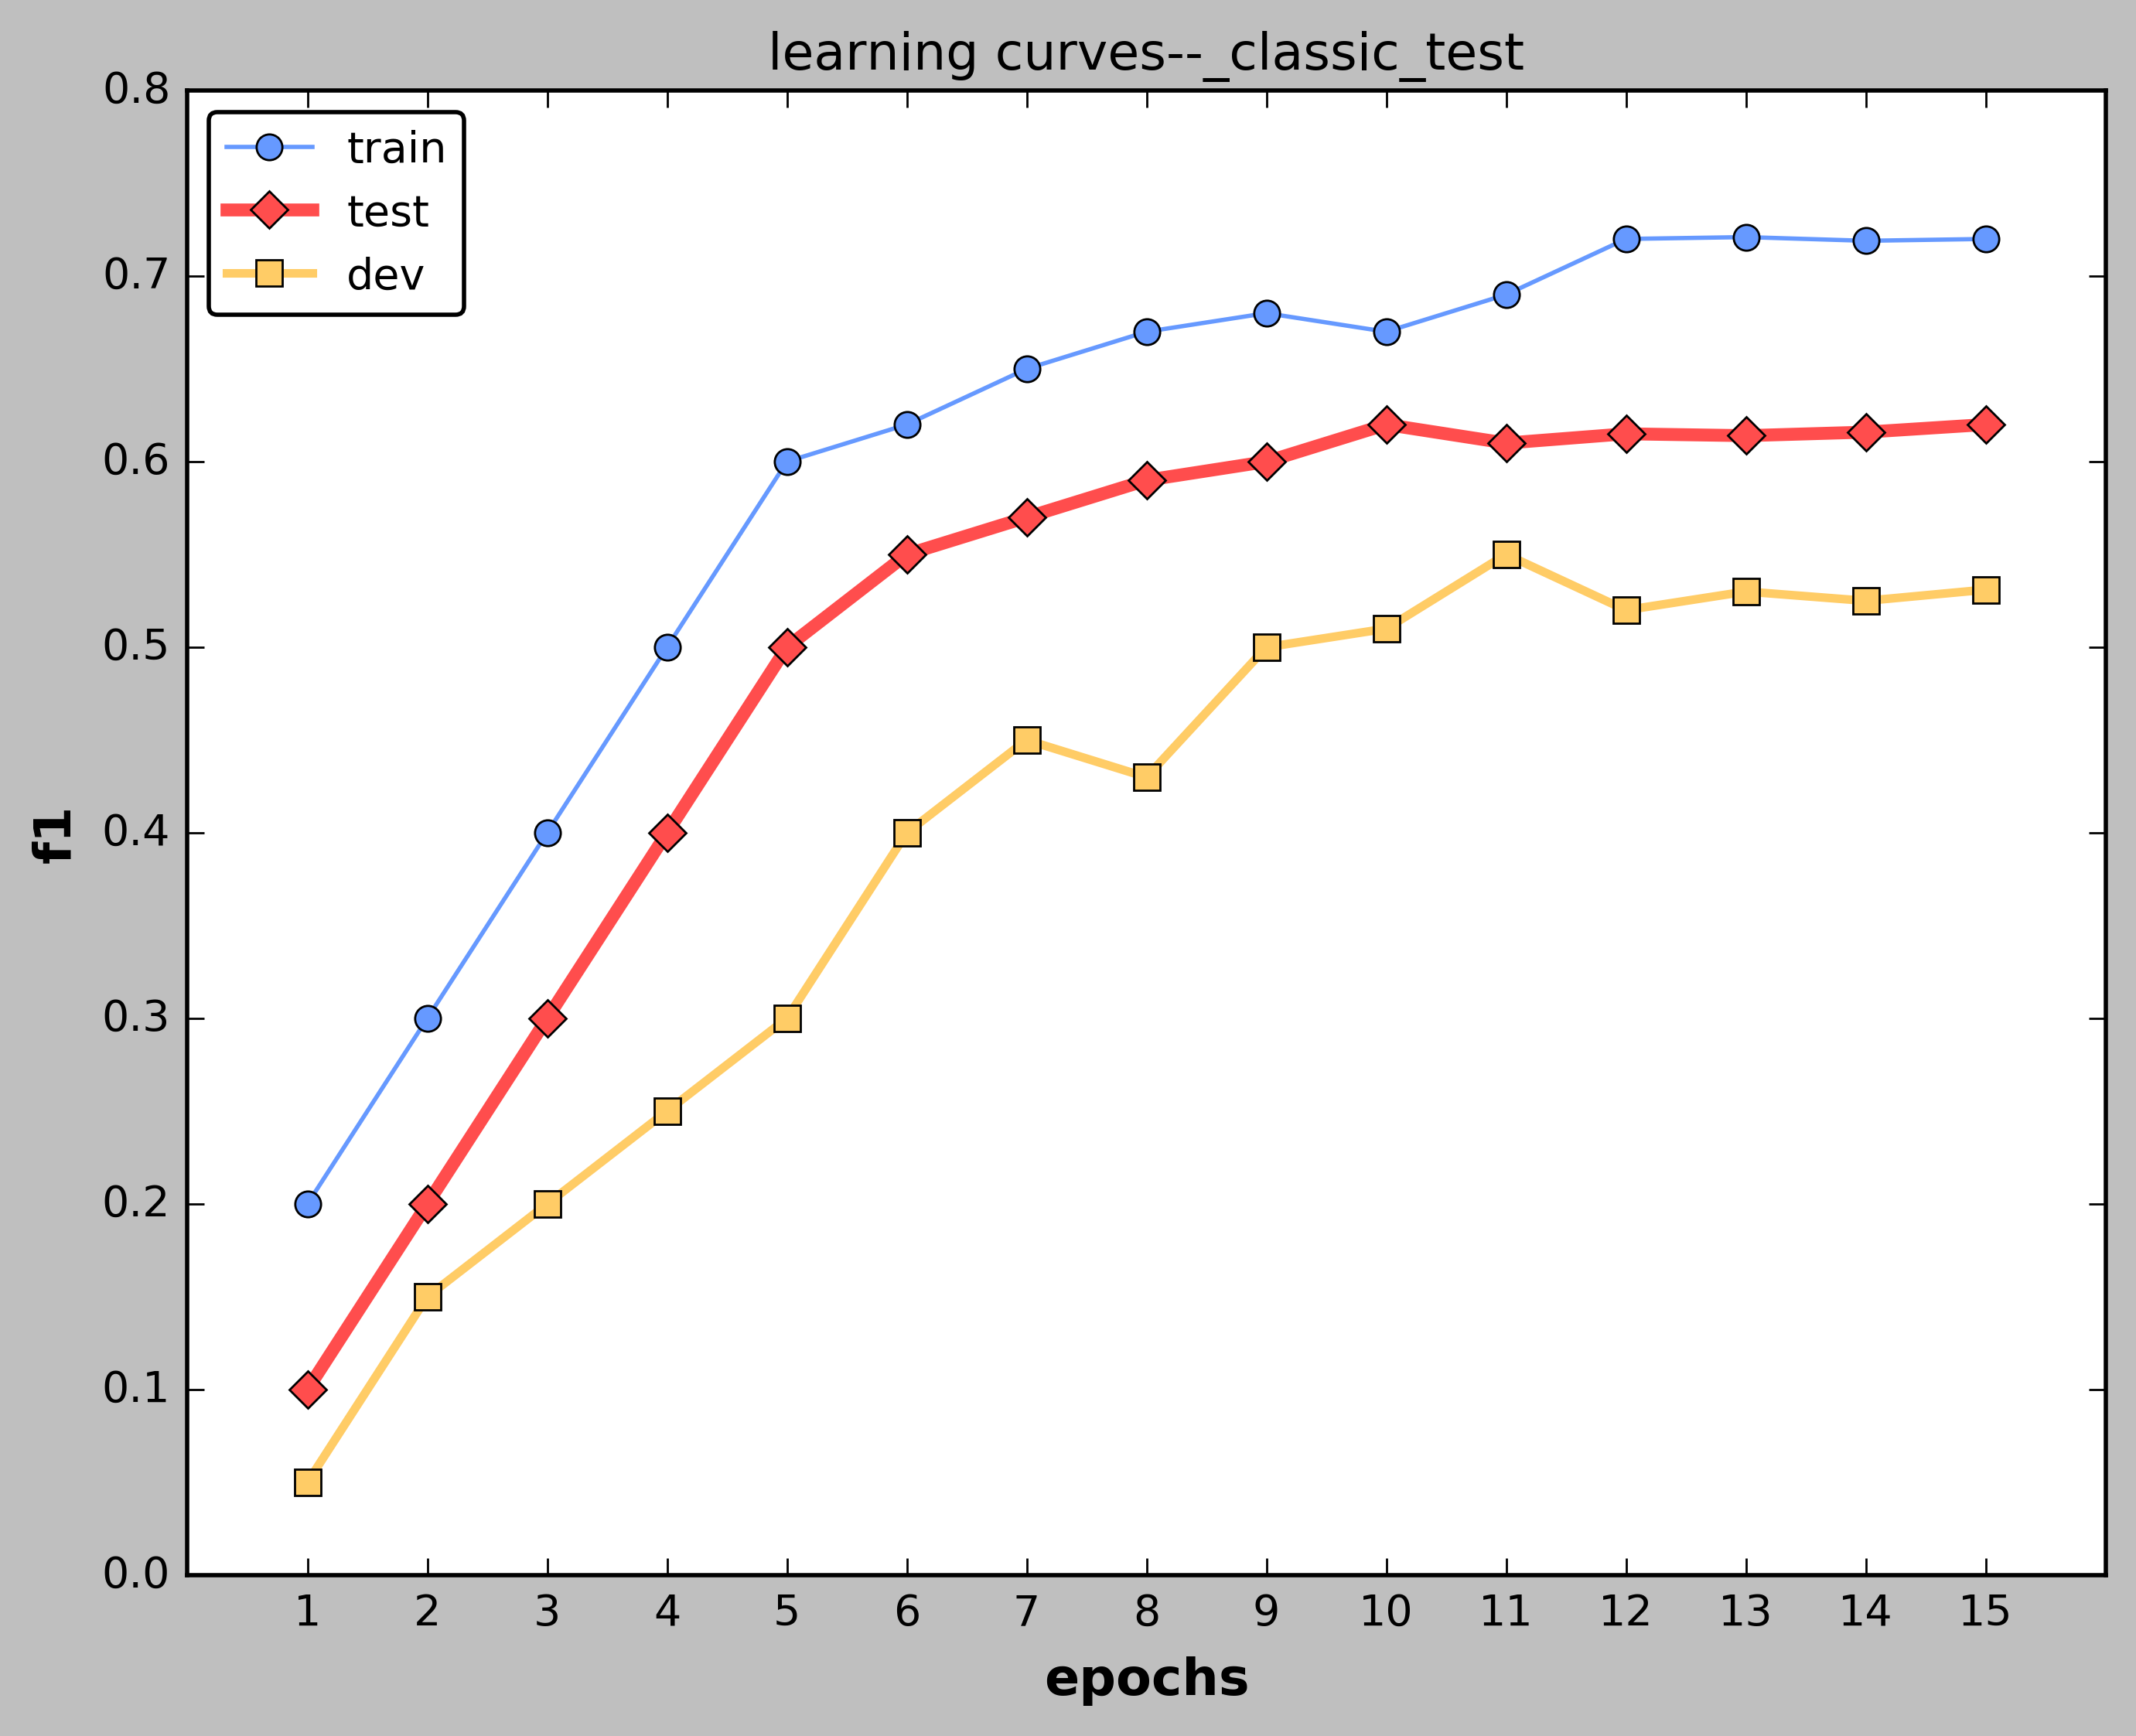

<Figure size 640x480 with 0 Axes>

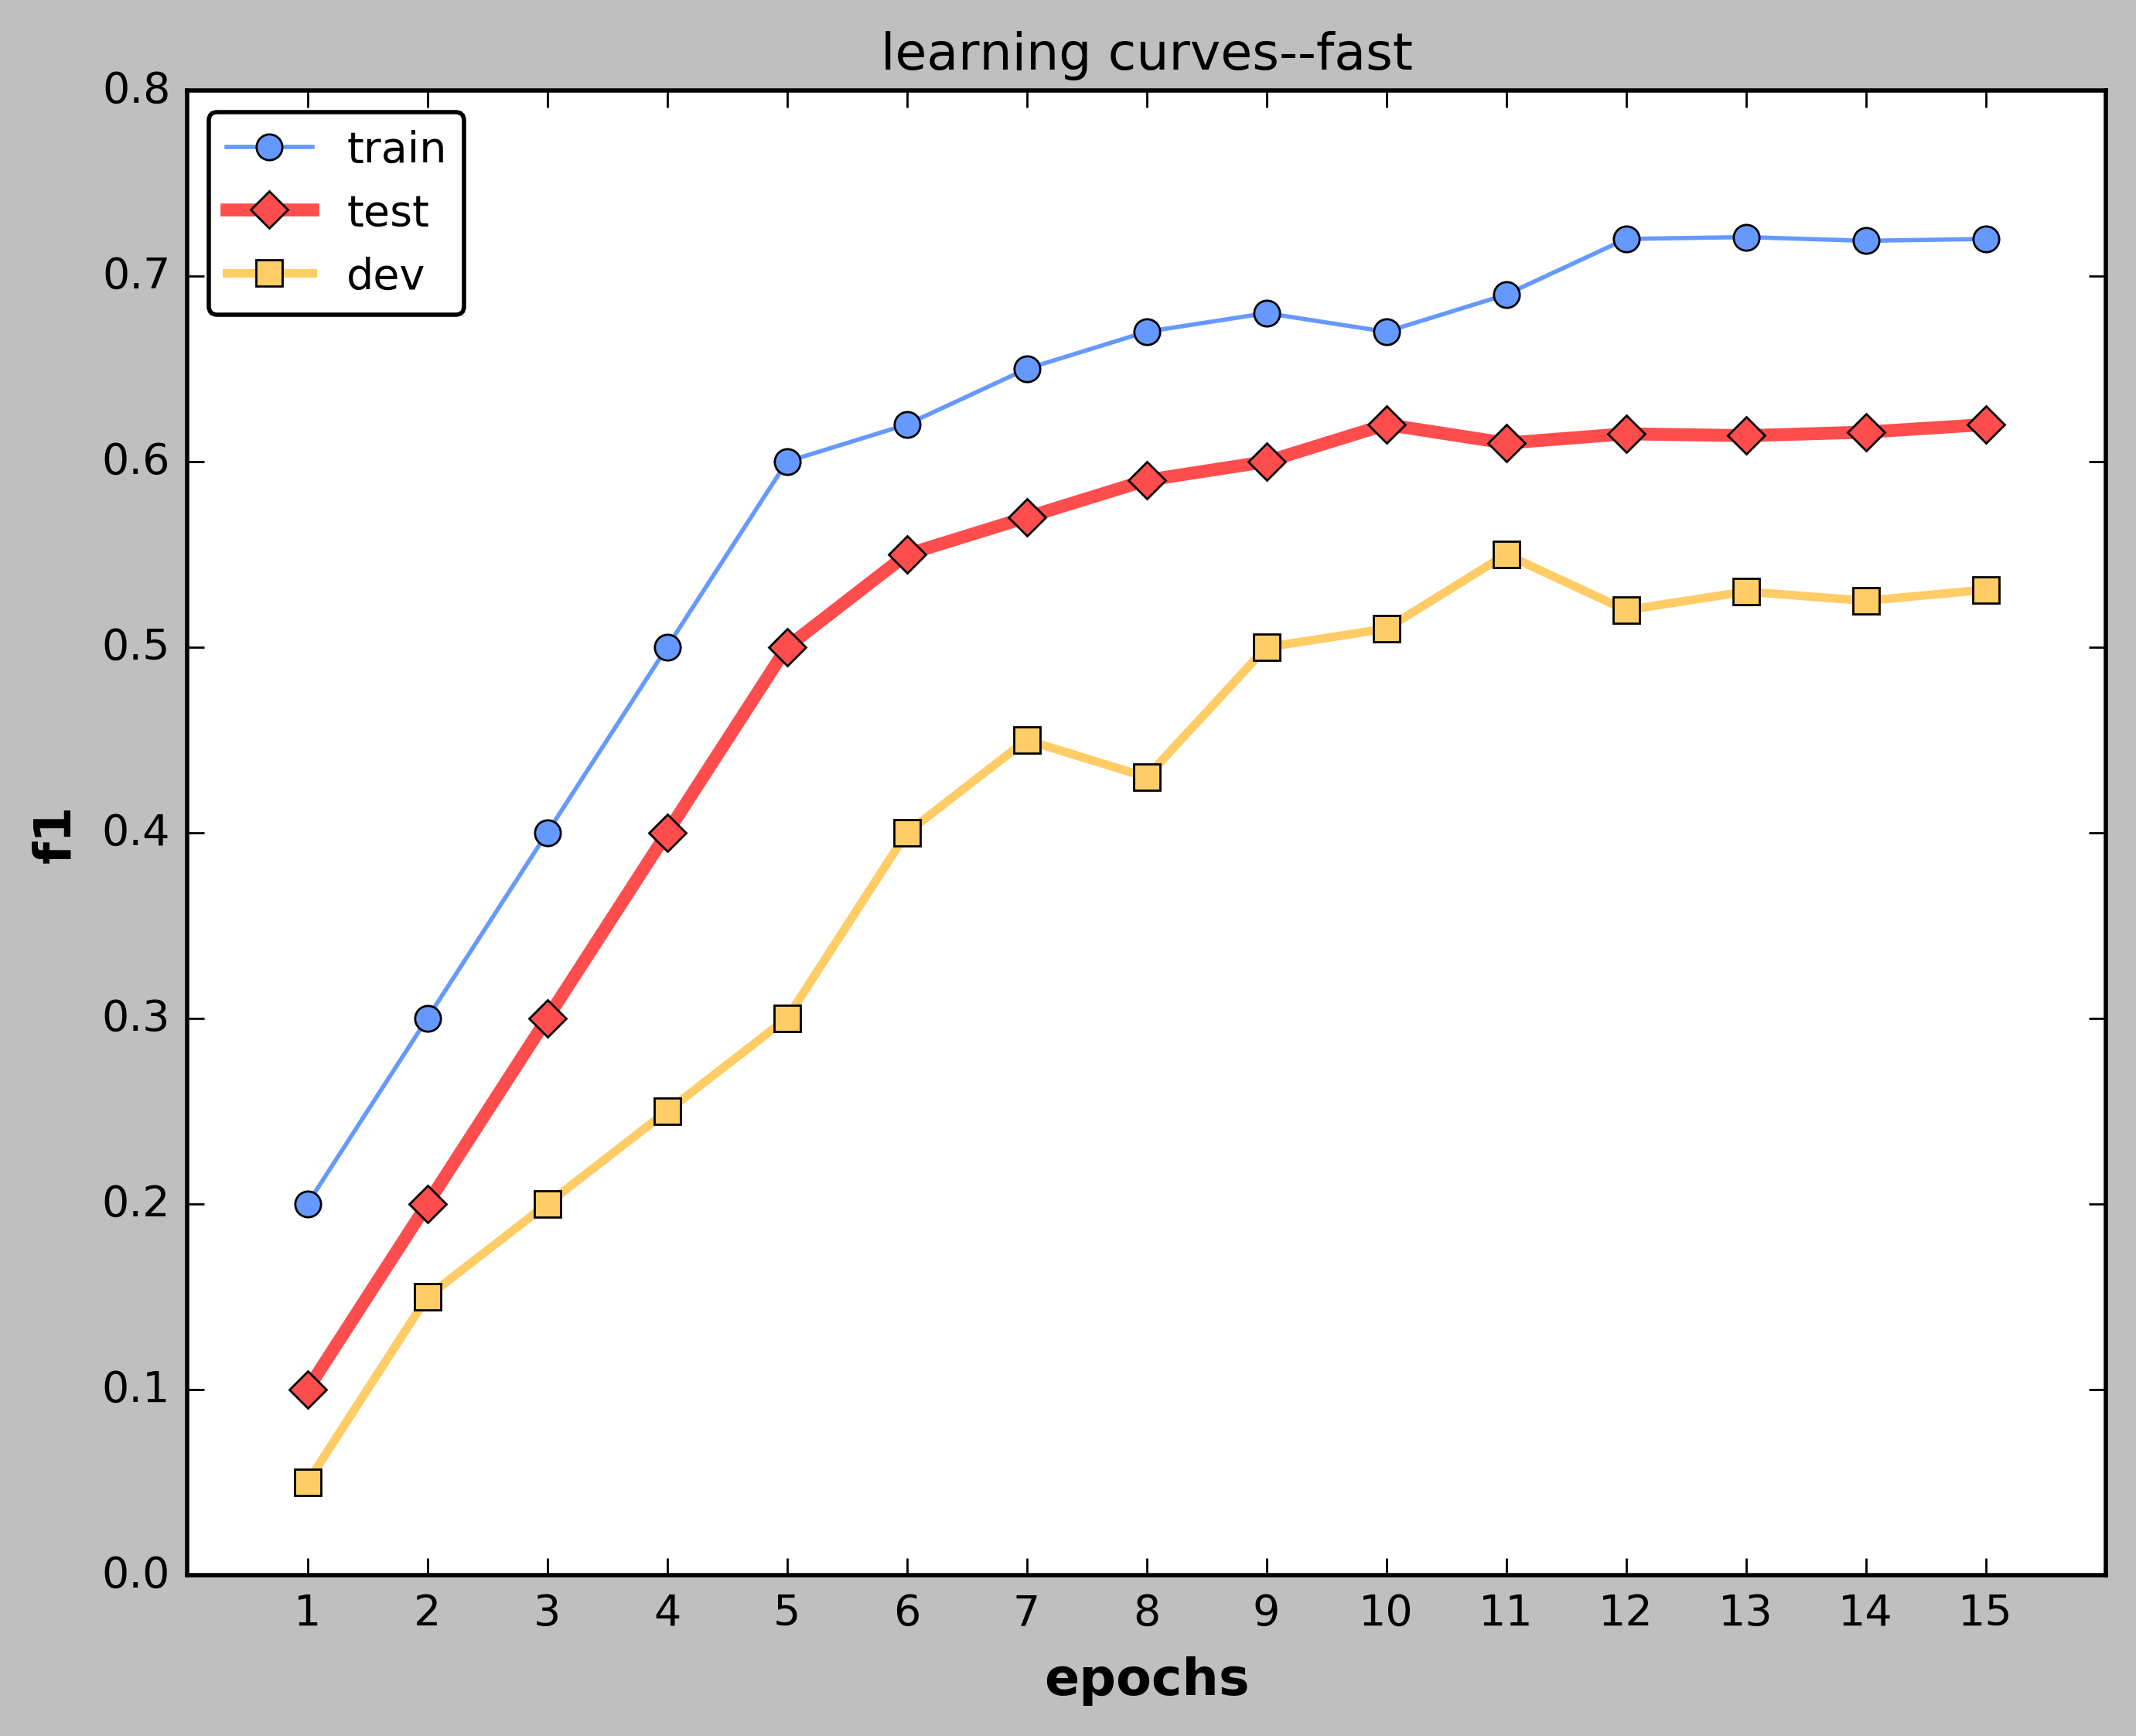

<Figure size 640x480 with 0 Axes>

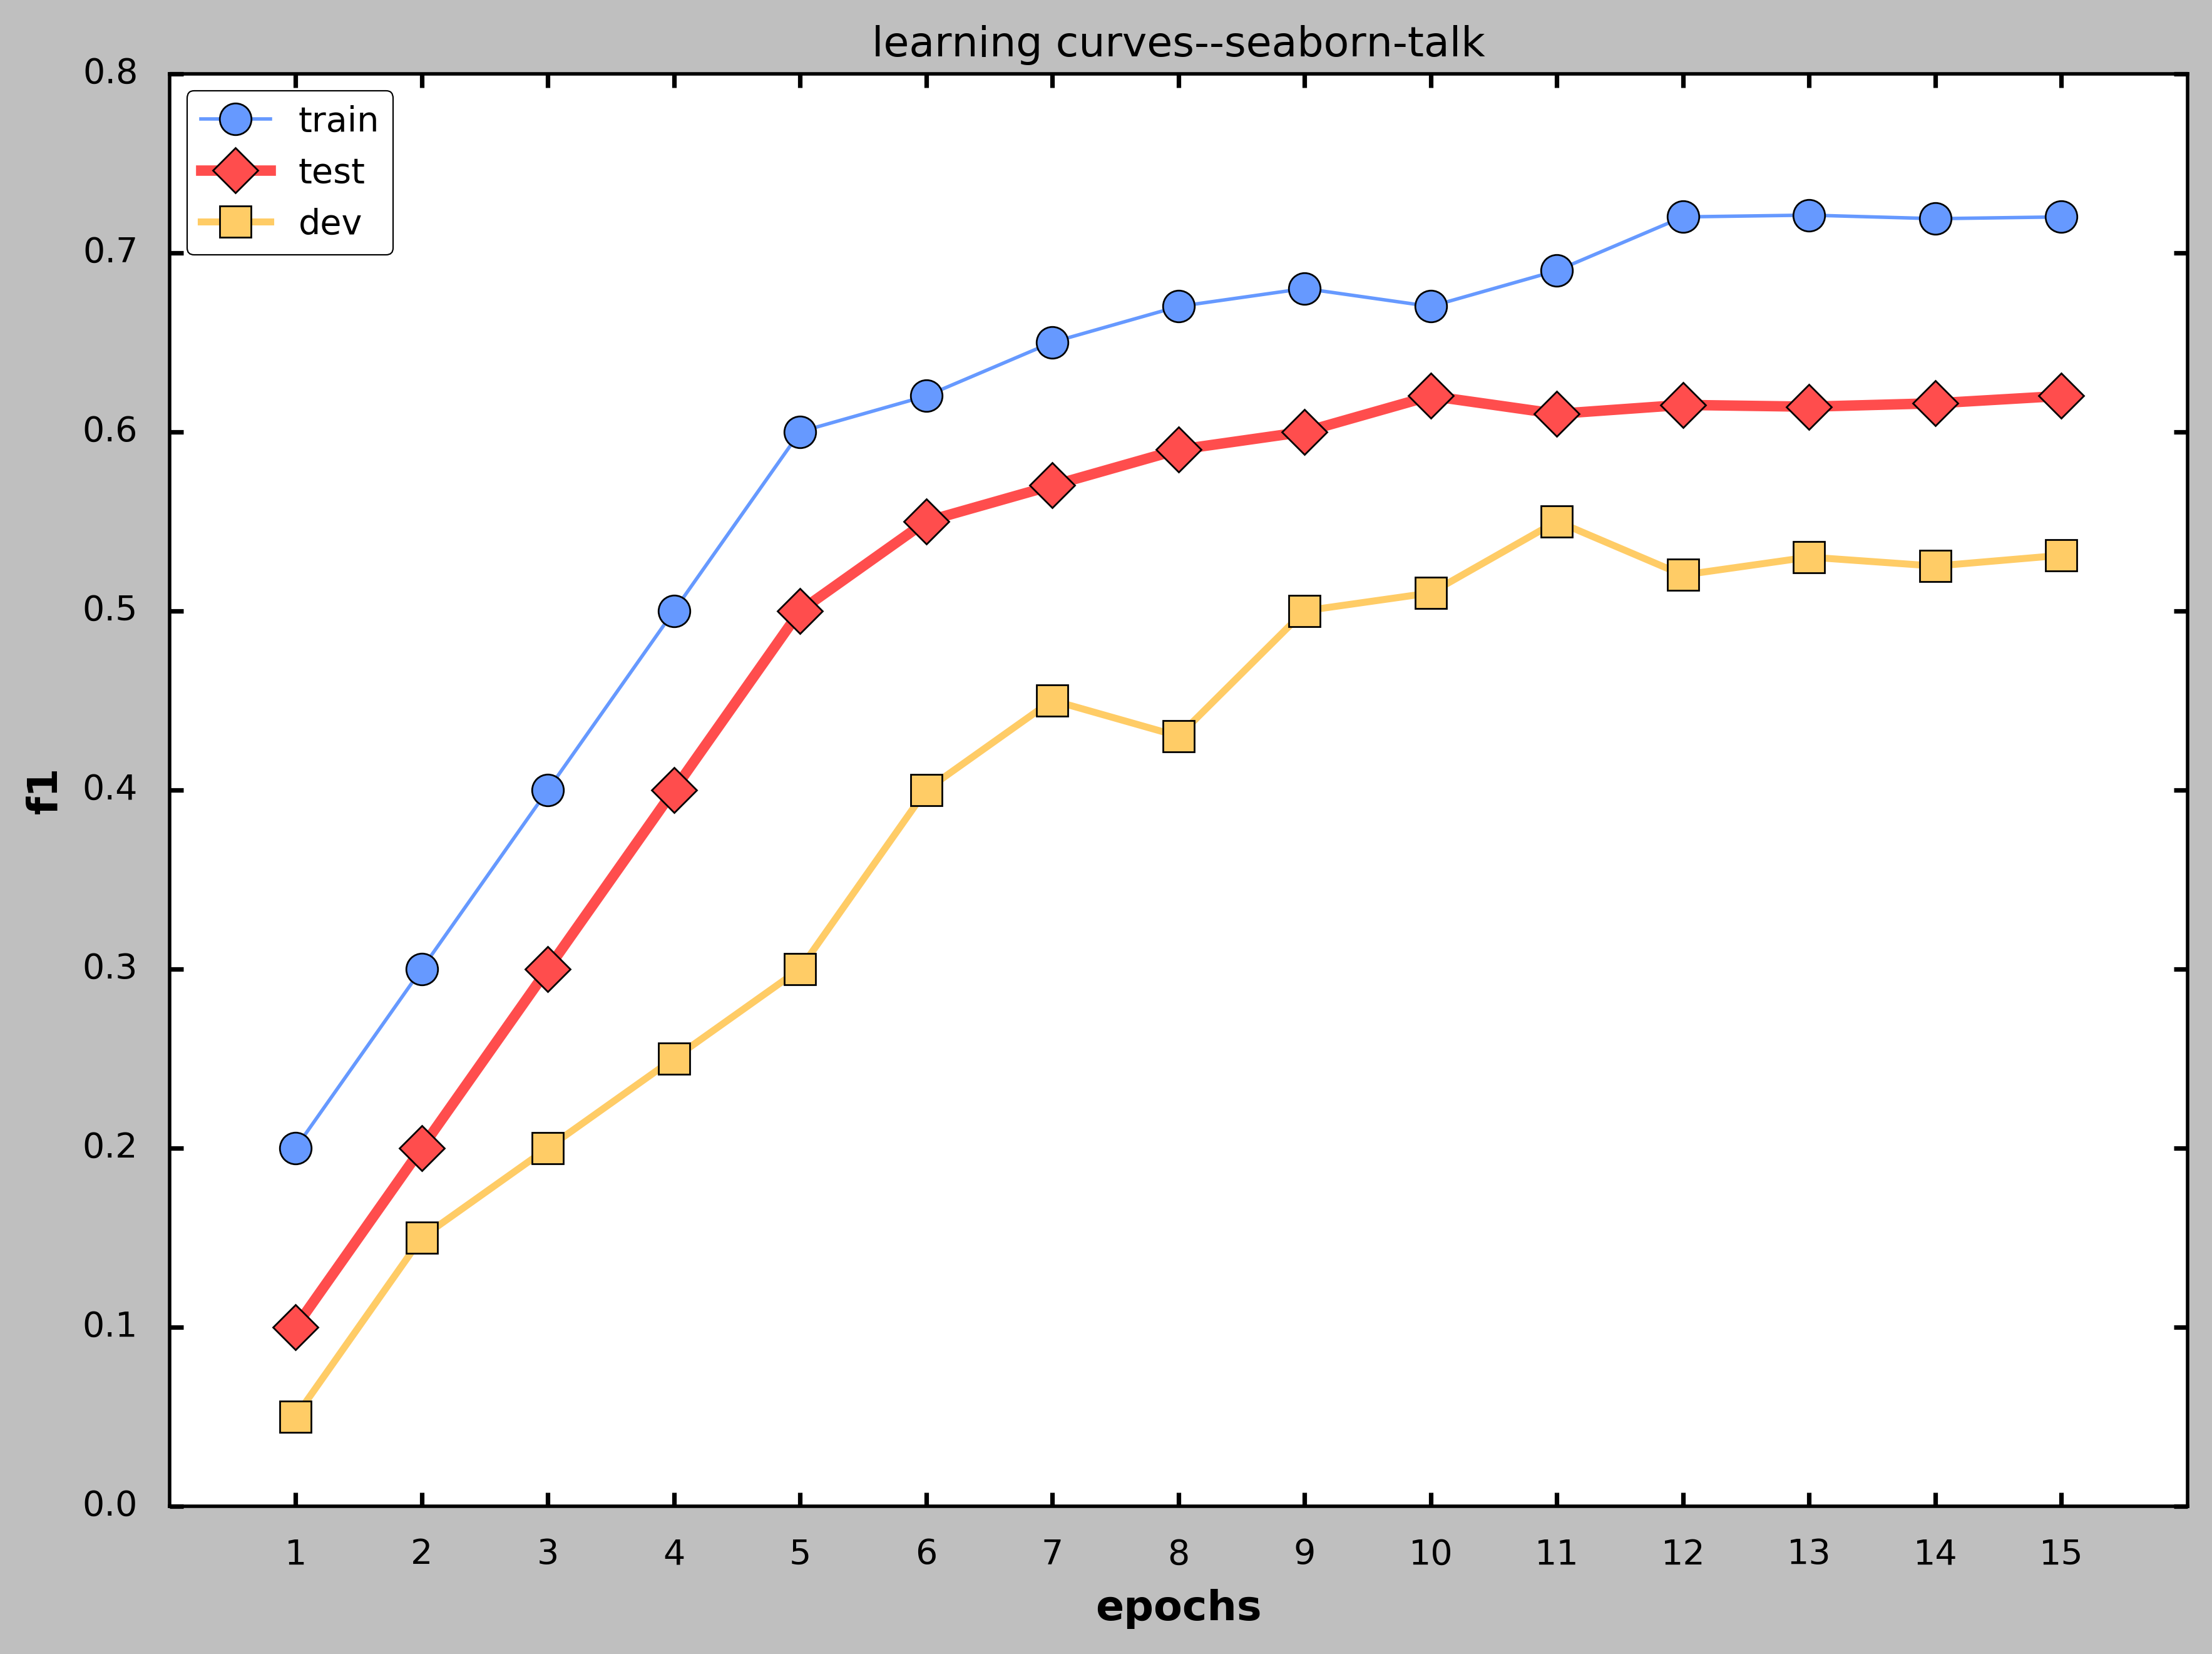

<Figure size 832x572 with 0 Axes>

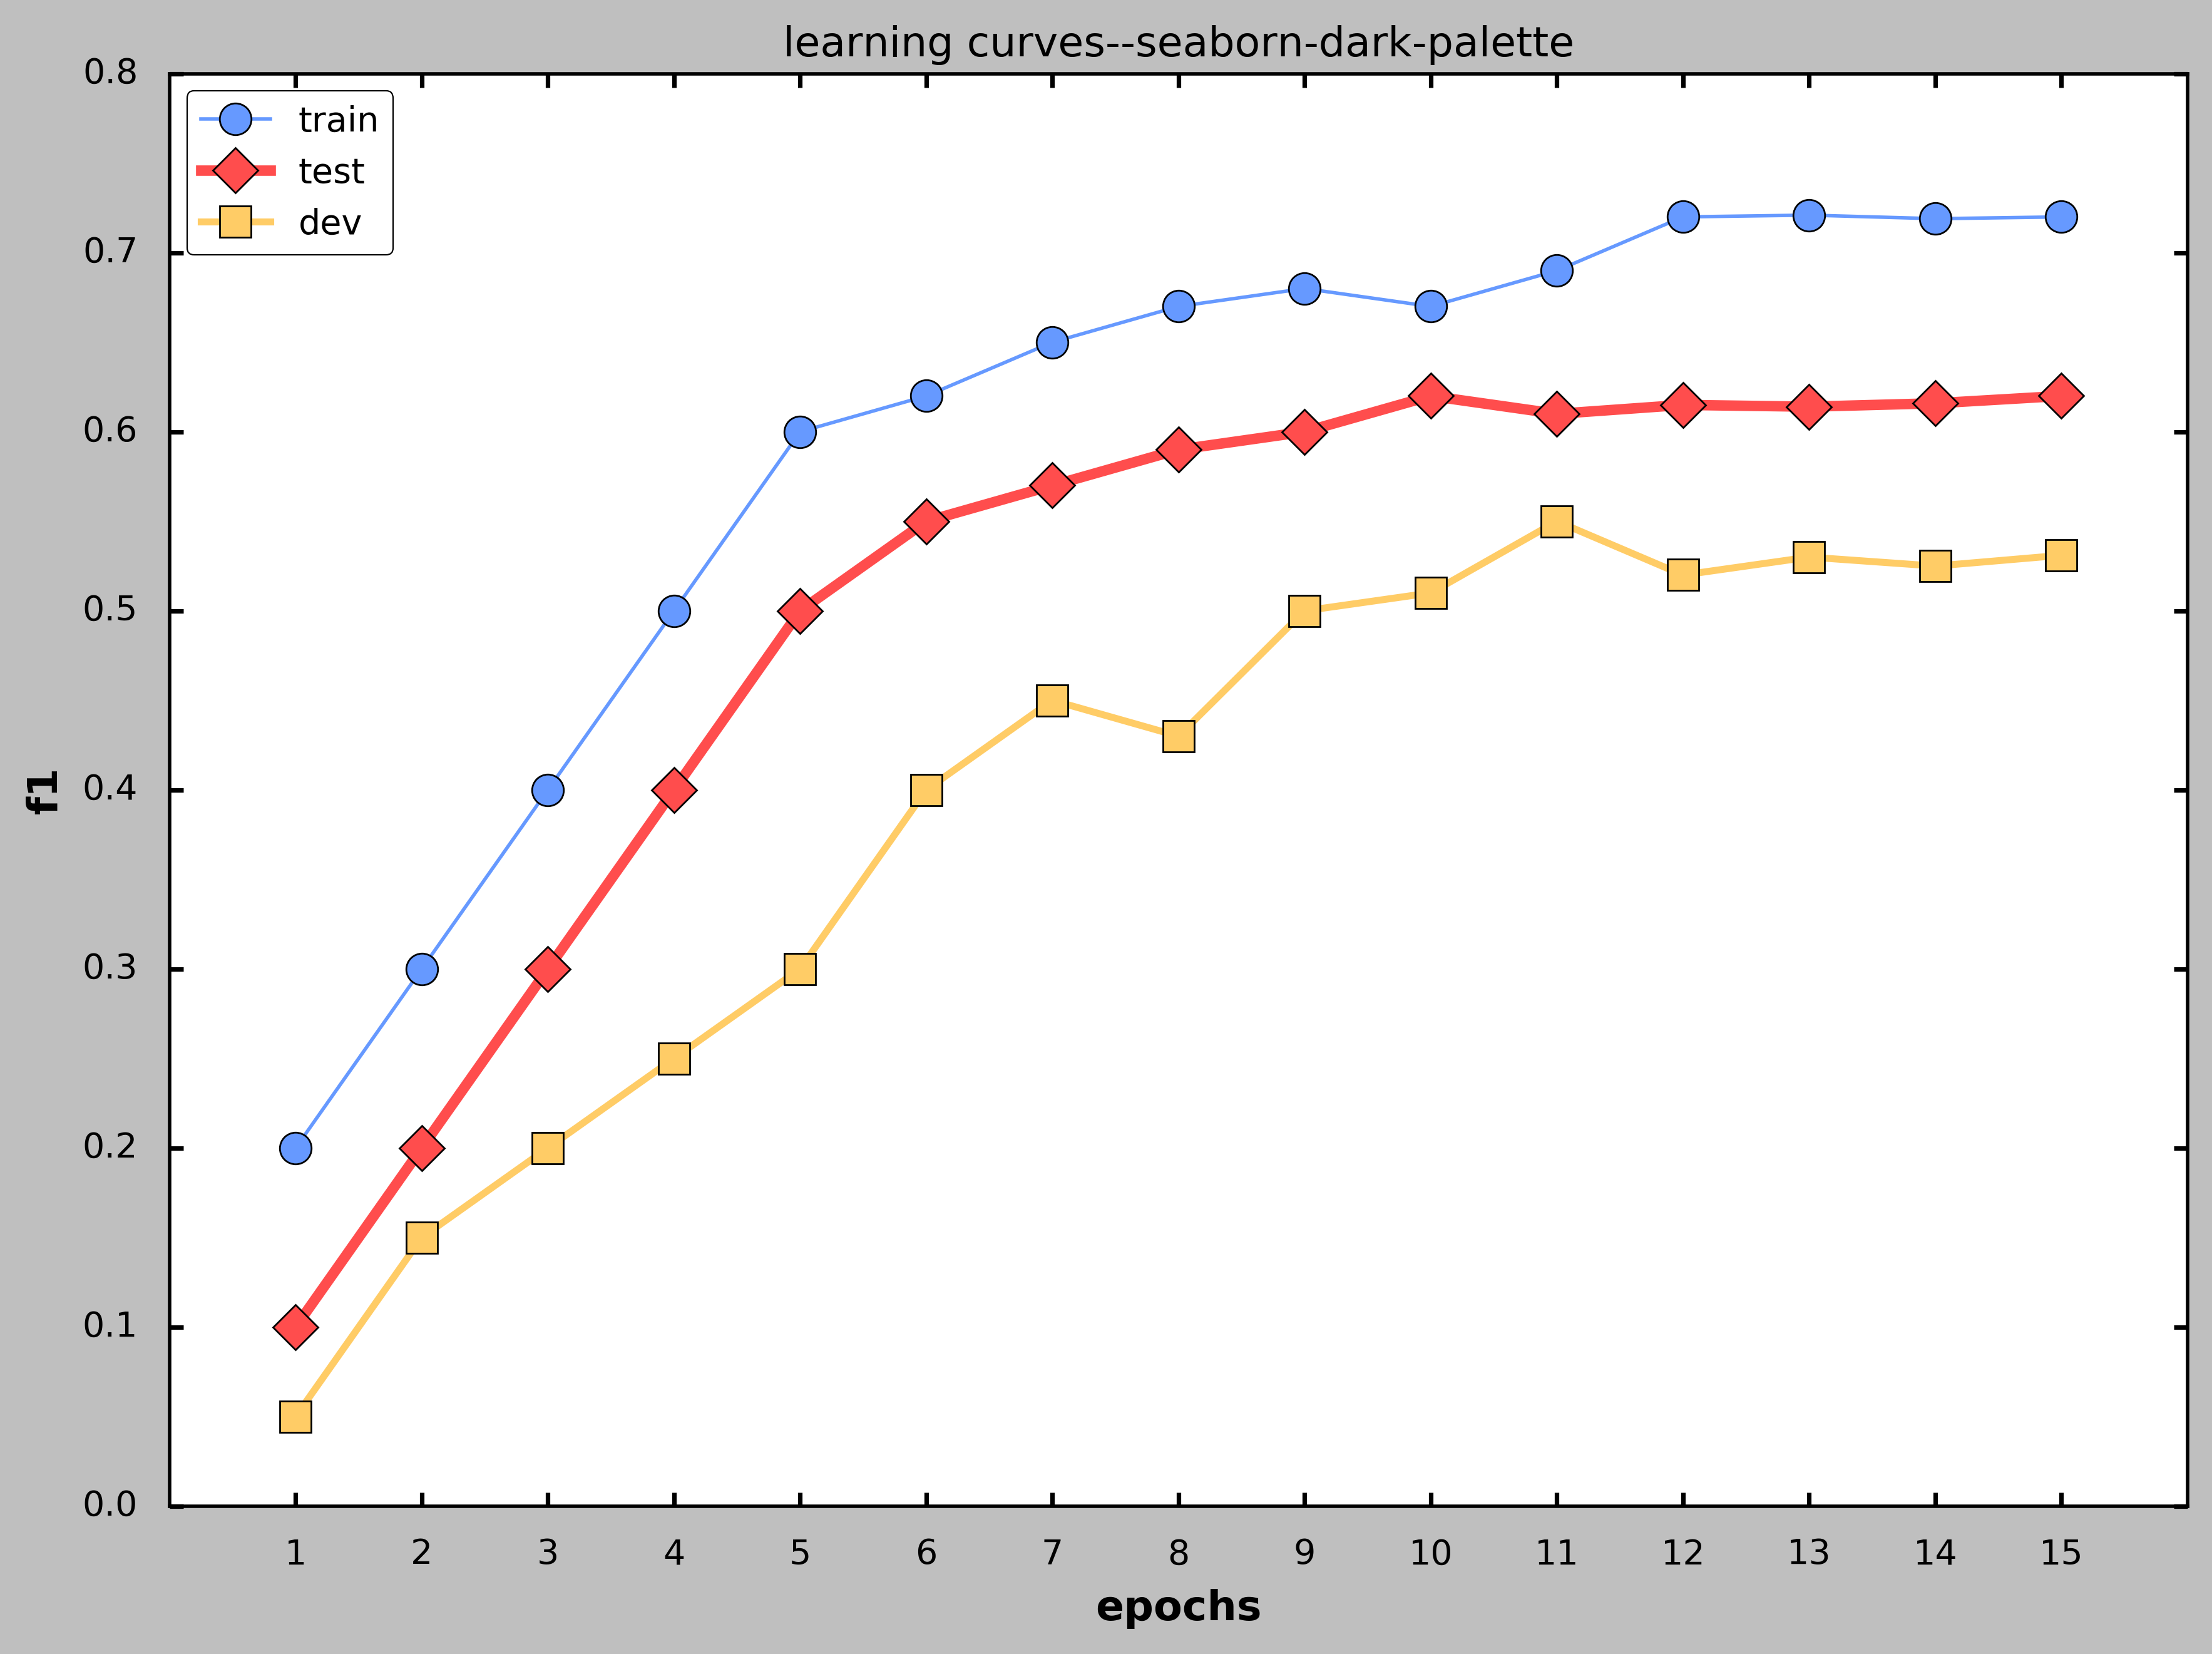

<Figure size 832x572 with 0 Axes>

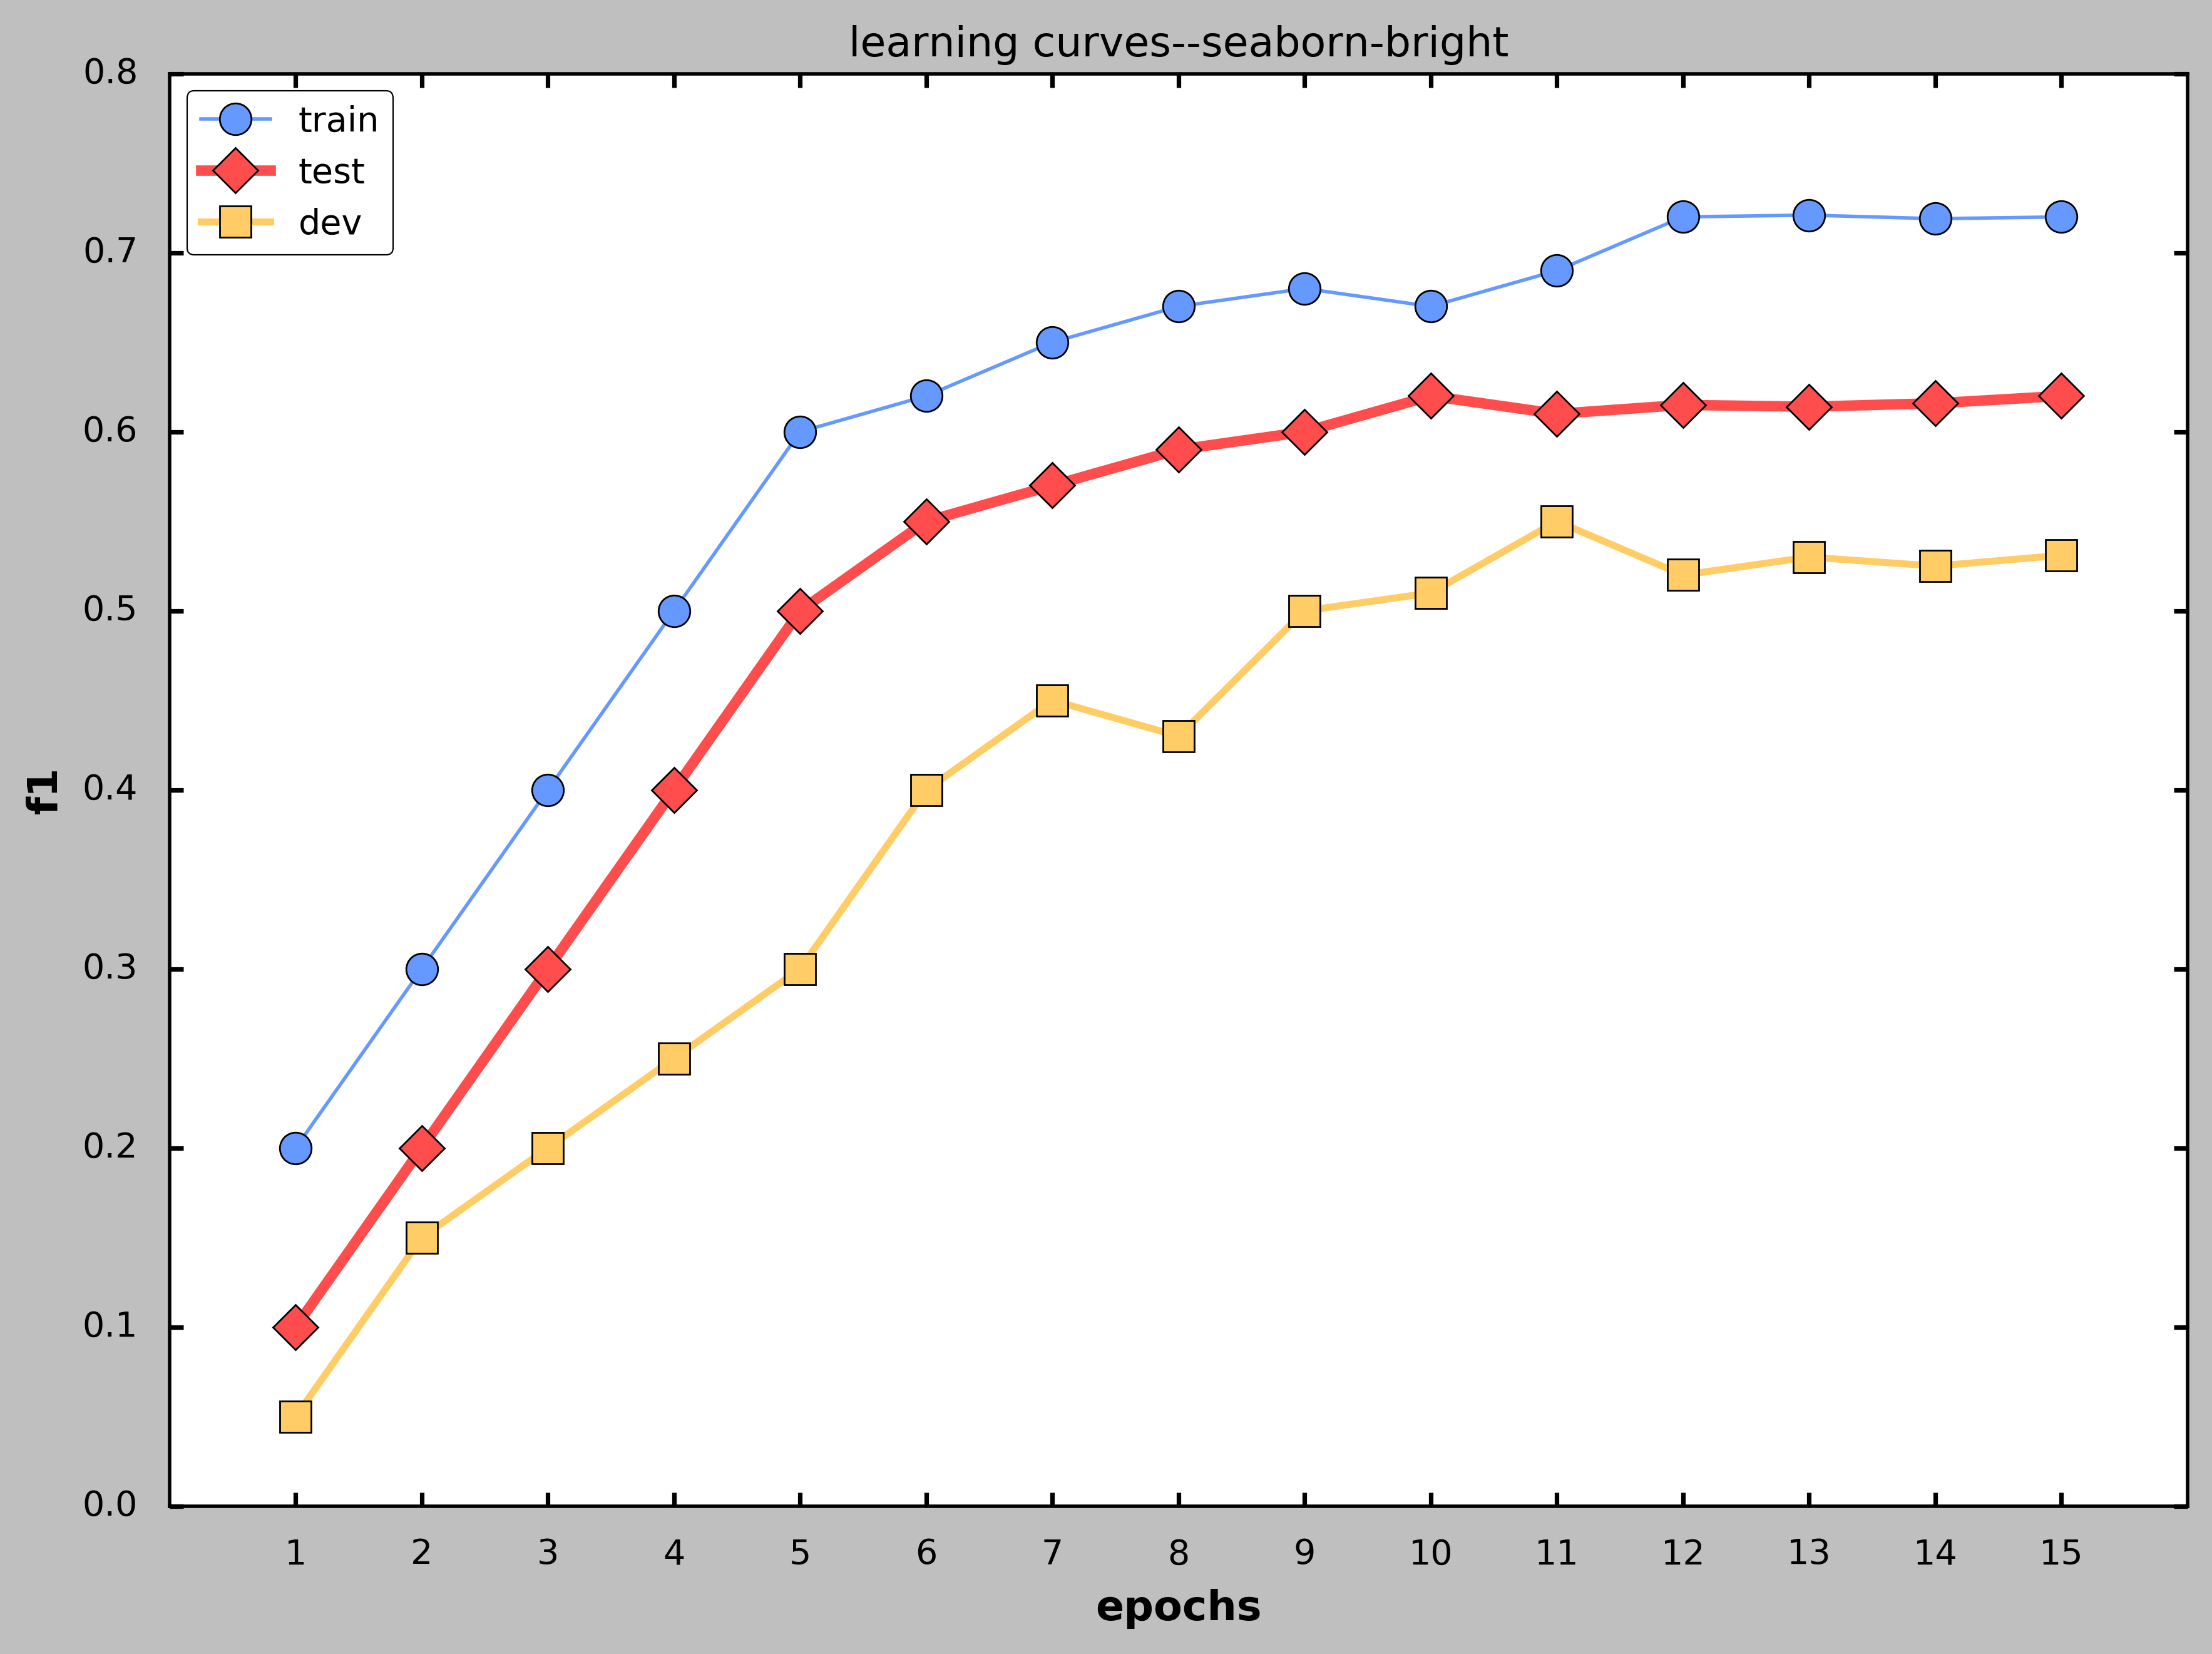

<Figure size 832x572 with 0 Axes>

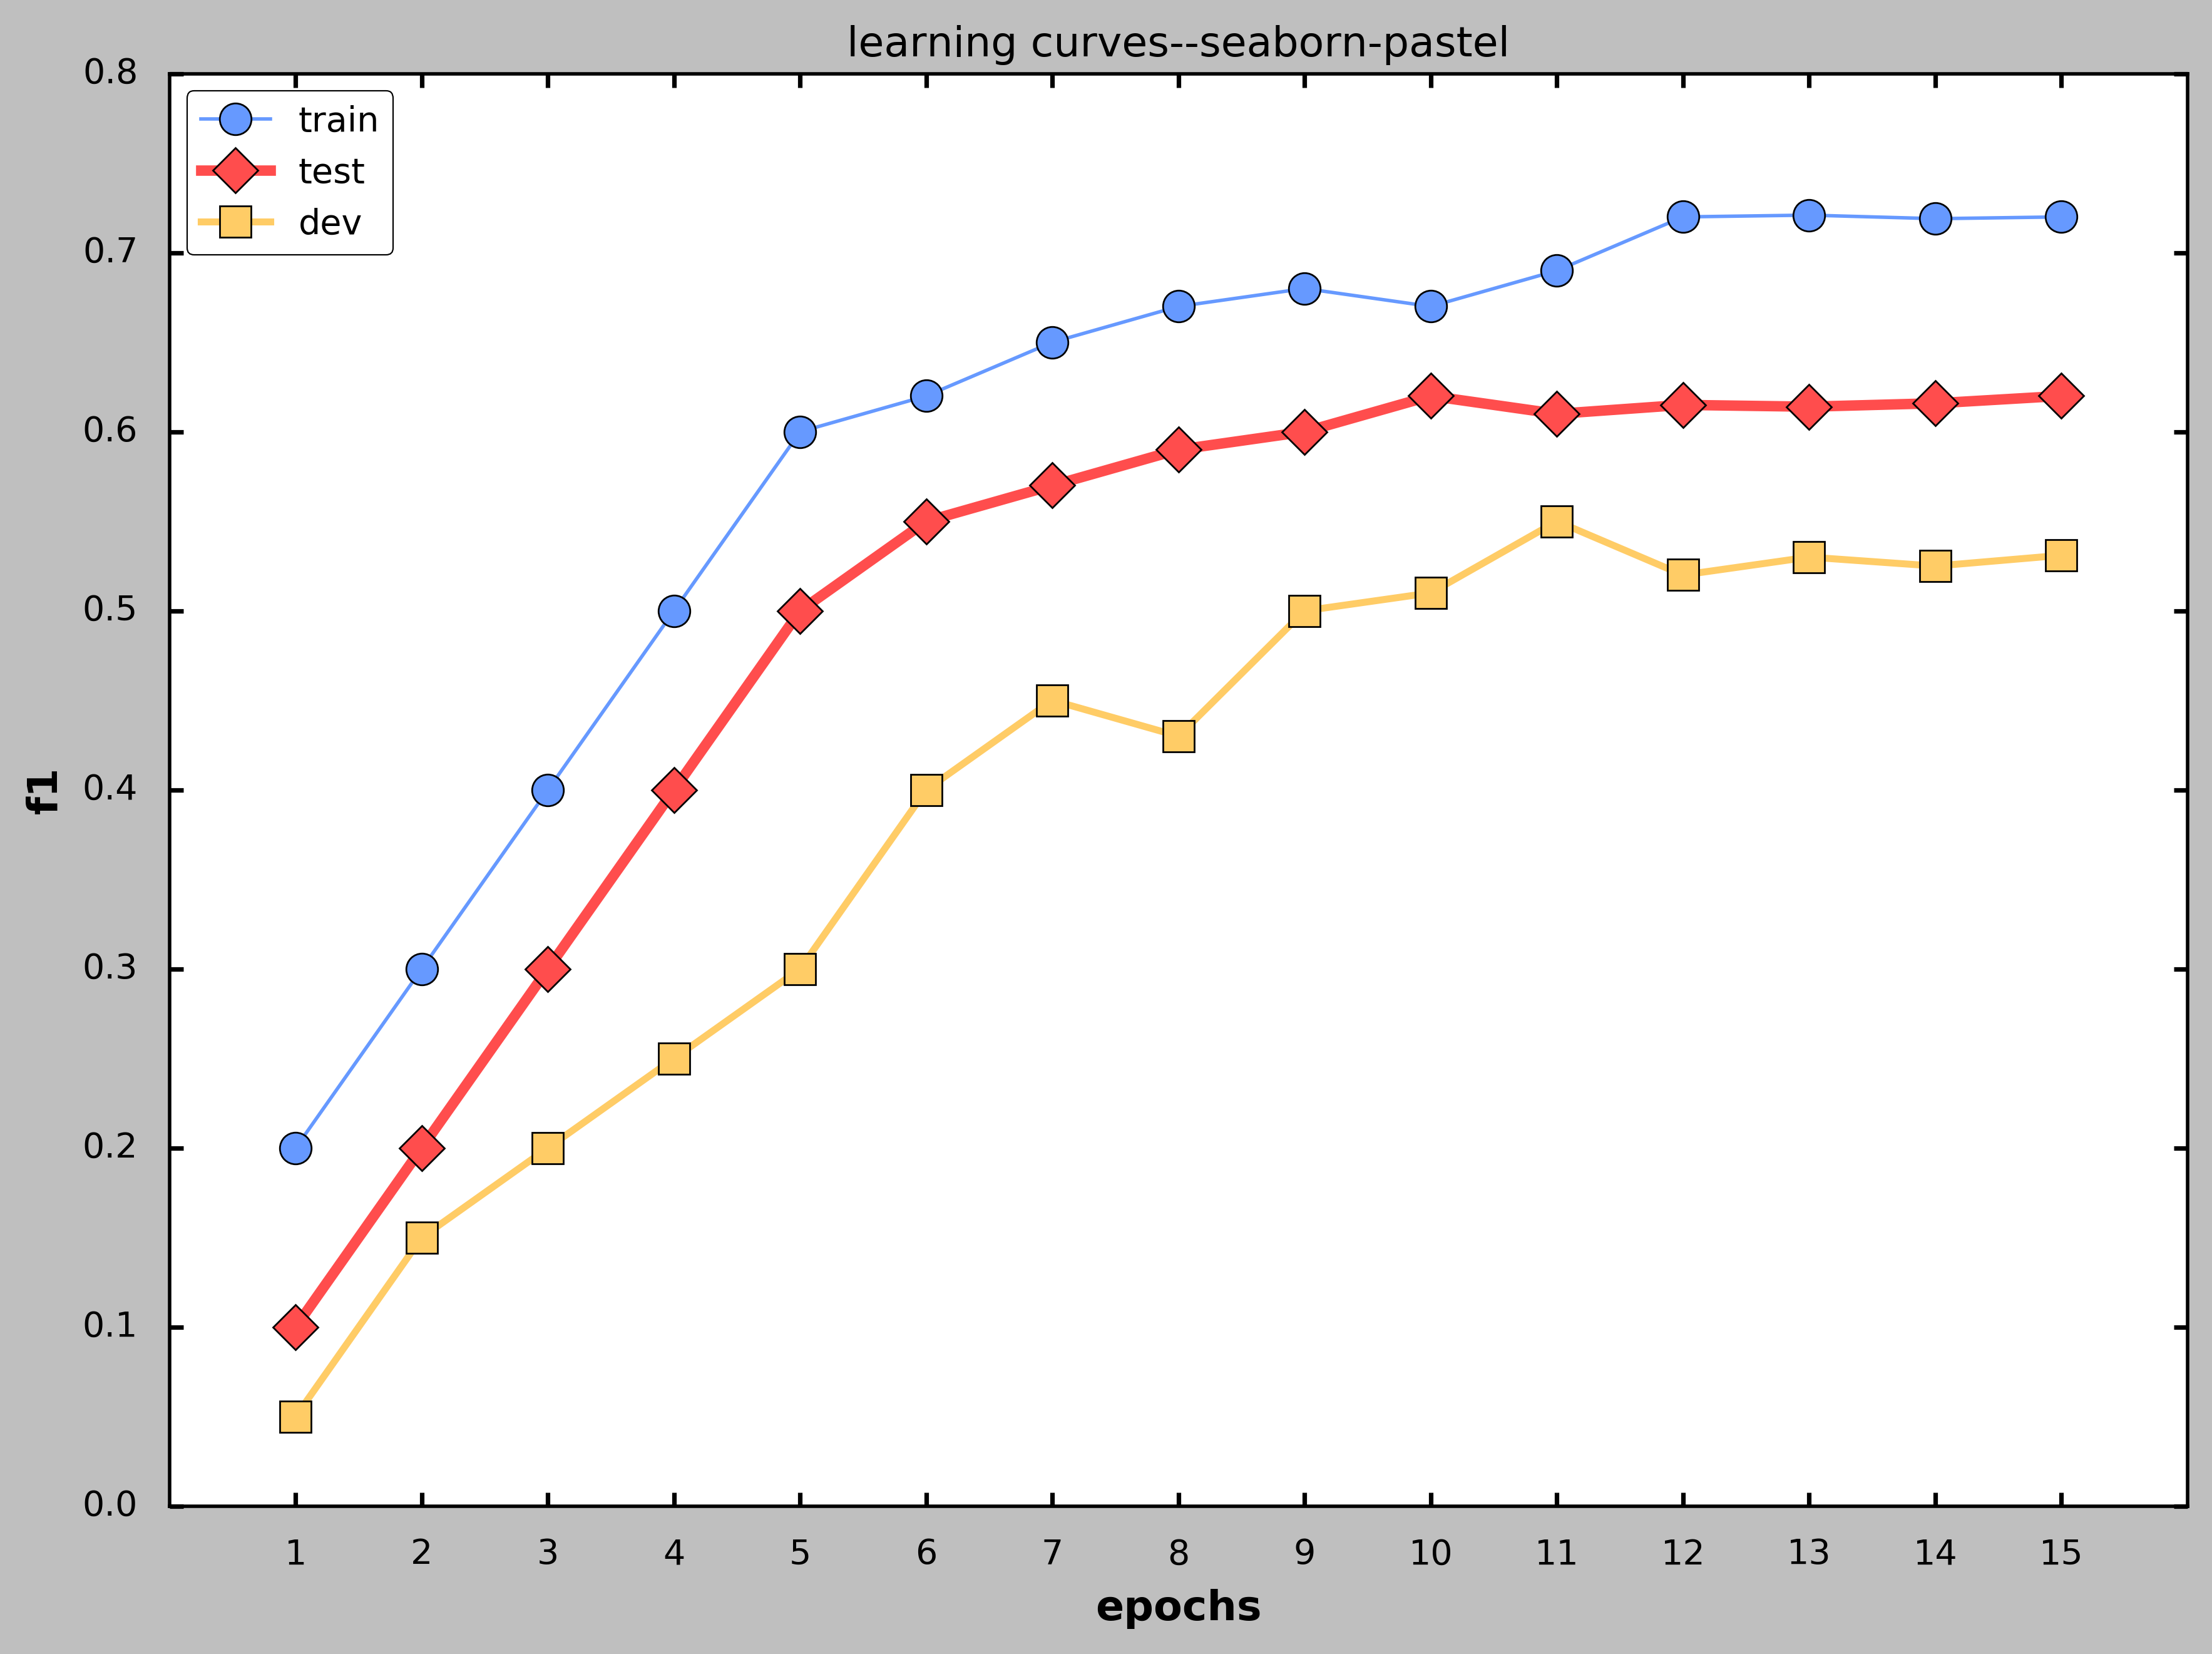

<Figure size 832x572 with 0 Axes>

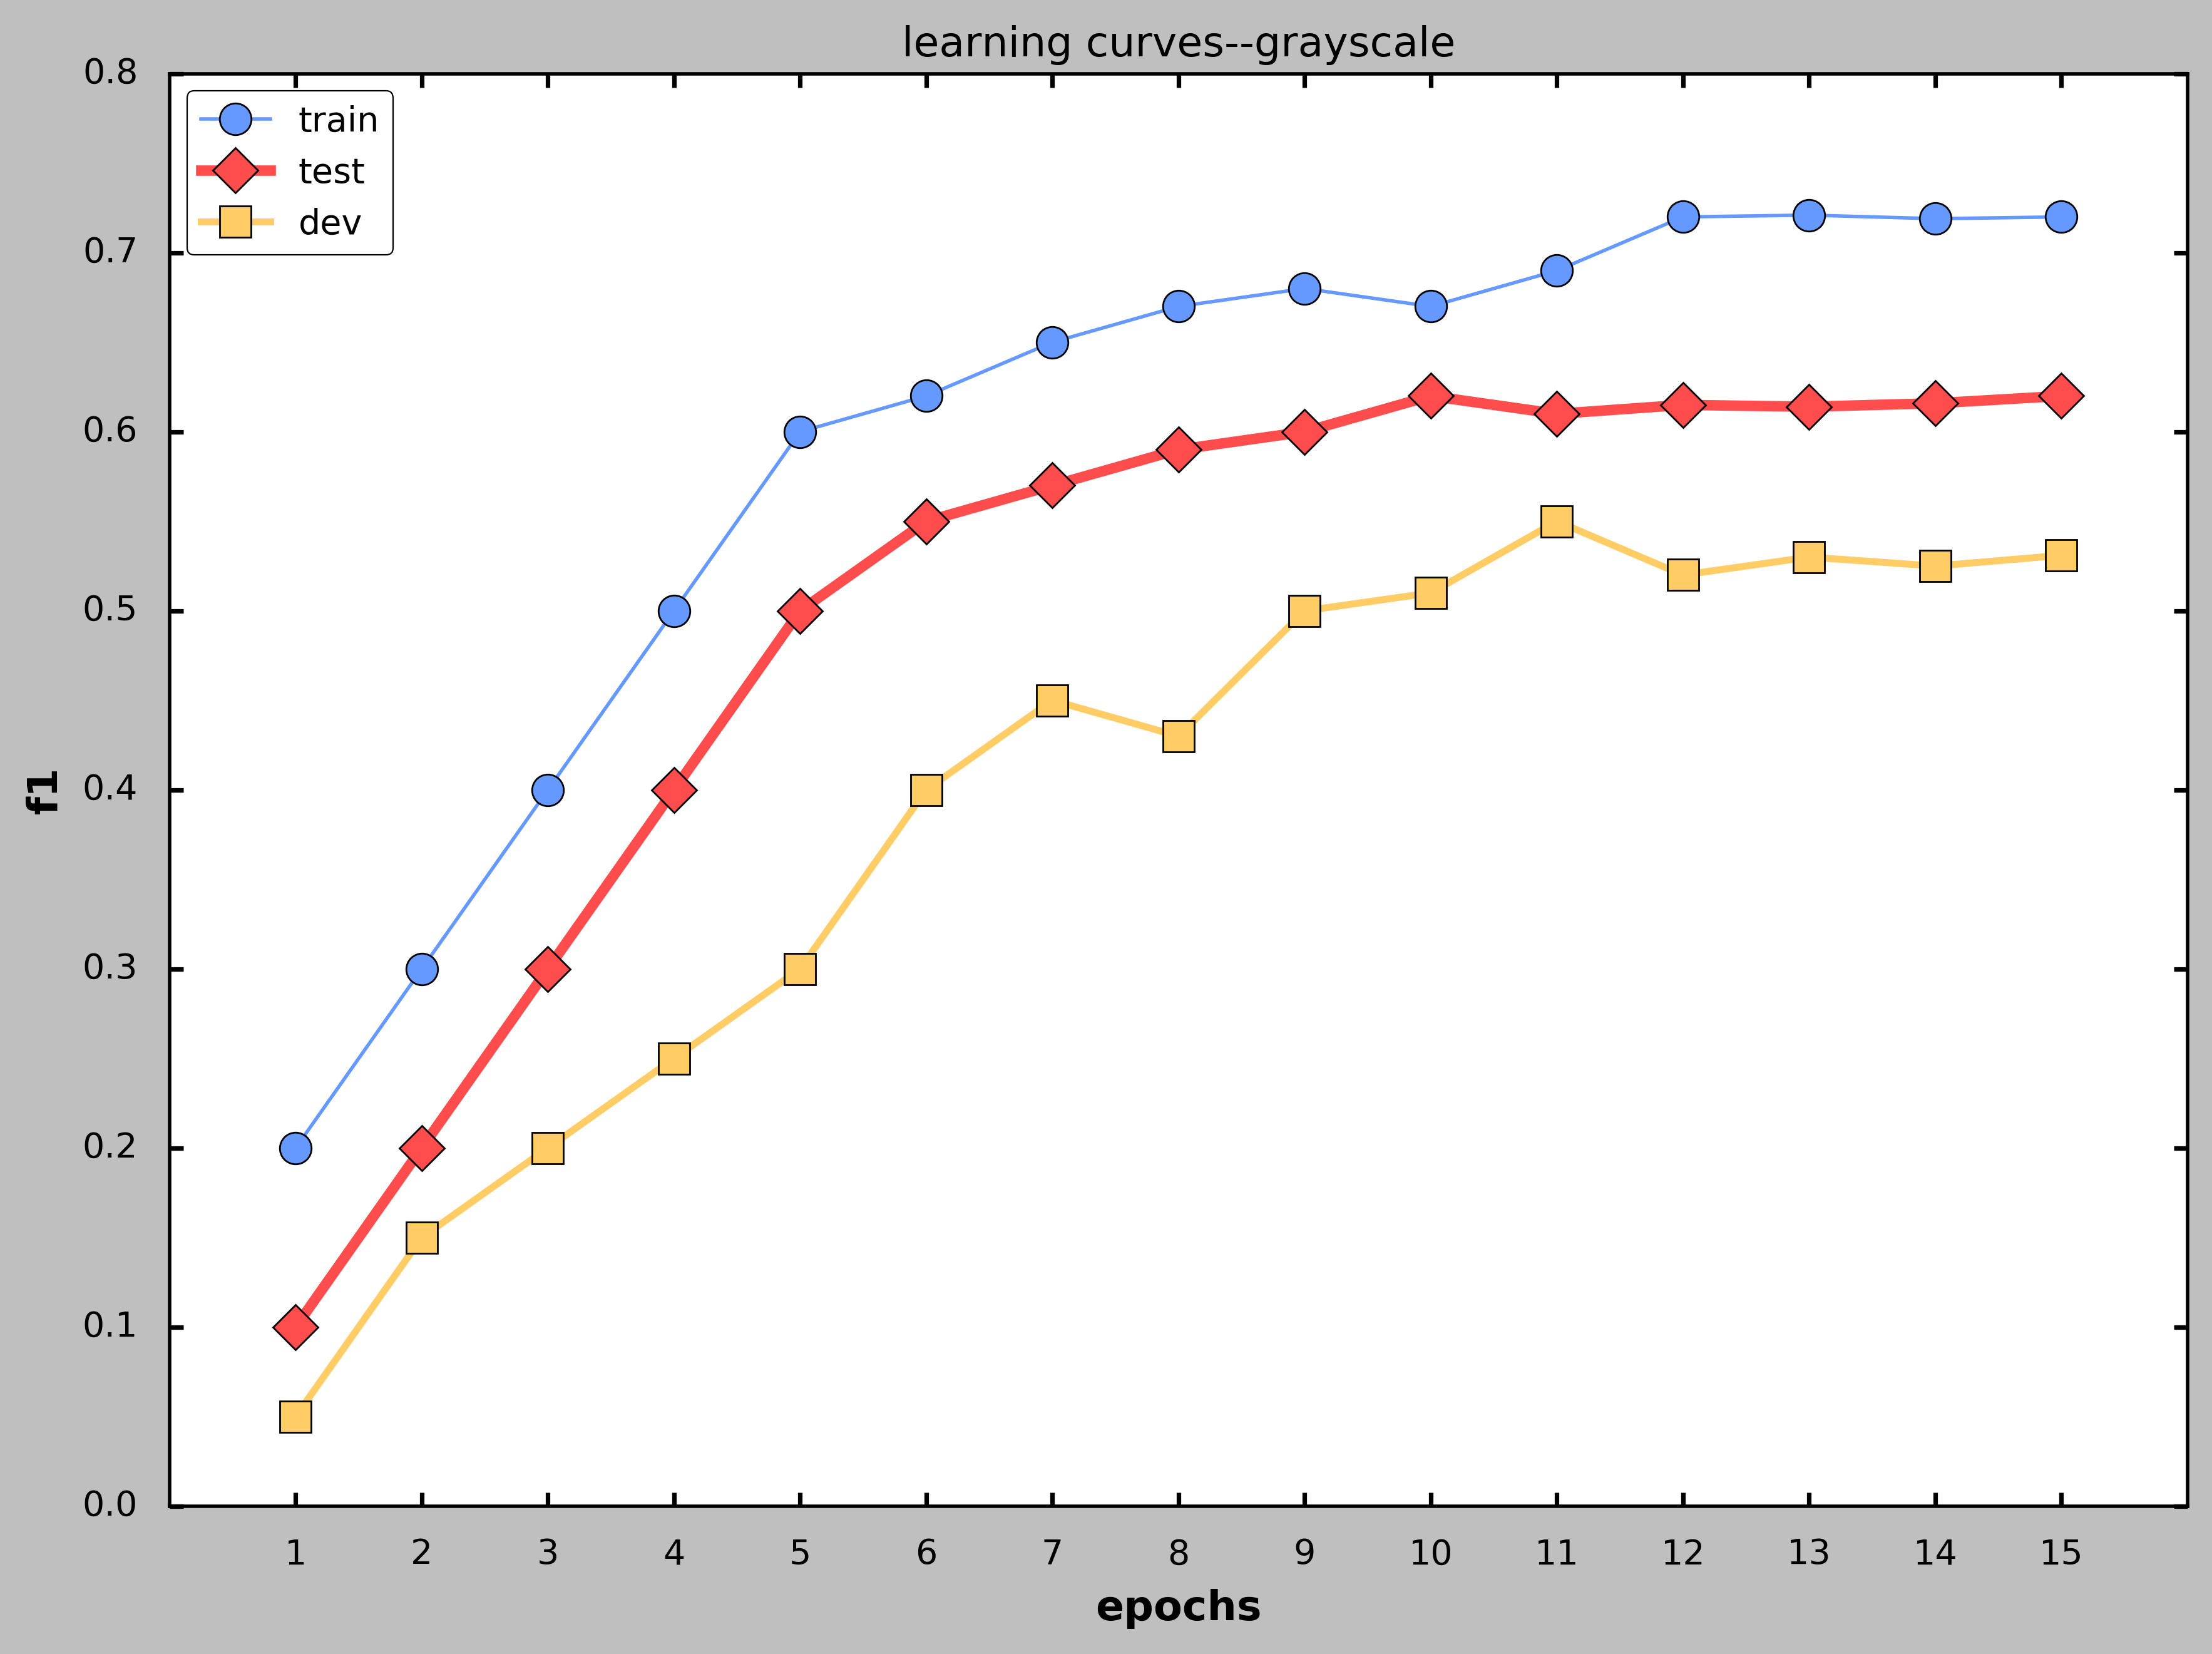

<Figure size 832x572 with 0 Axes>

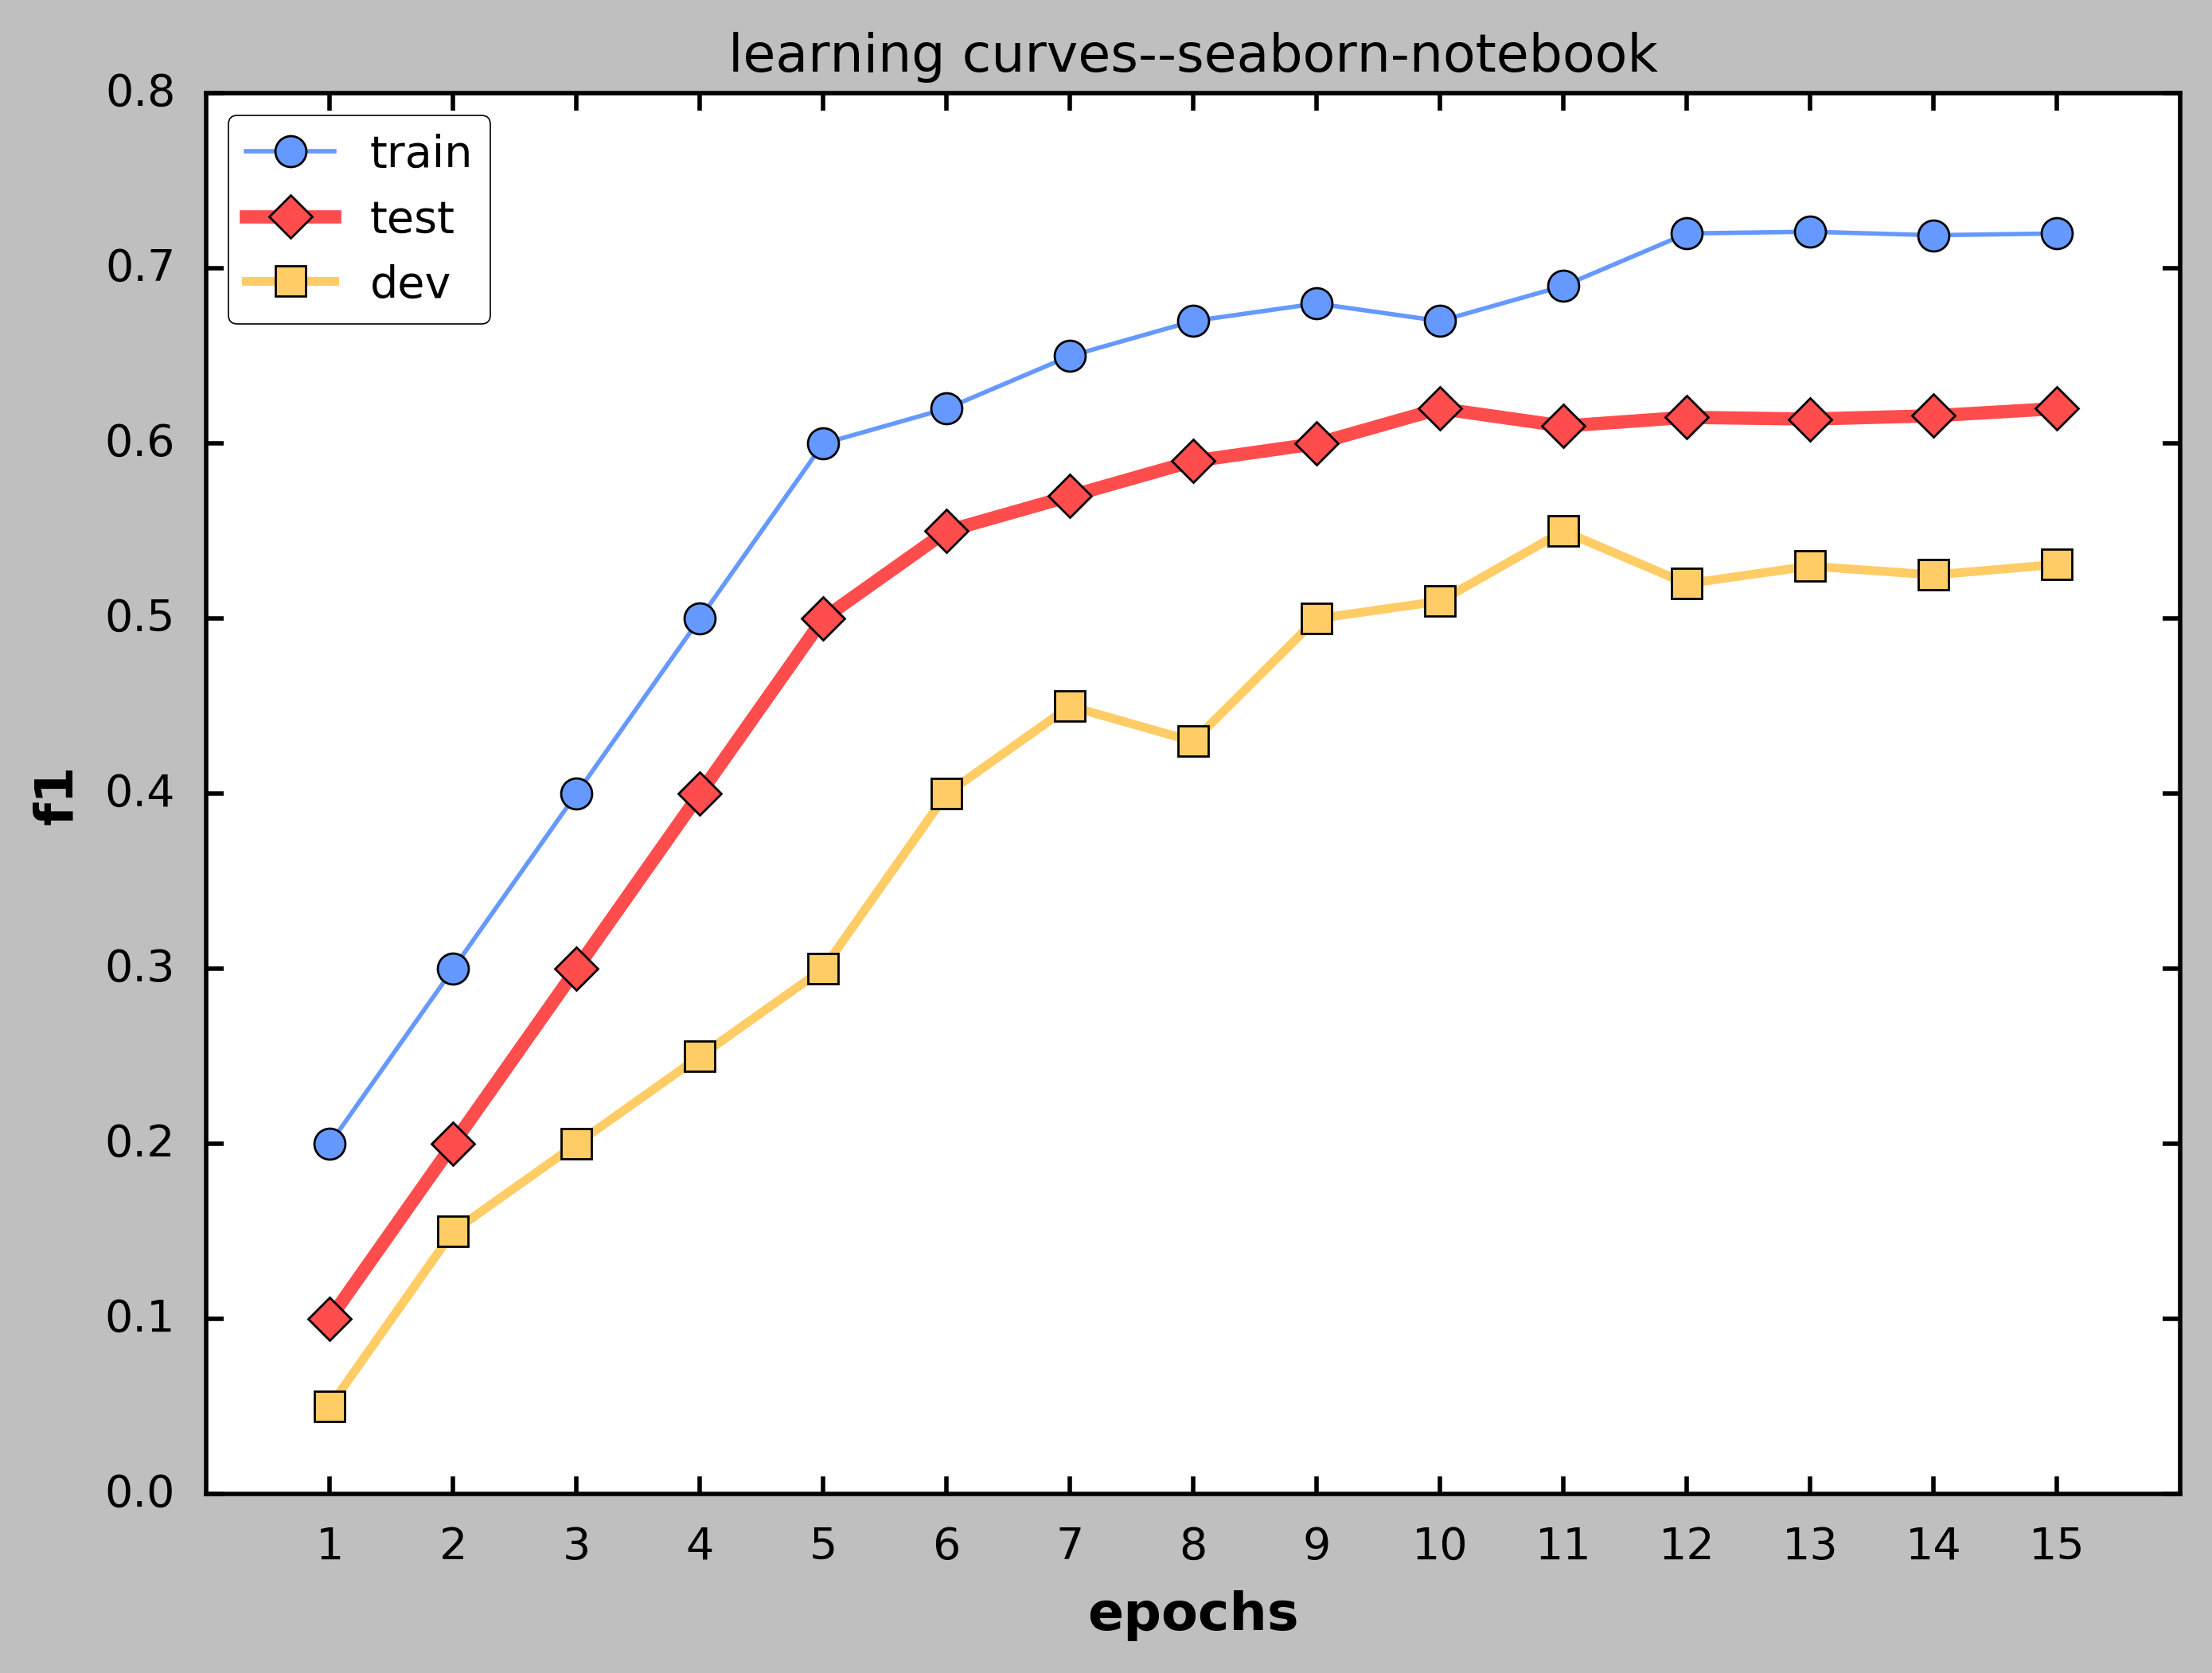

<Figure size 640x440 with 0 Axes>

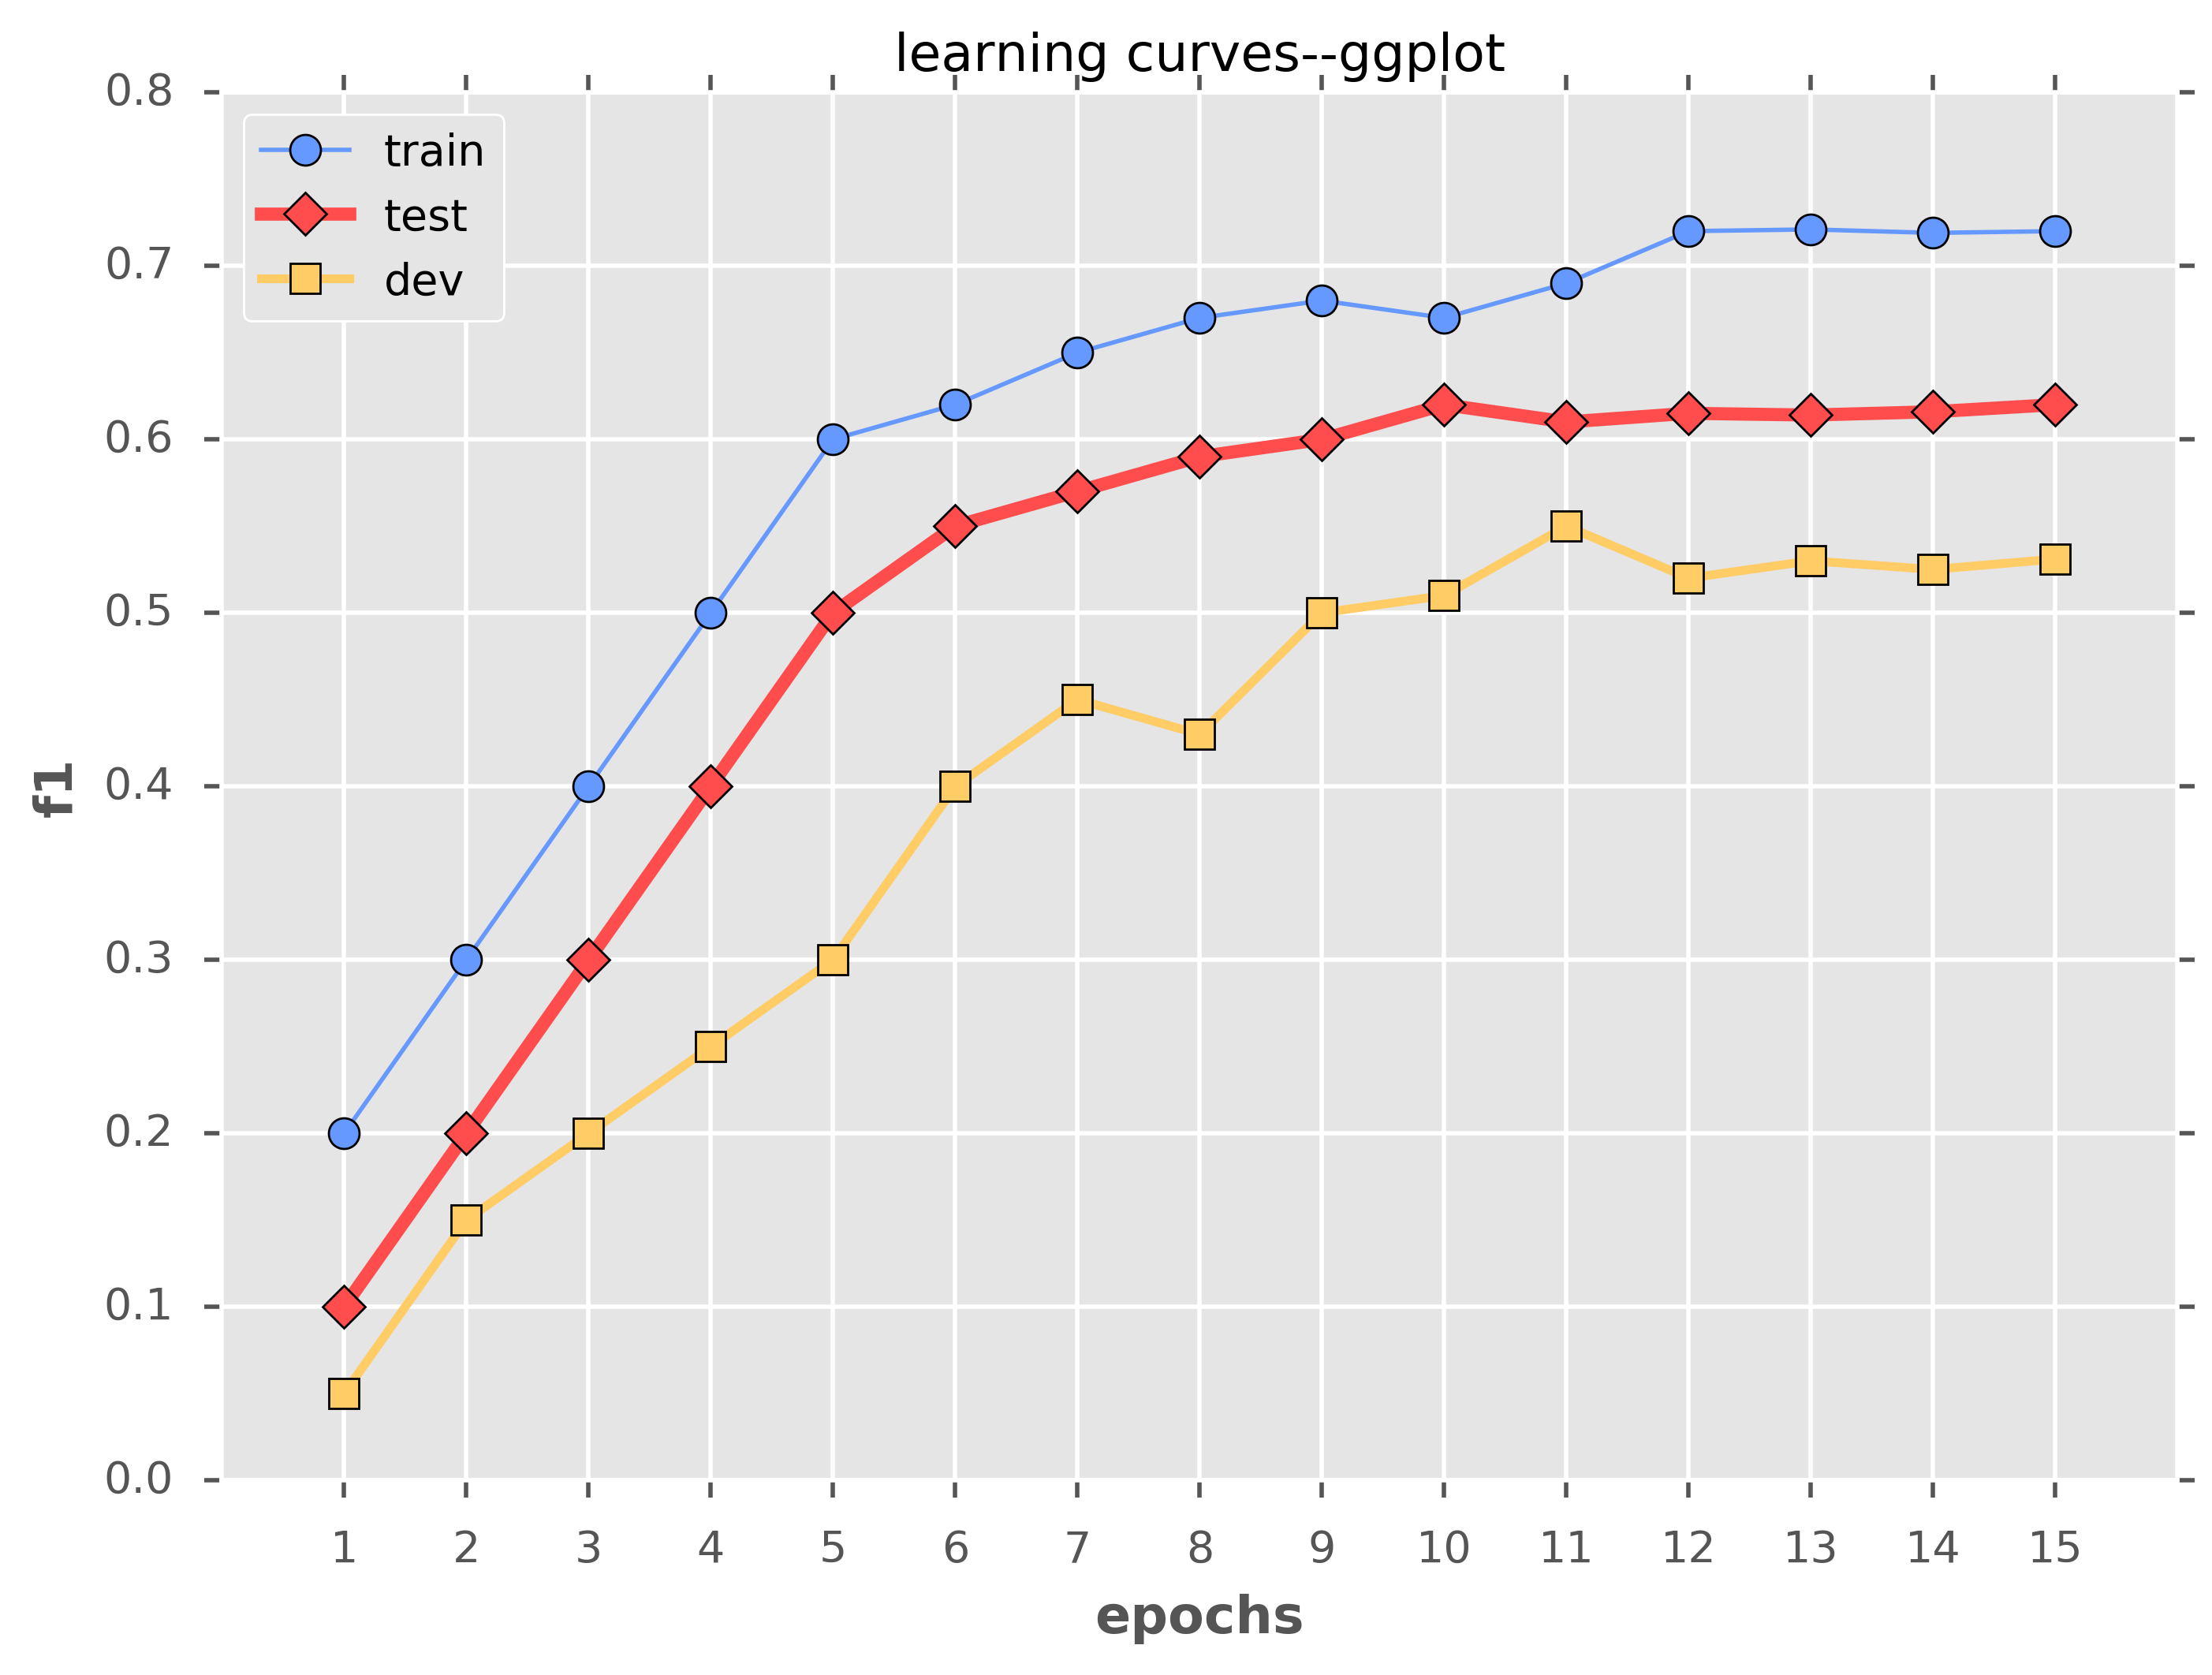

<Figure size 640x440 with 0 Axes>

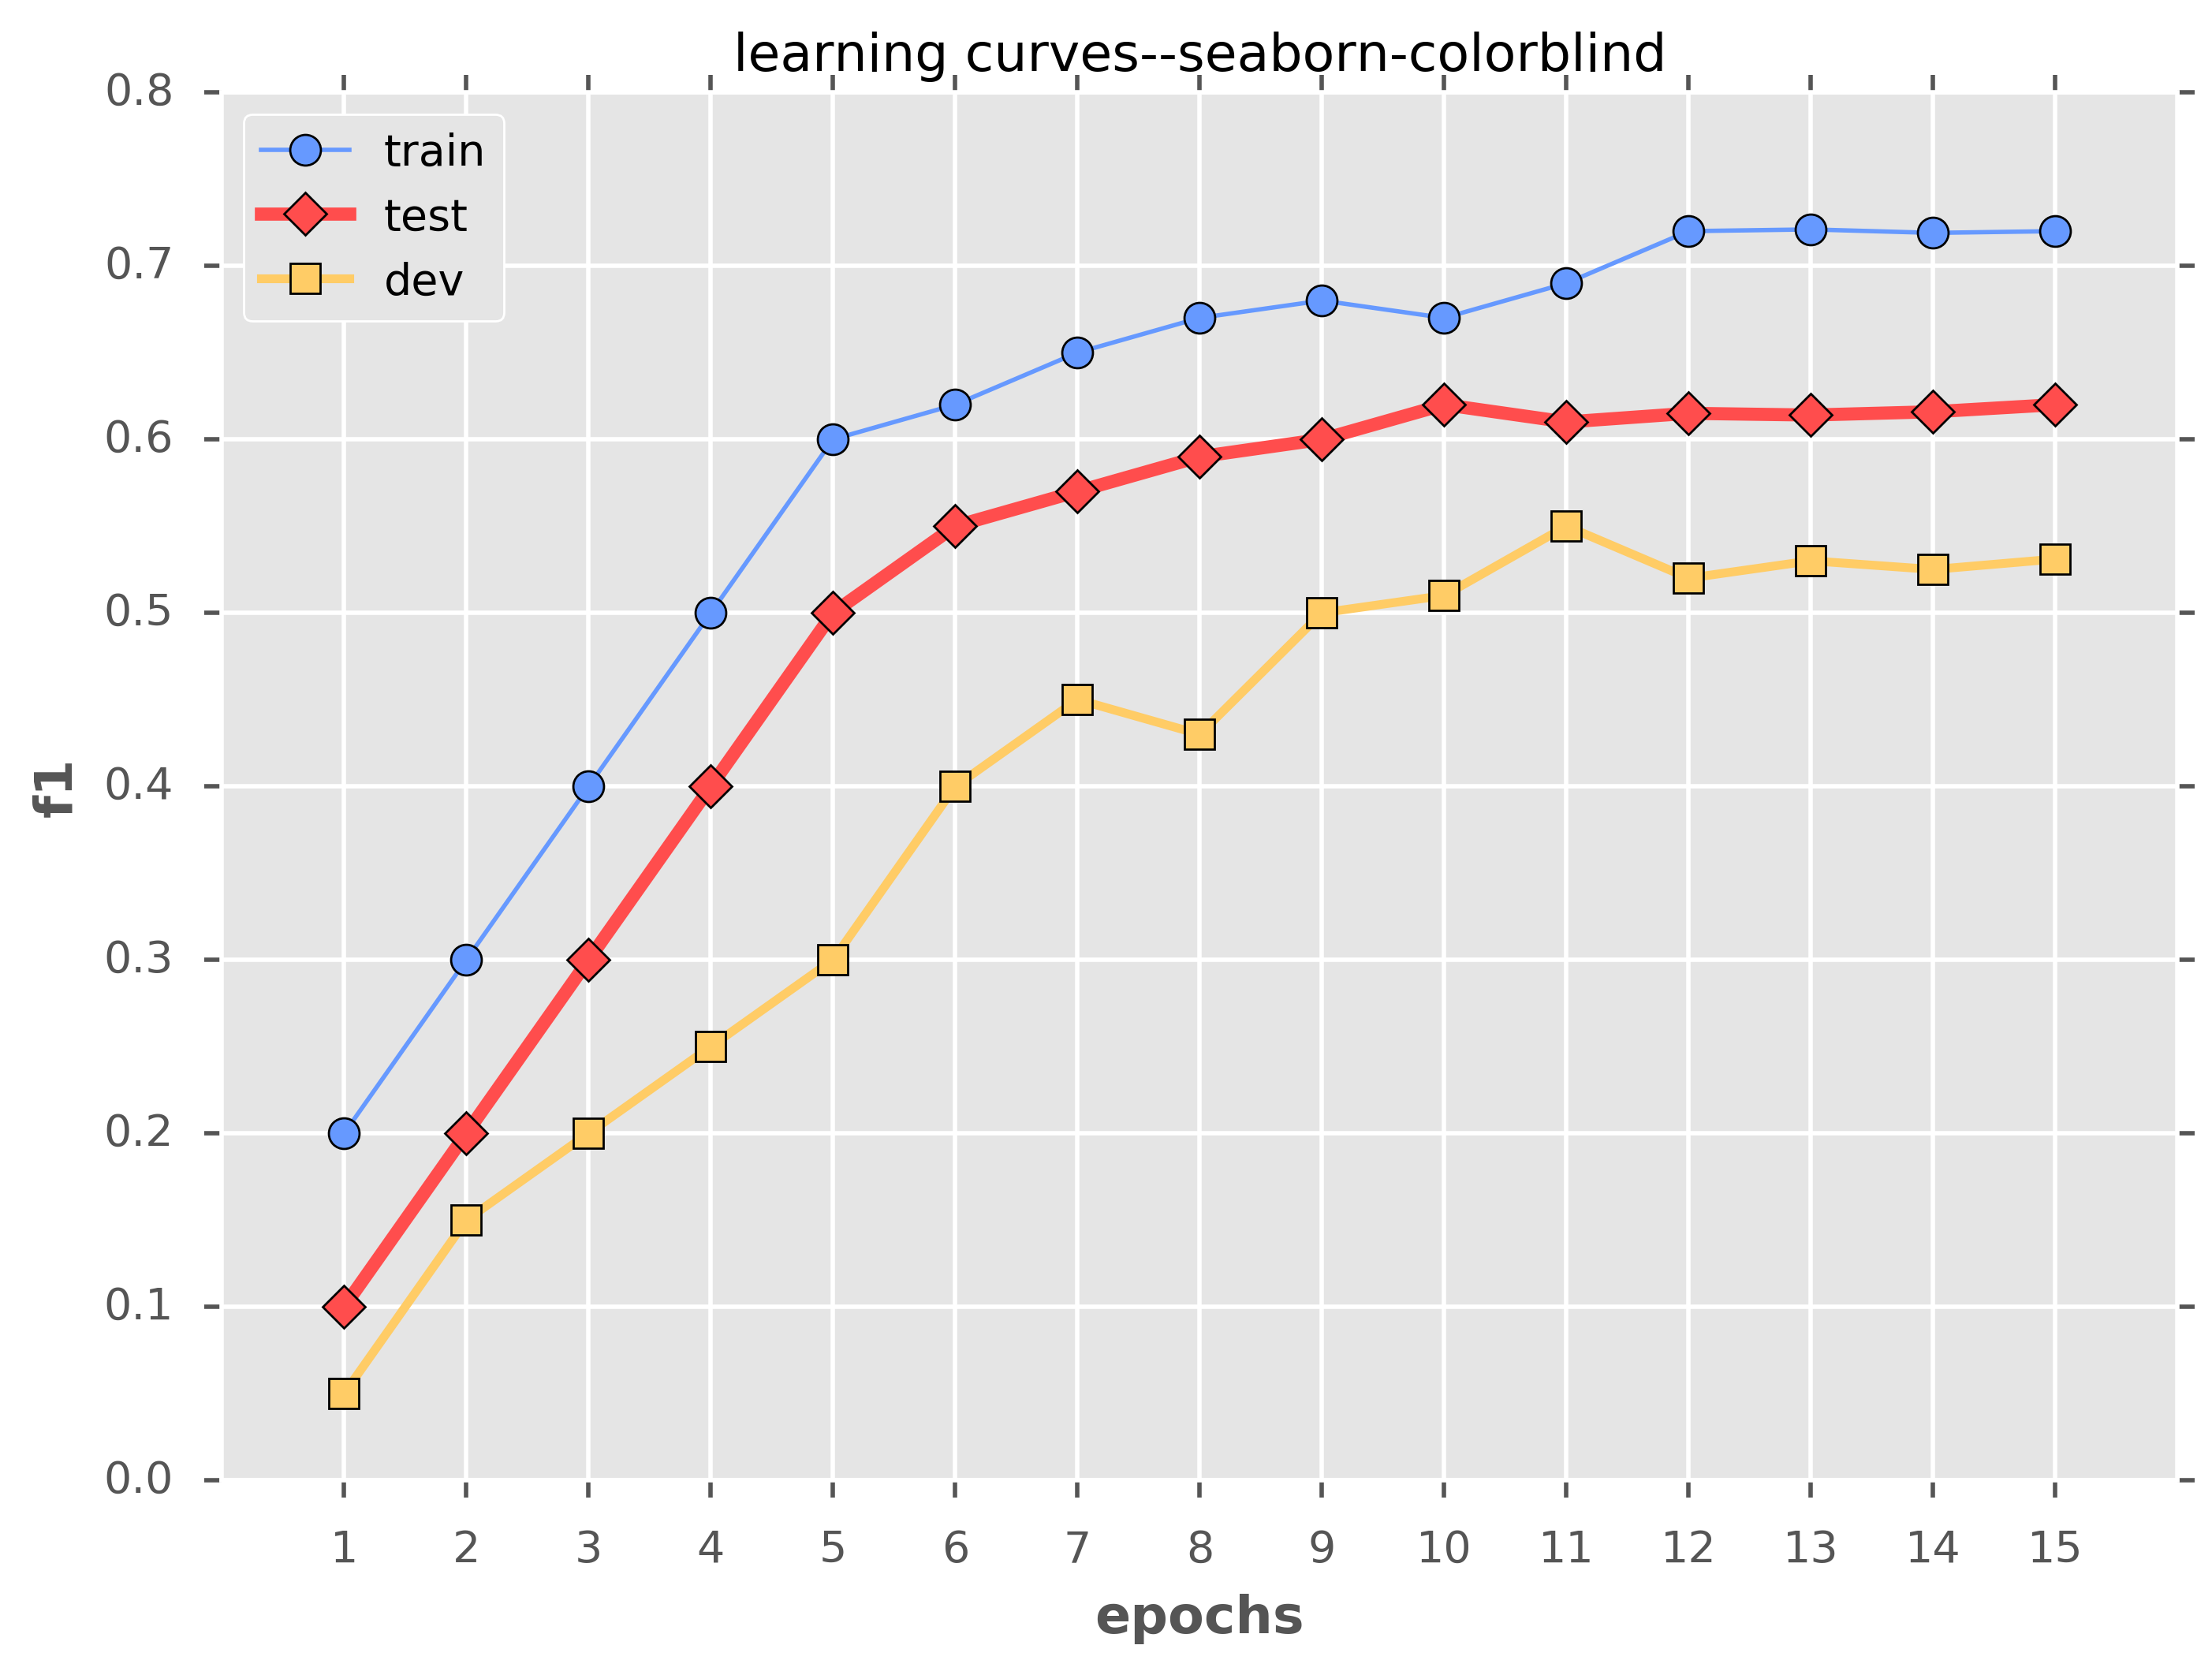

<Figure size 640x440 with 0 Axes>

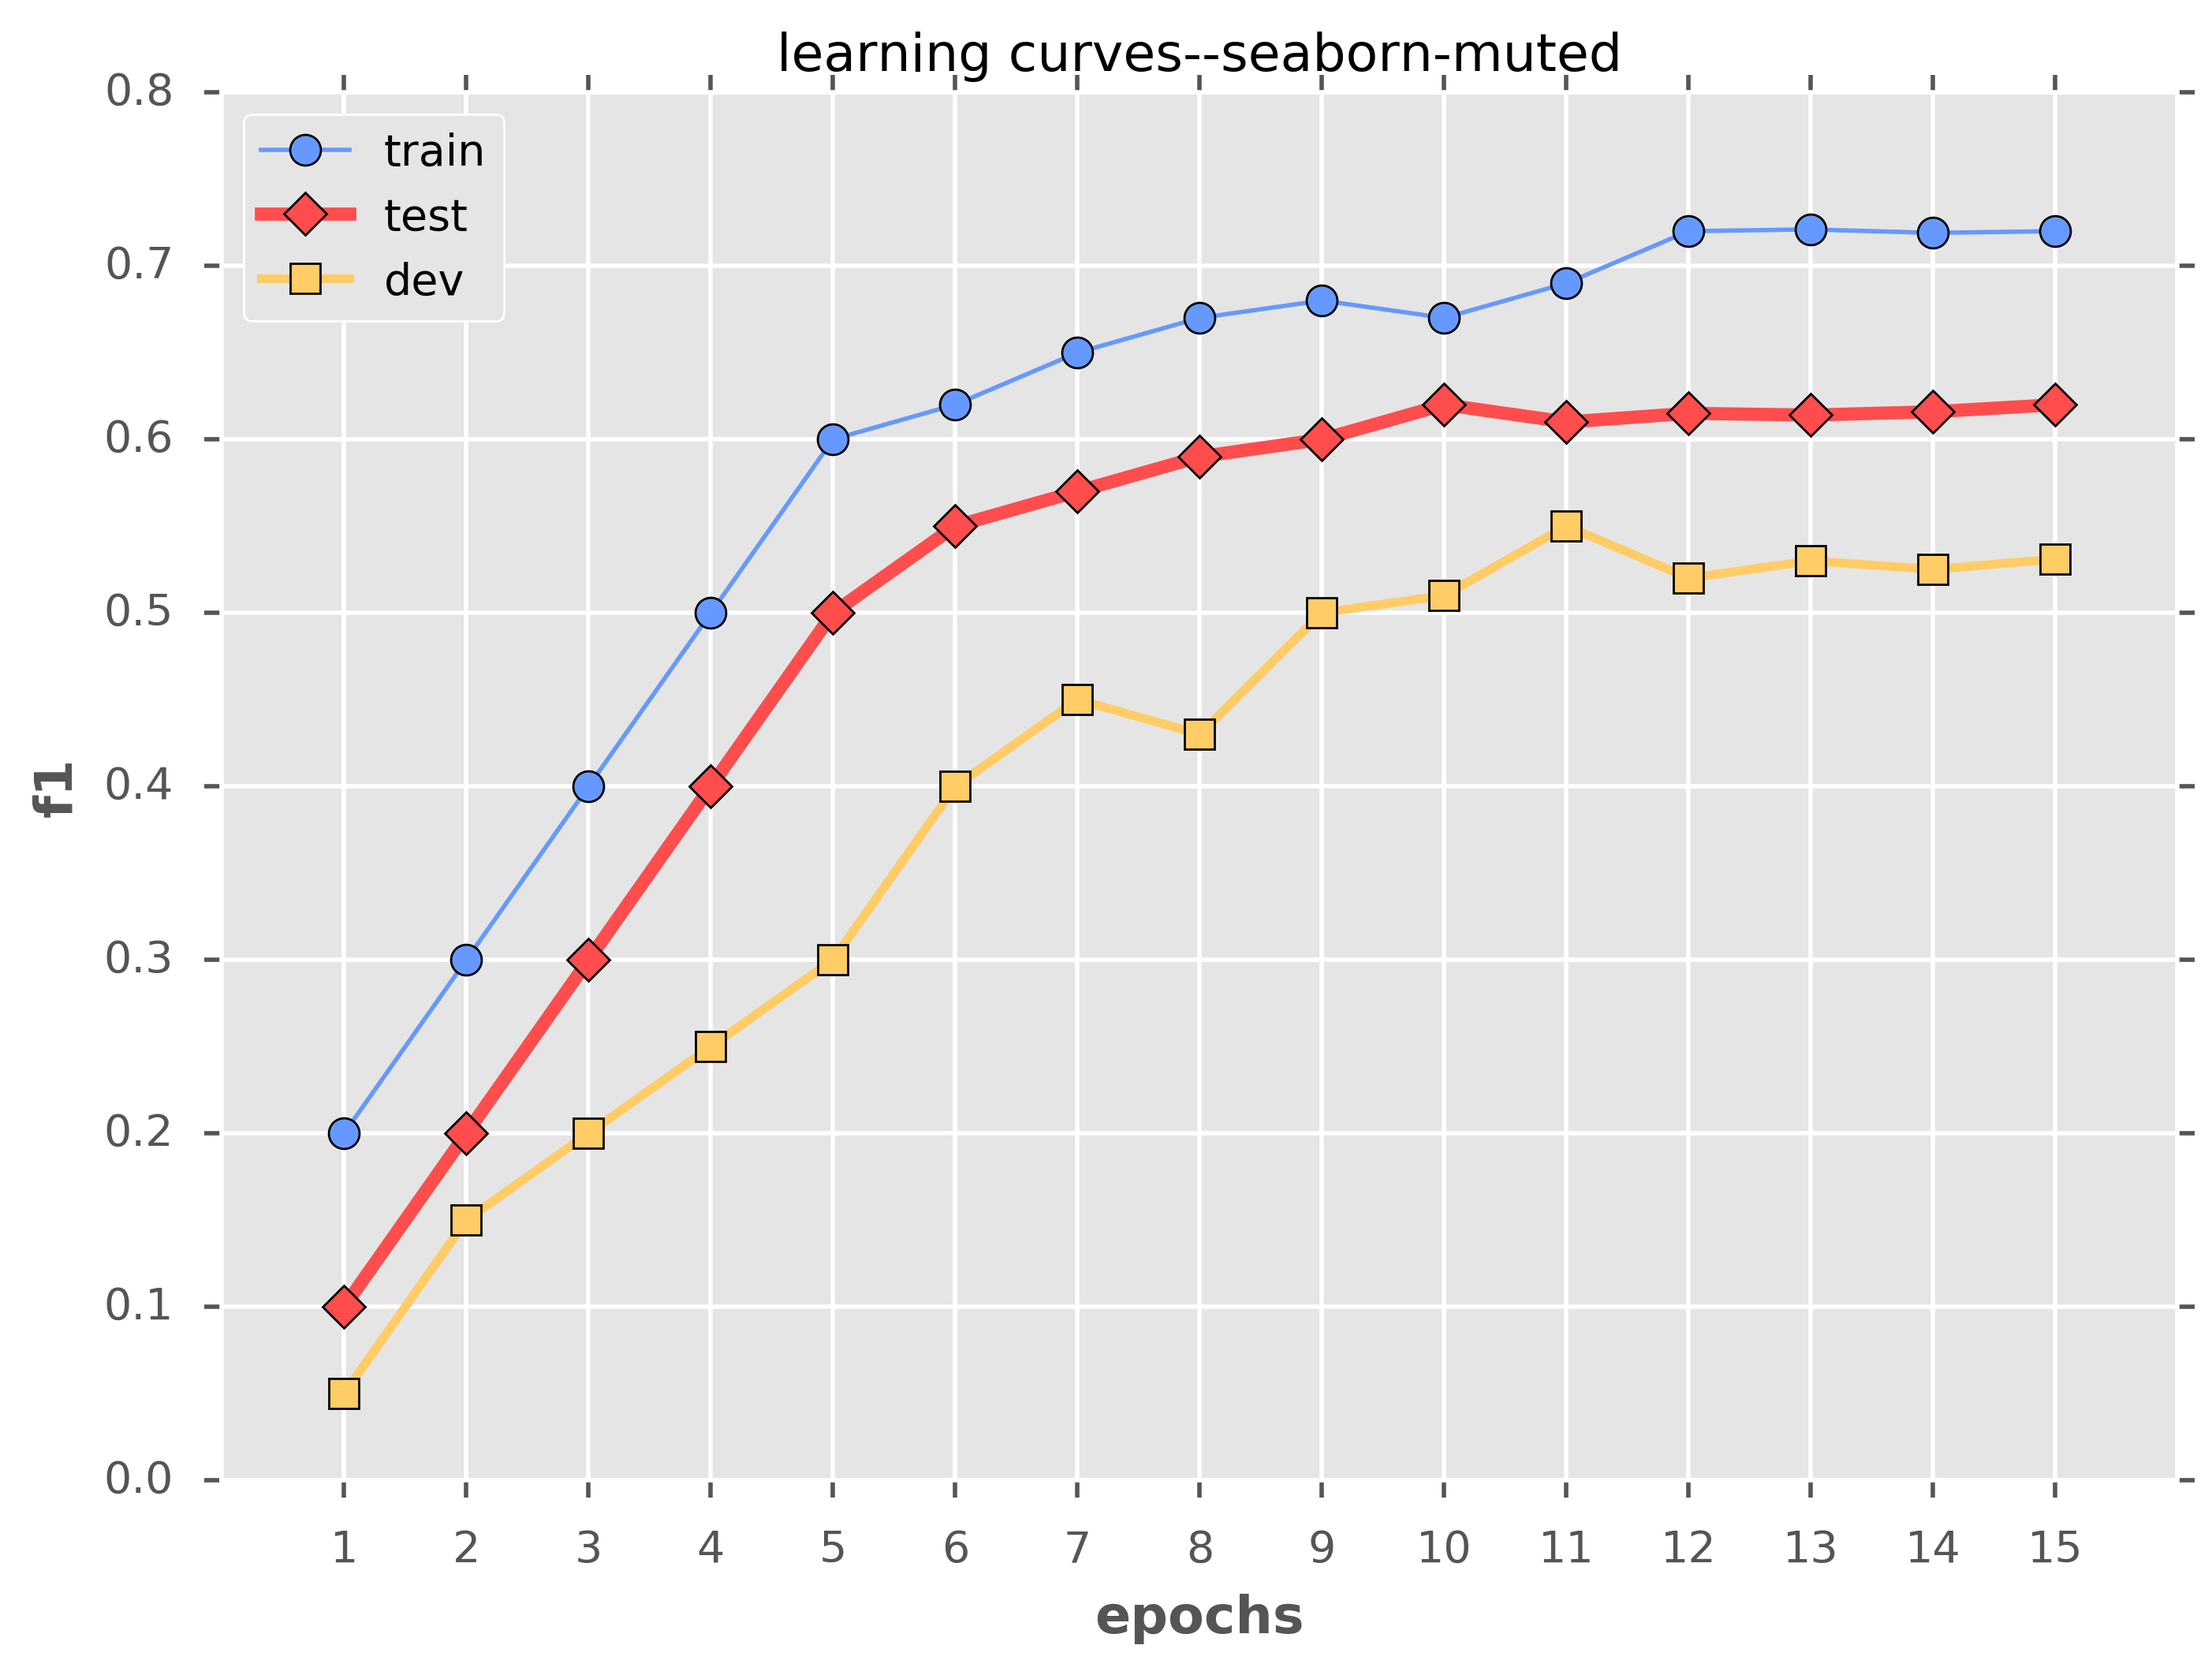

<Figure size 640x440 with 0 Axes>

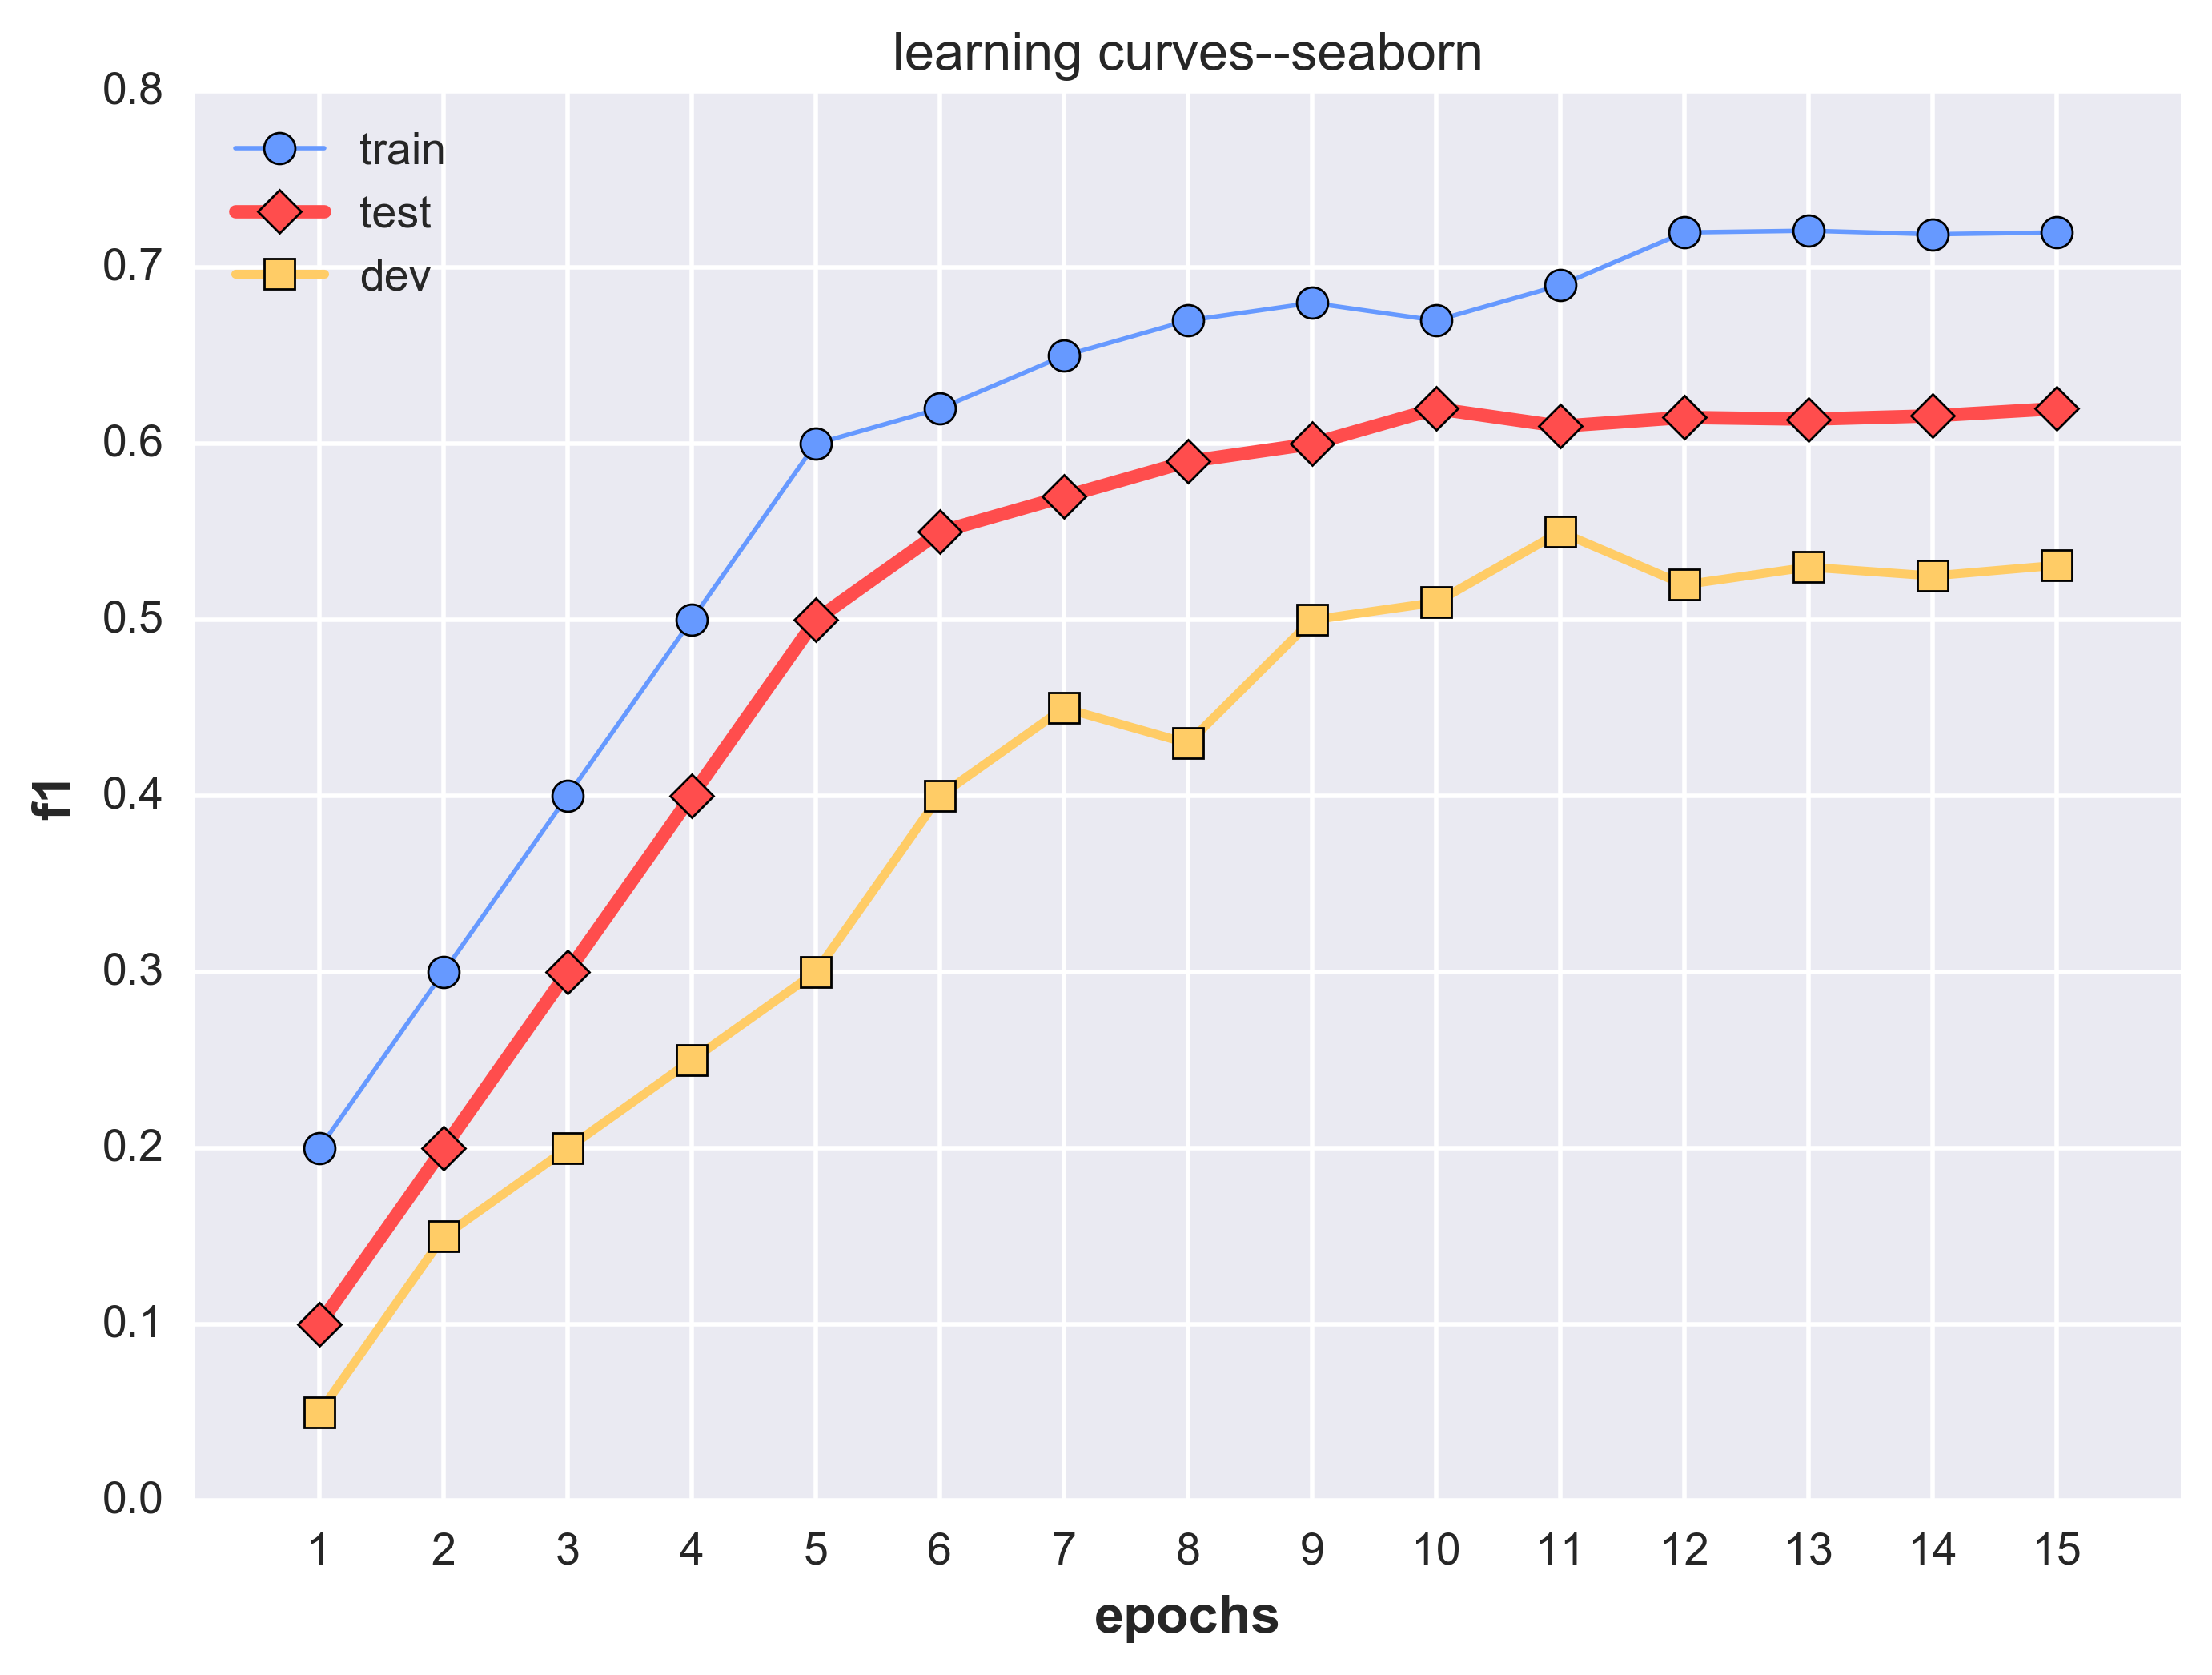

<Figure size 640x440 with 0 Axes>

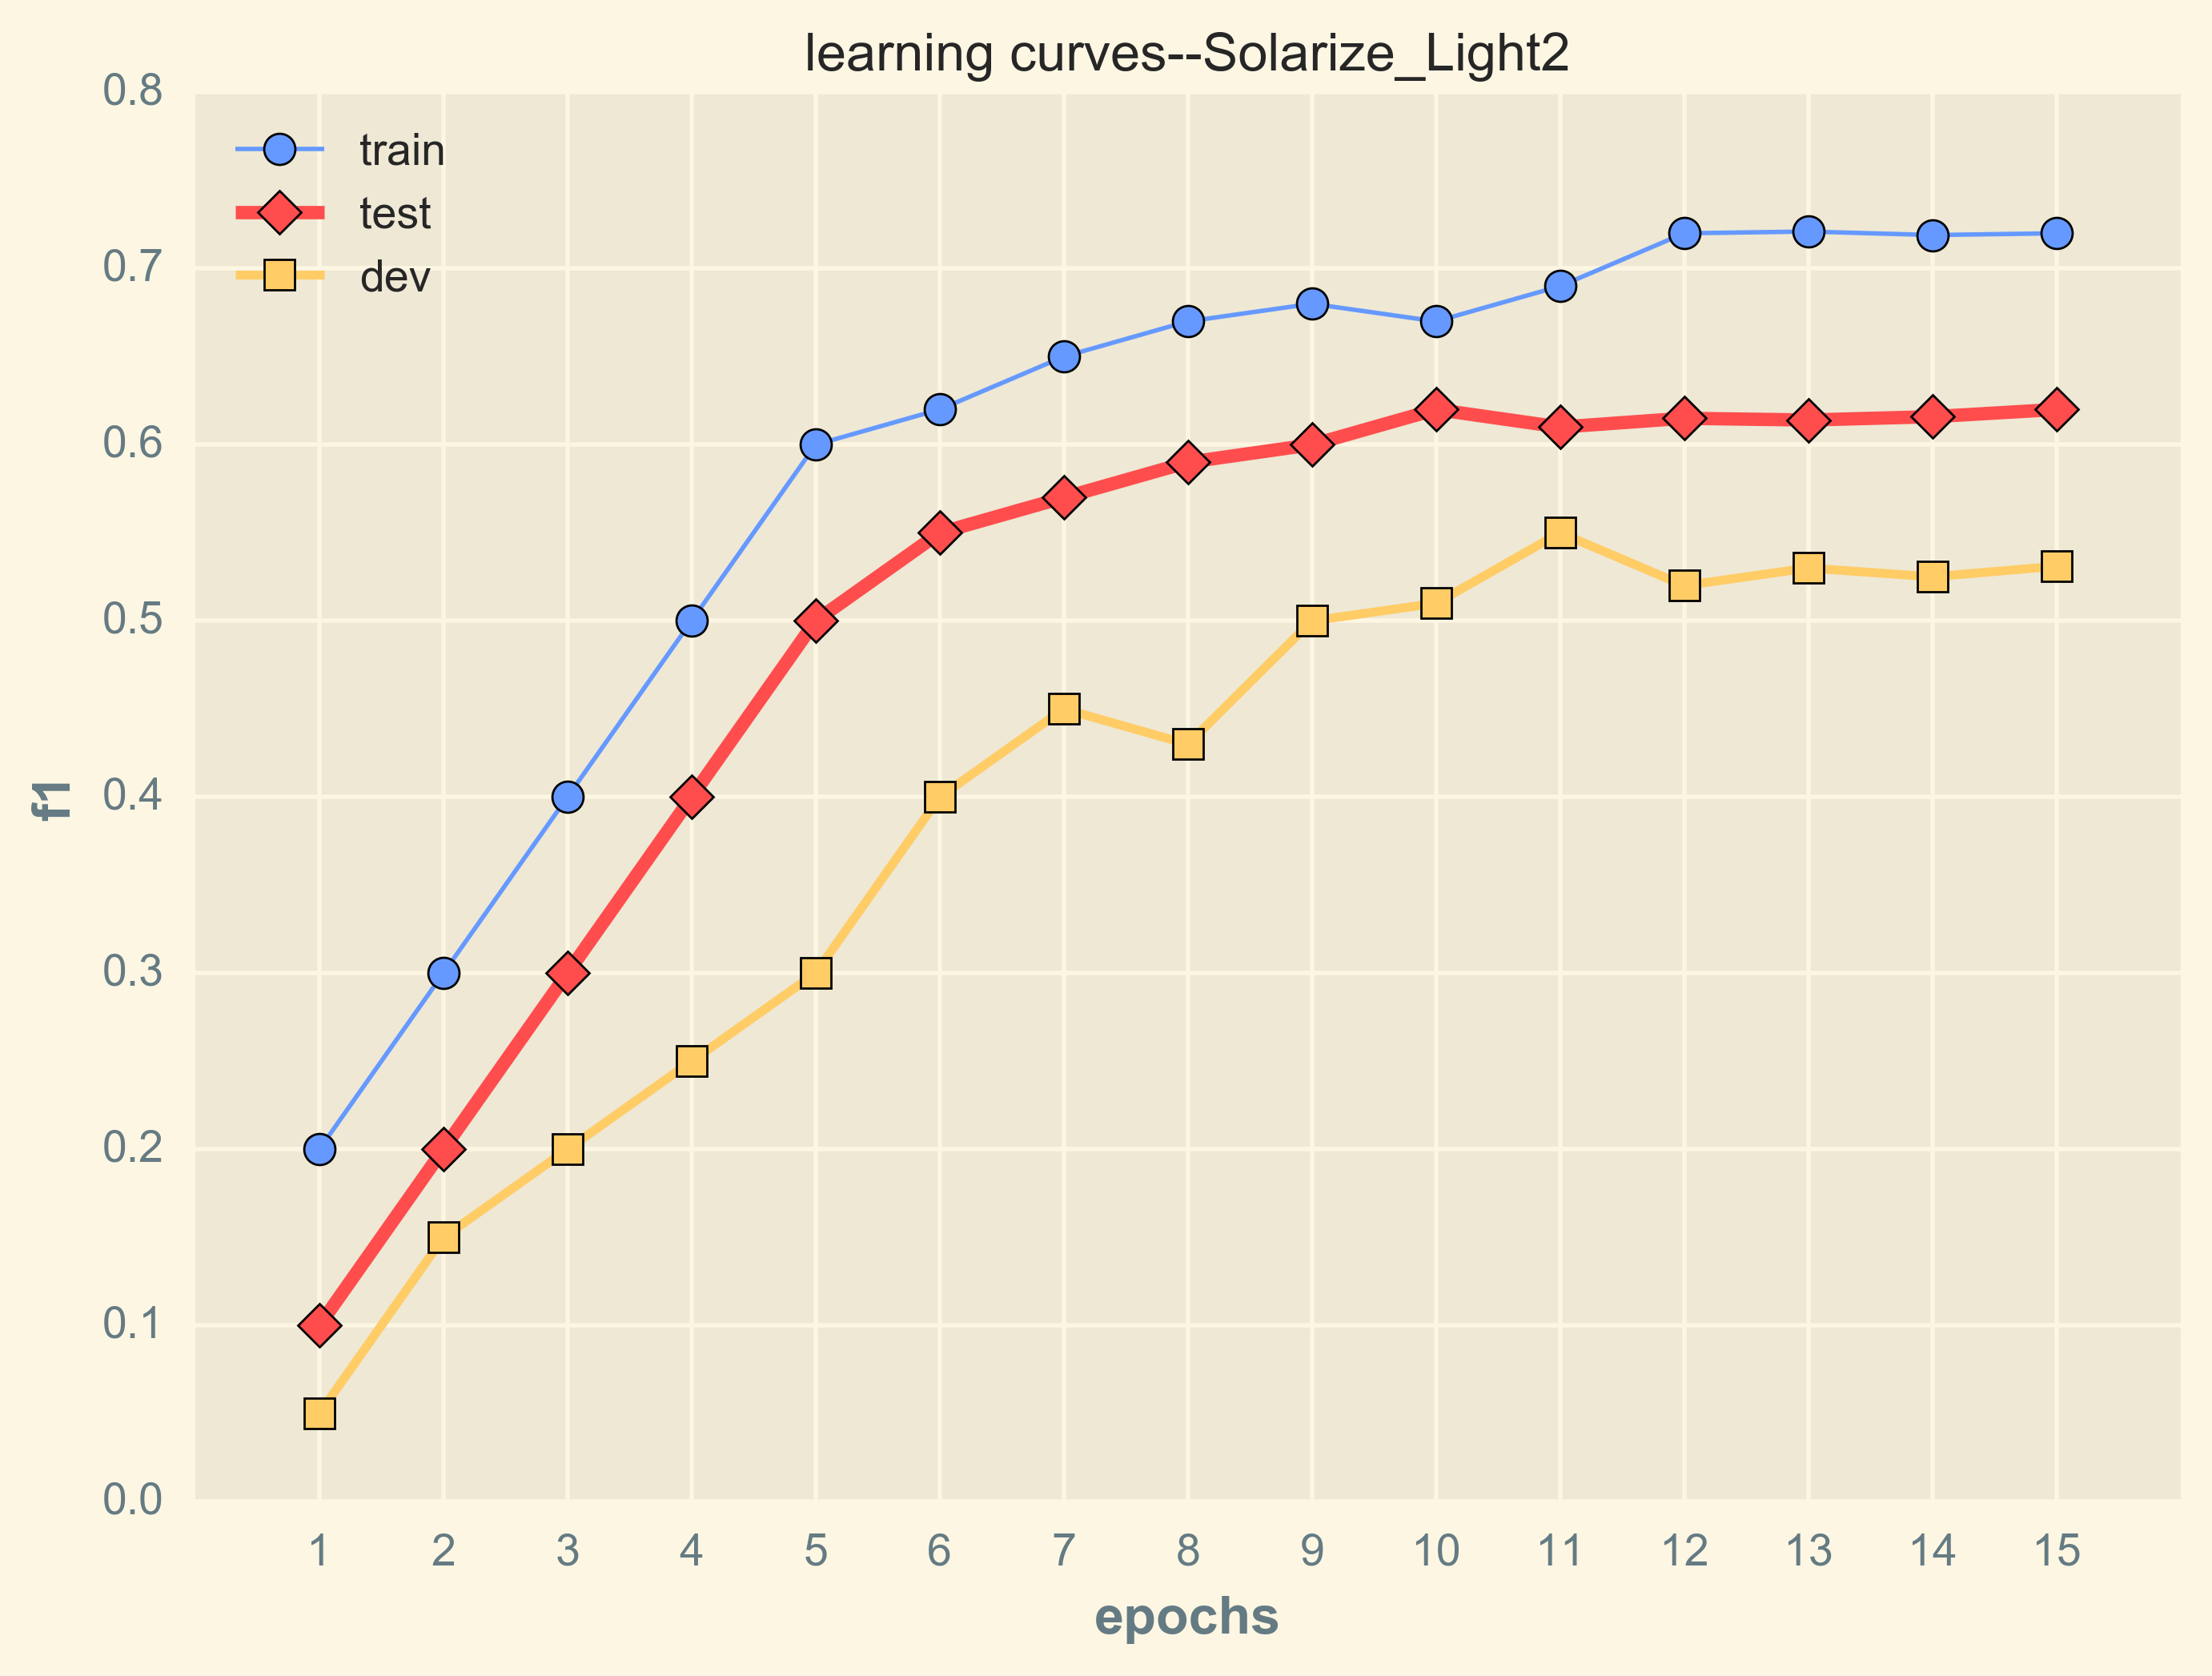

<Figure size 640x440 with 0 Axes>

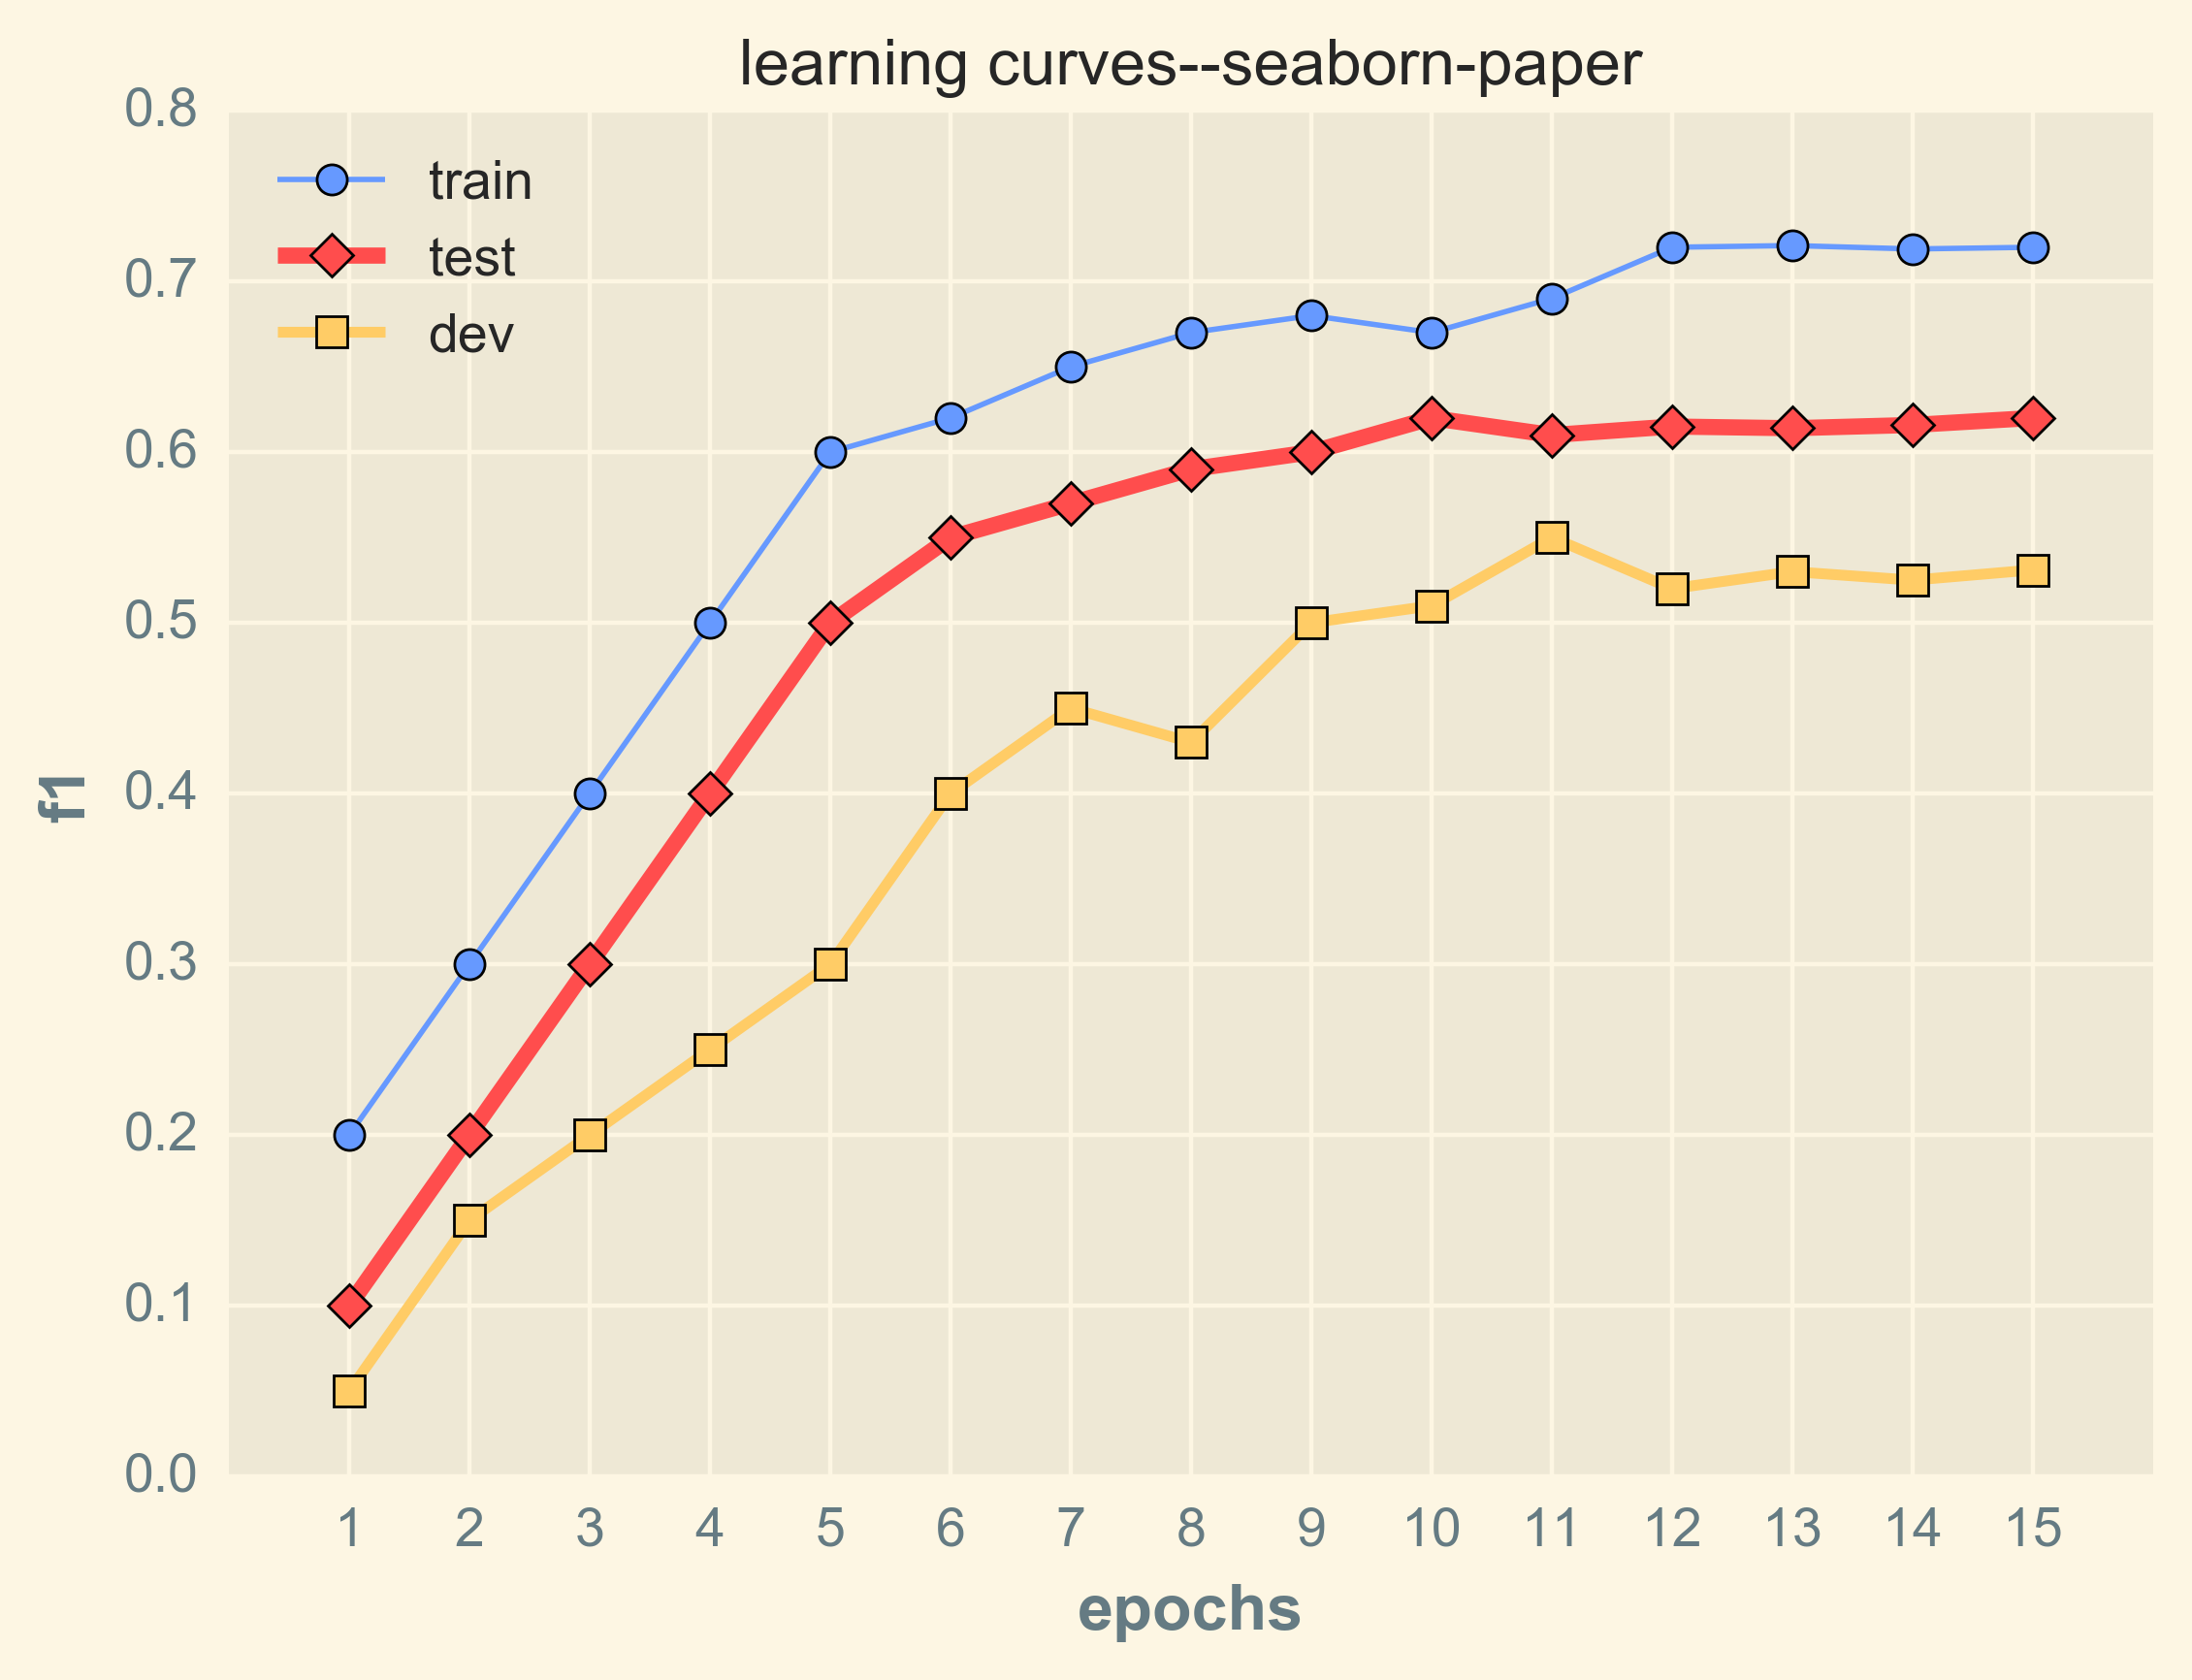

<Figure size 512x352 with 0 Axes>

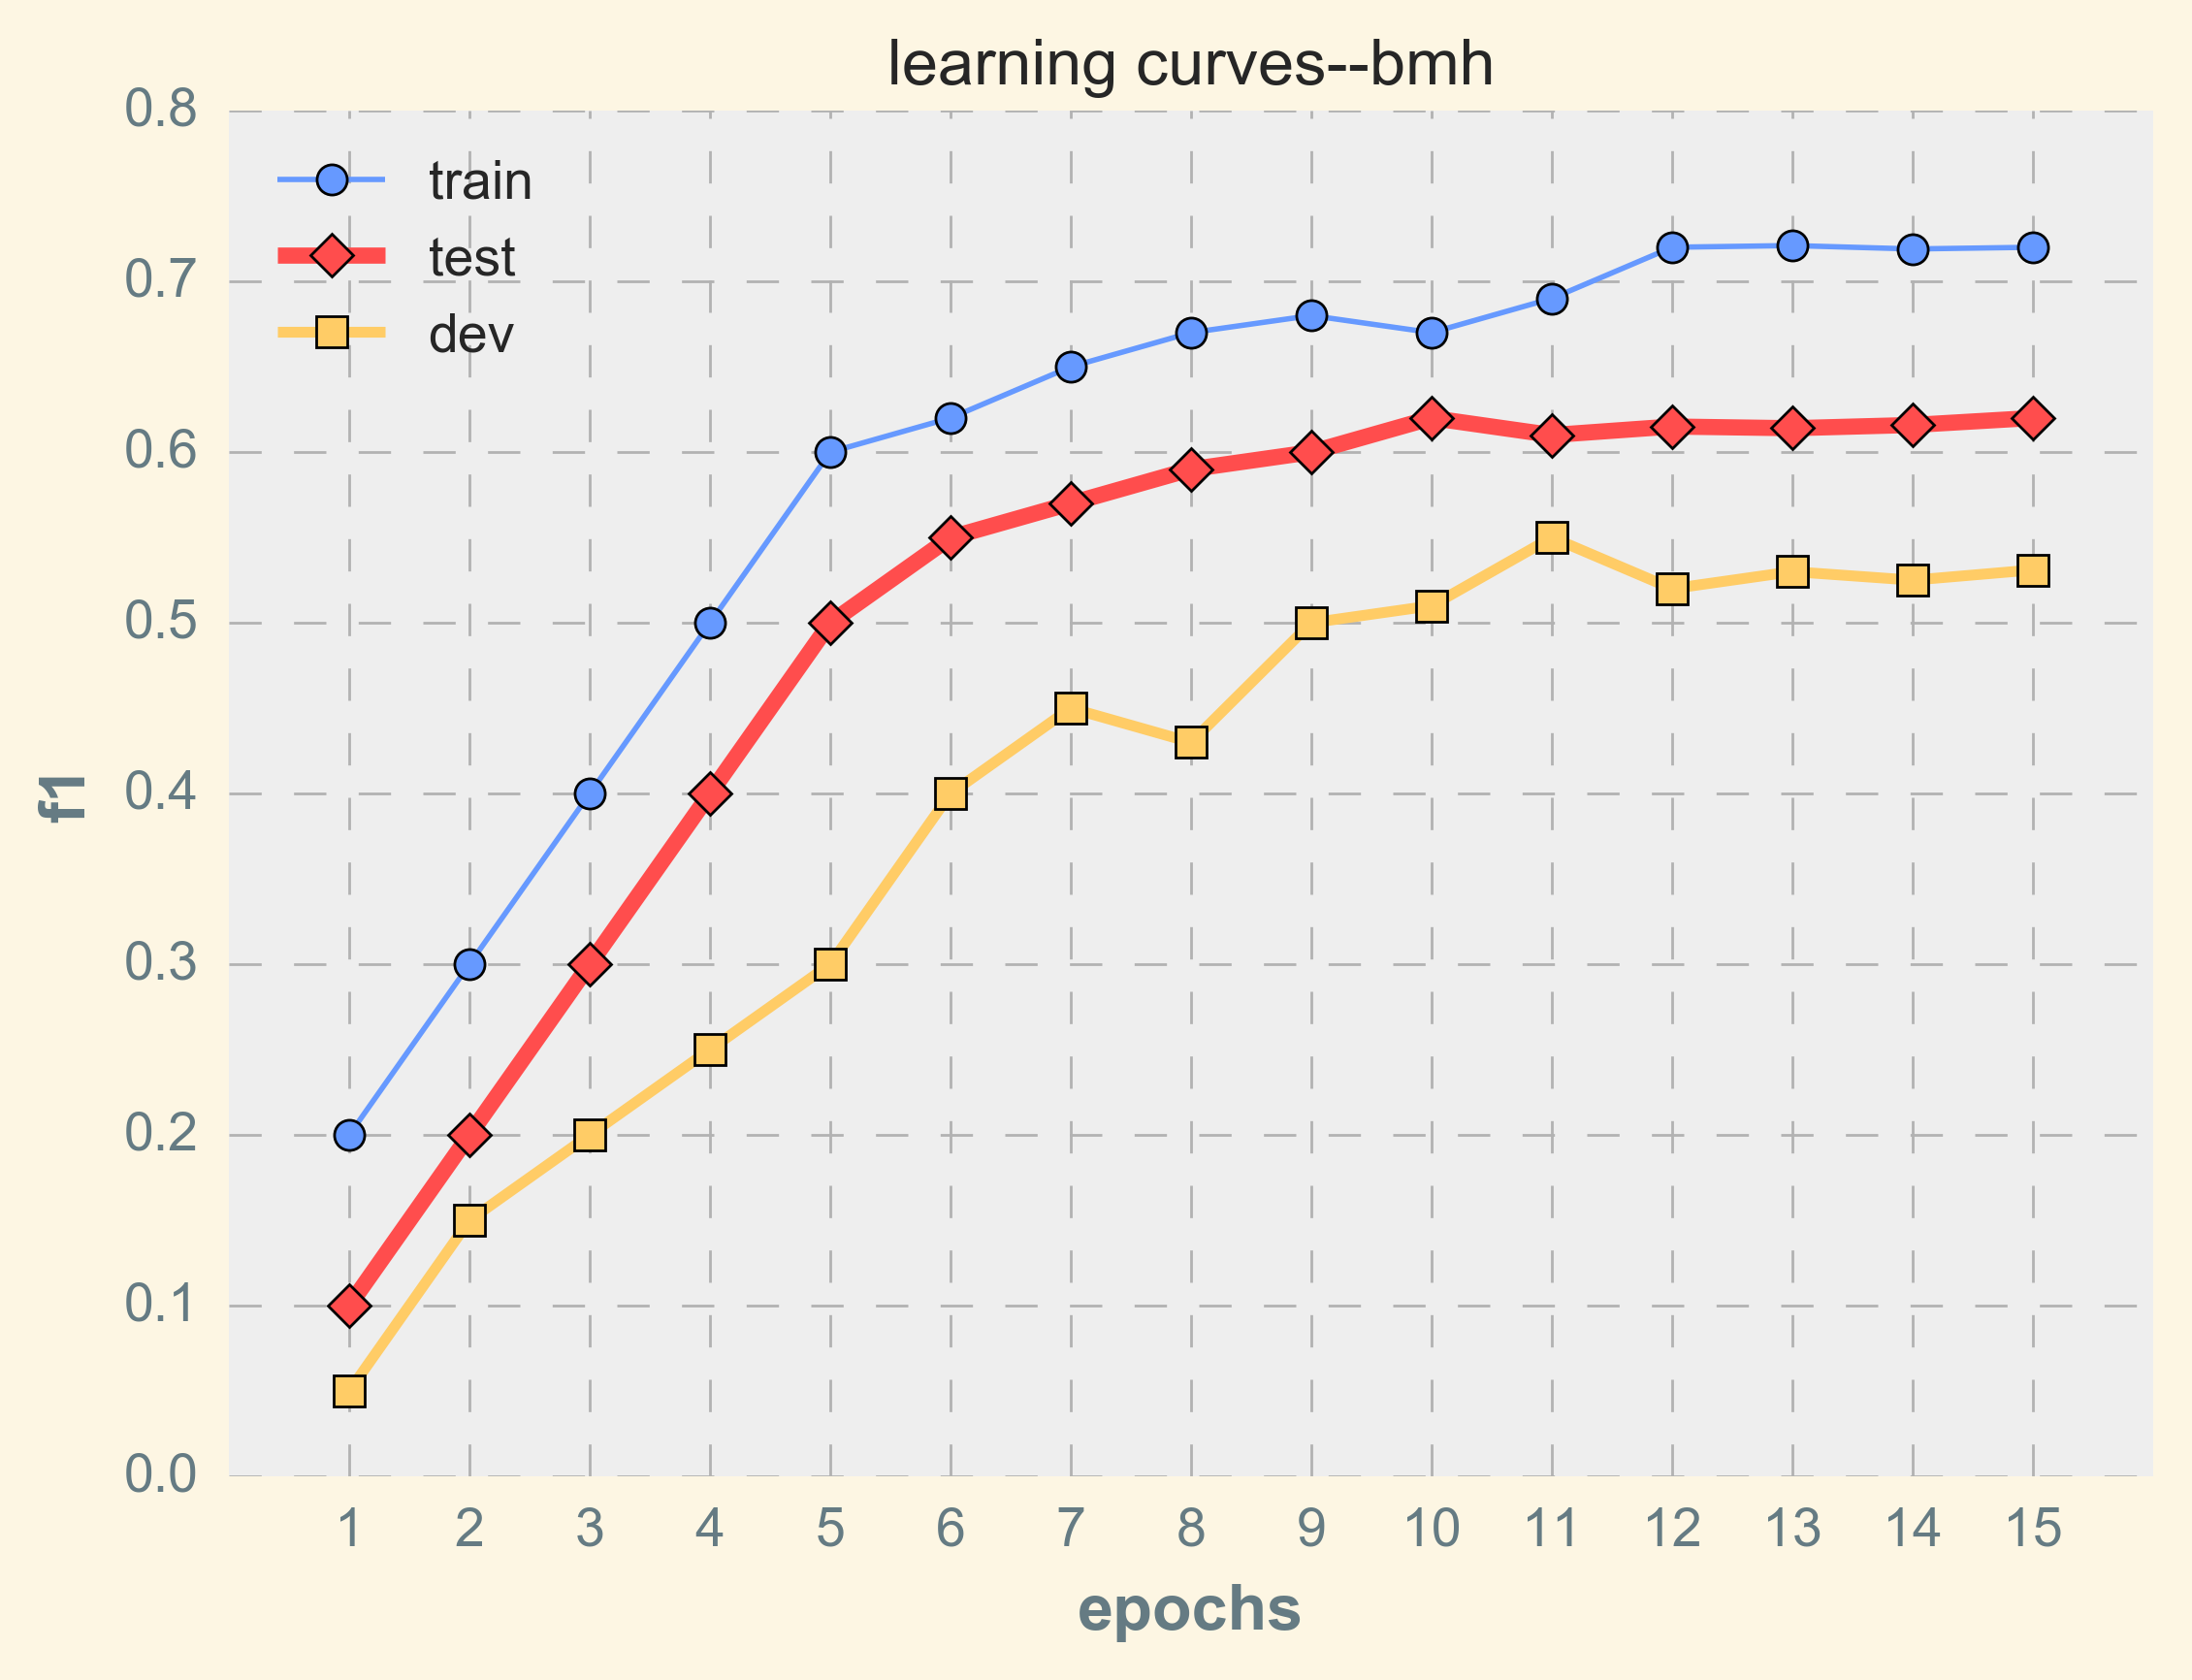

<Figure size 512x352 with 0 Axes>

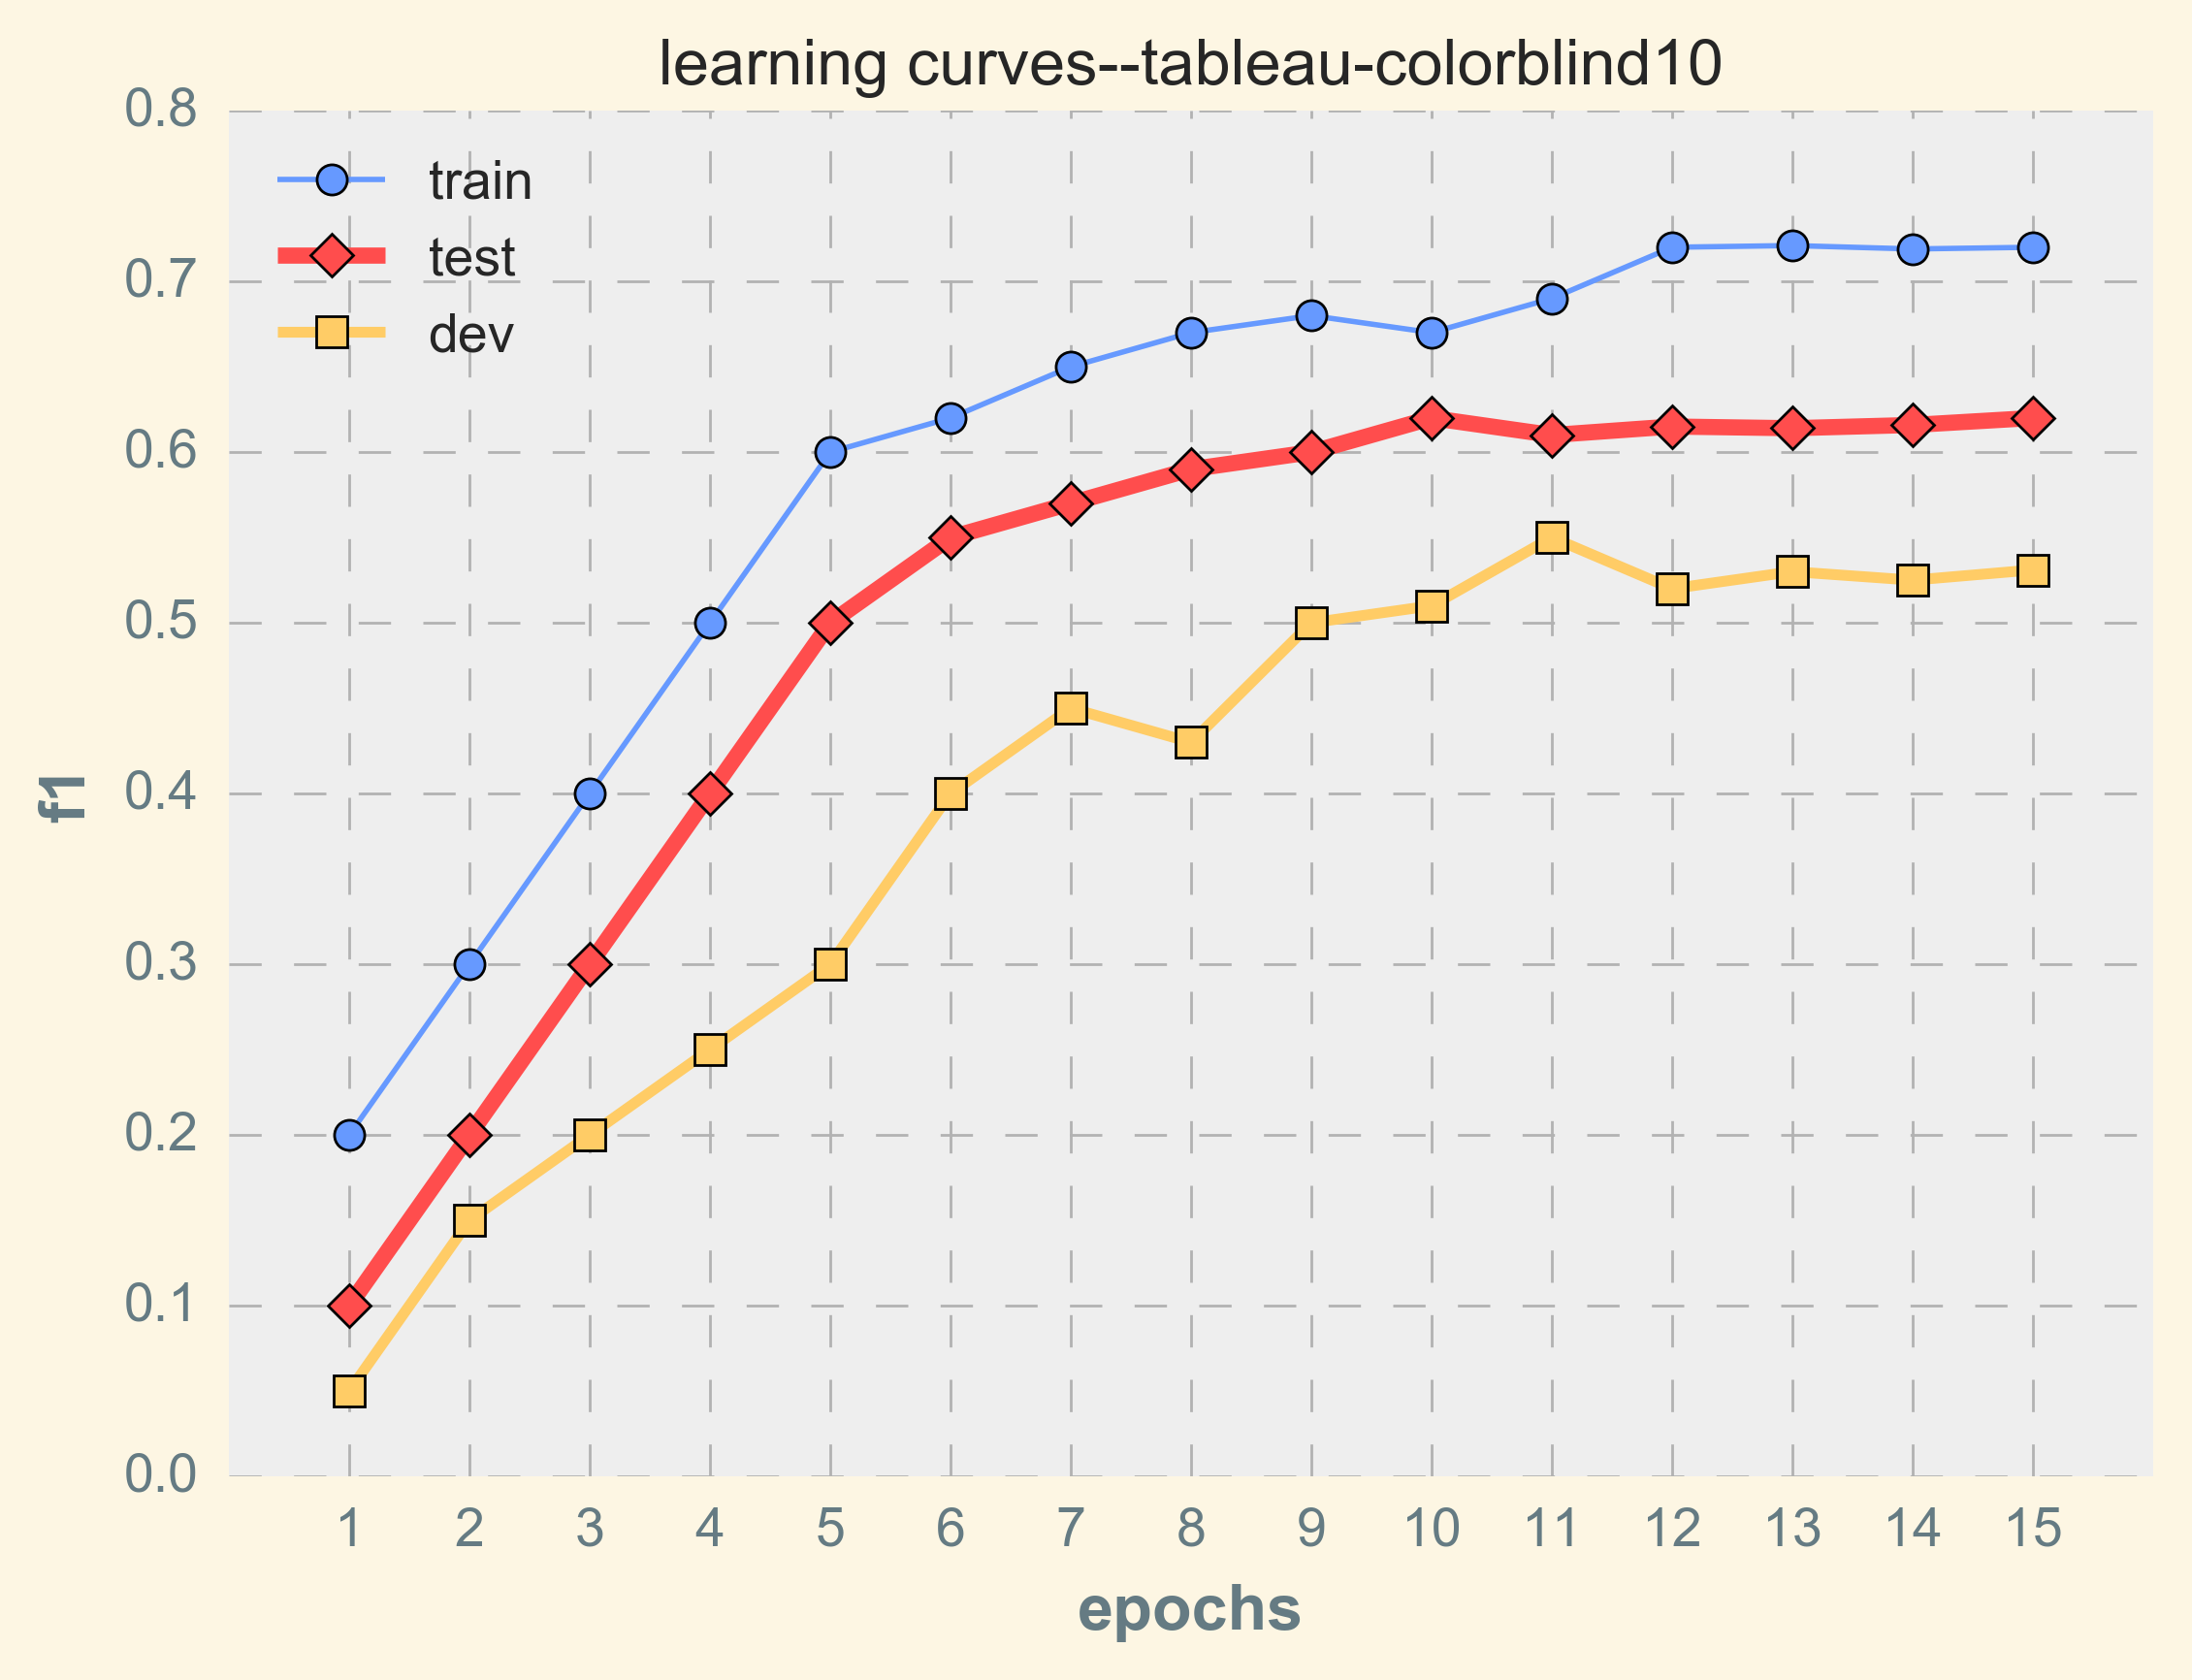

<Figure size 512x352 with 0 Axes>

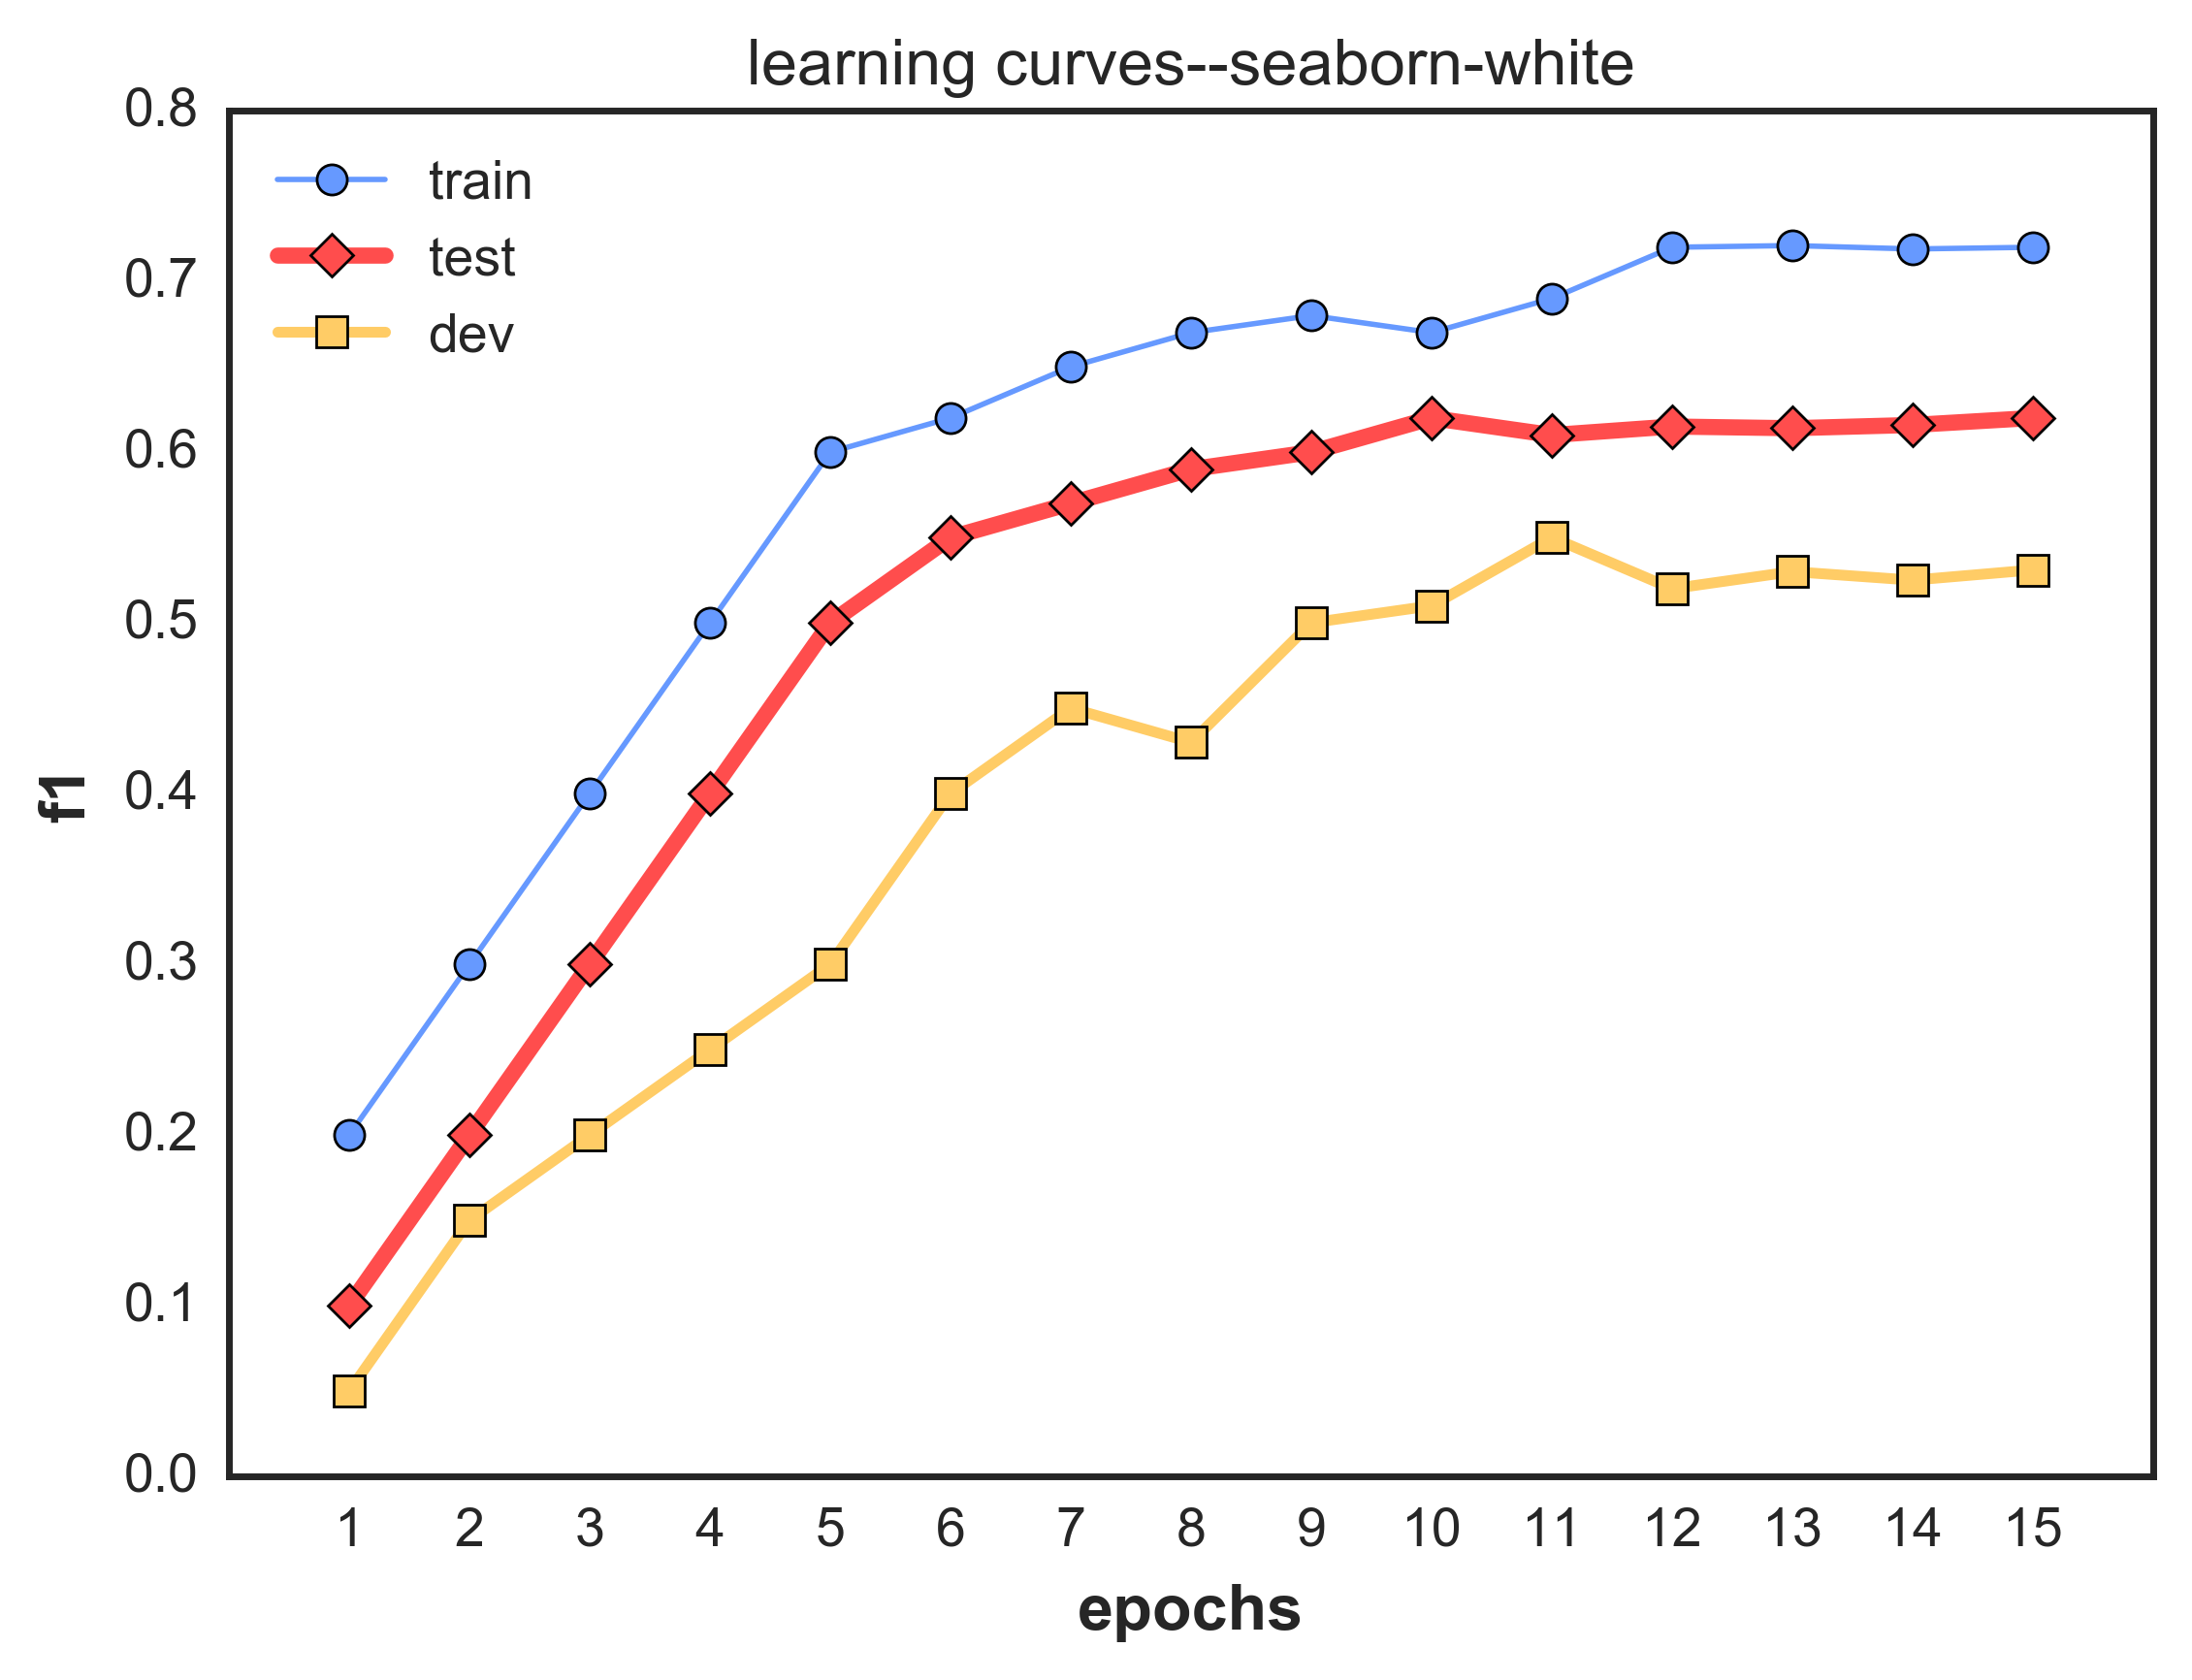

<Figure size 512x352 with 0 Axes>

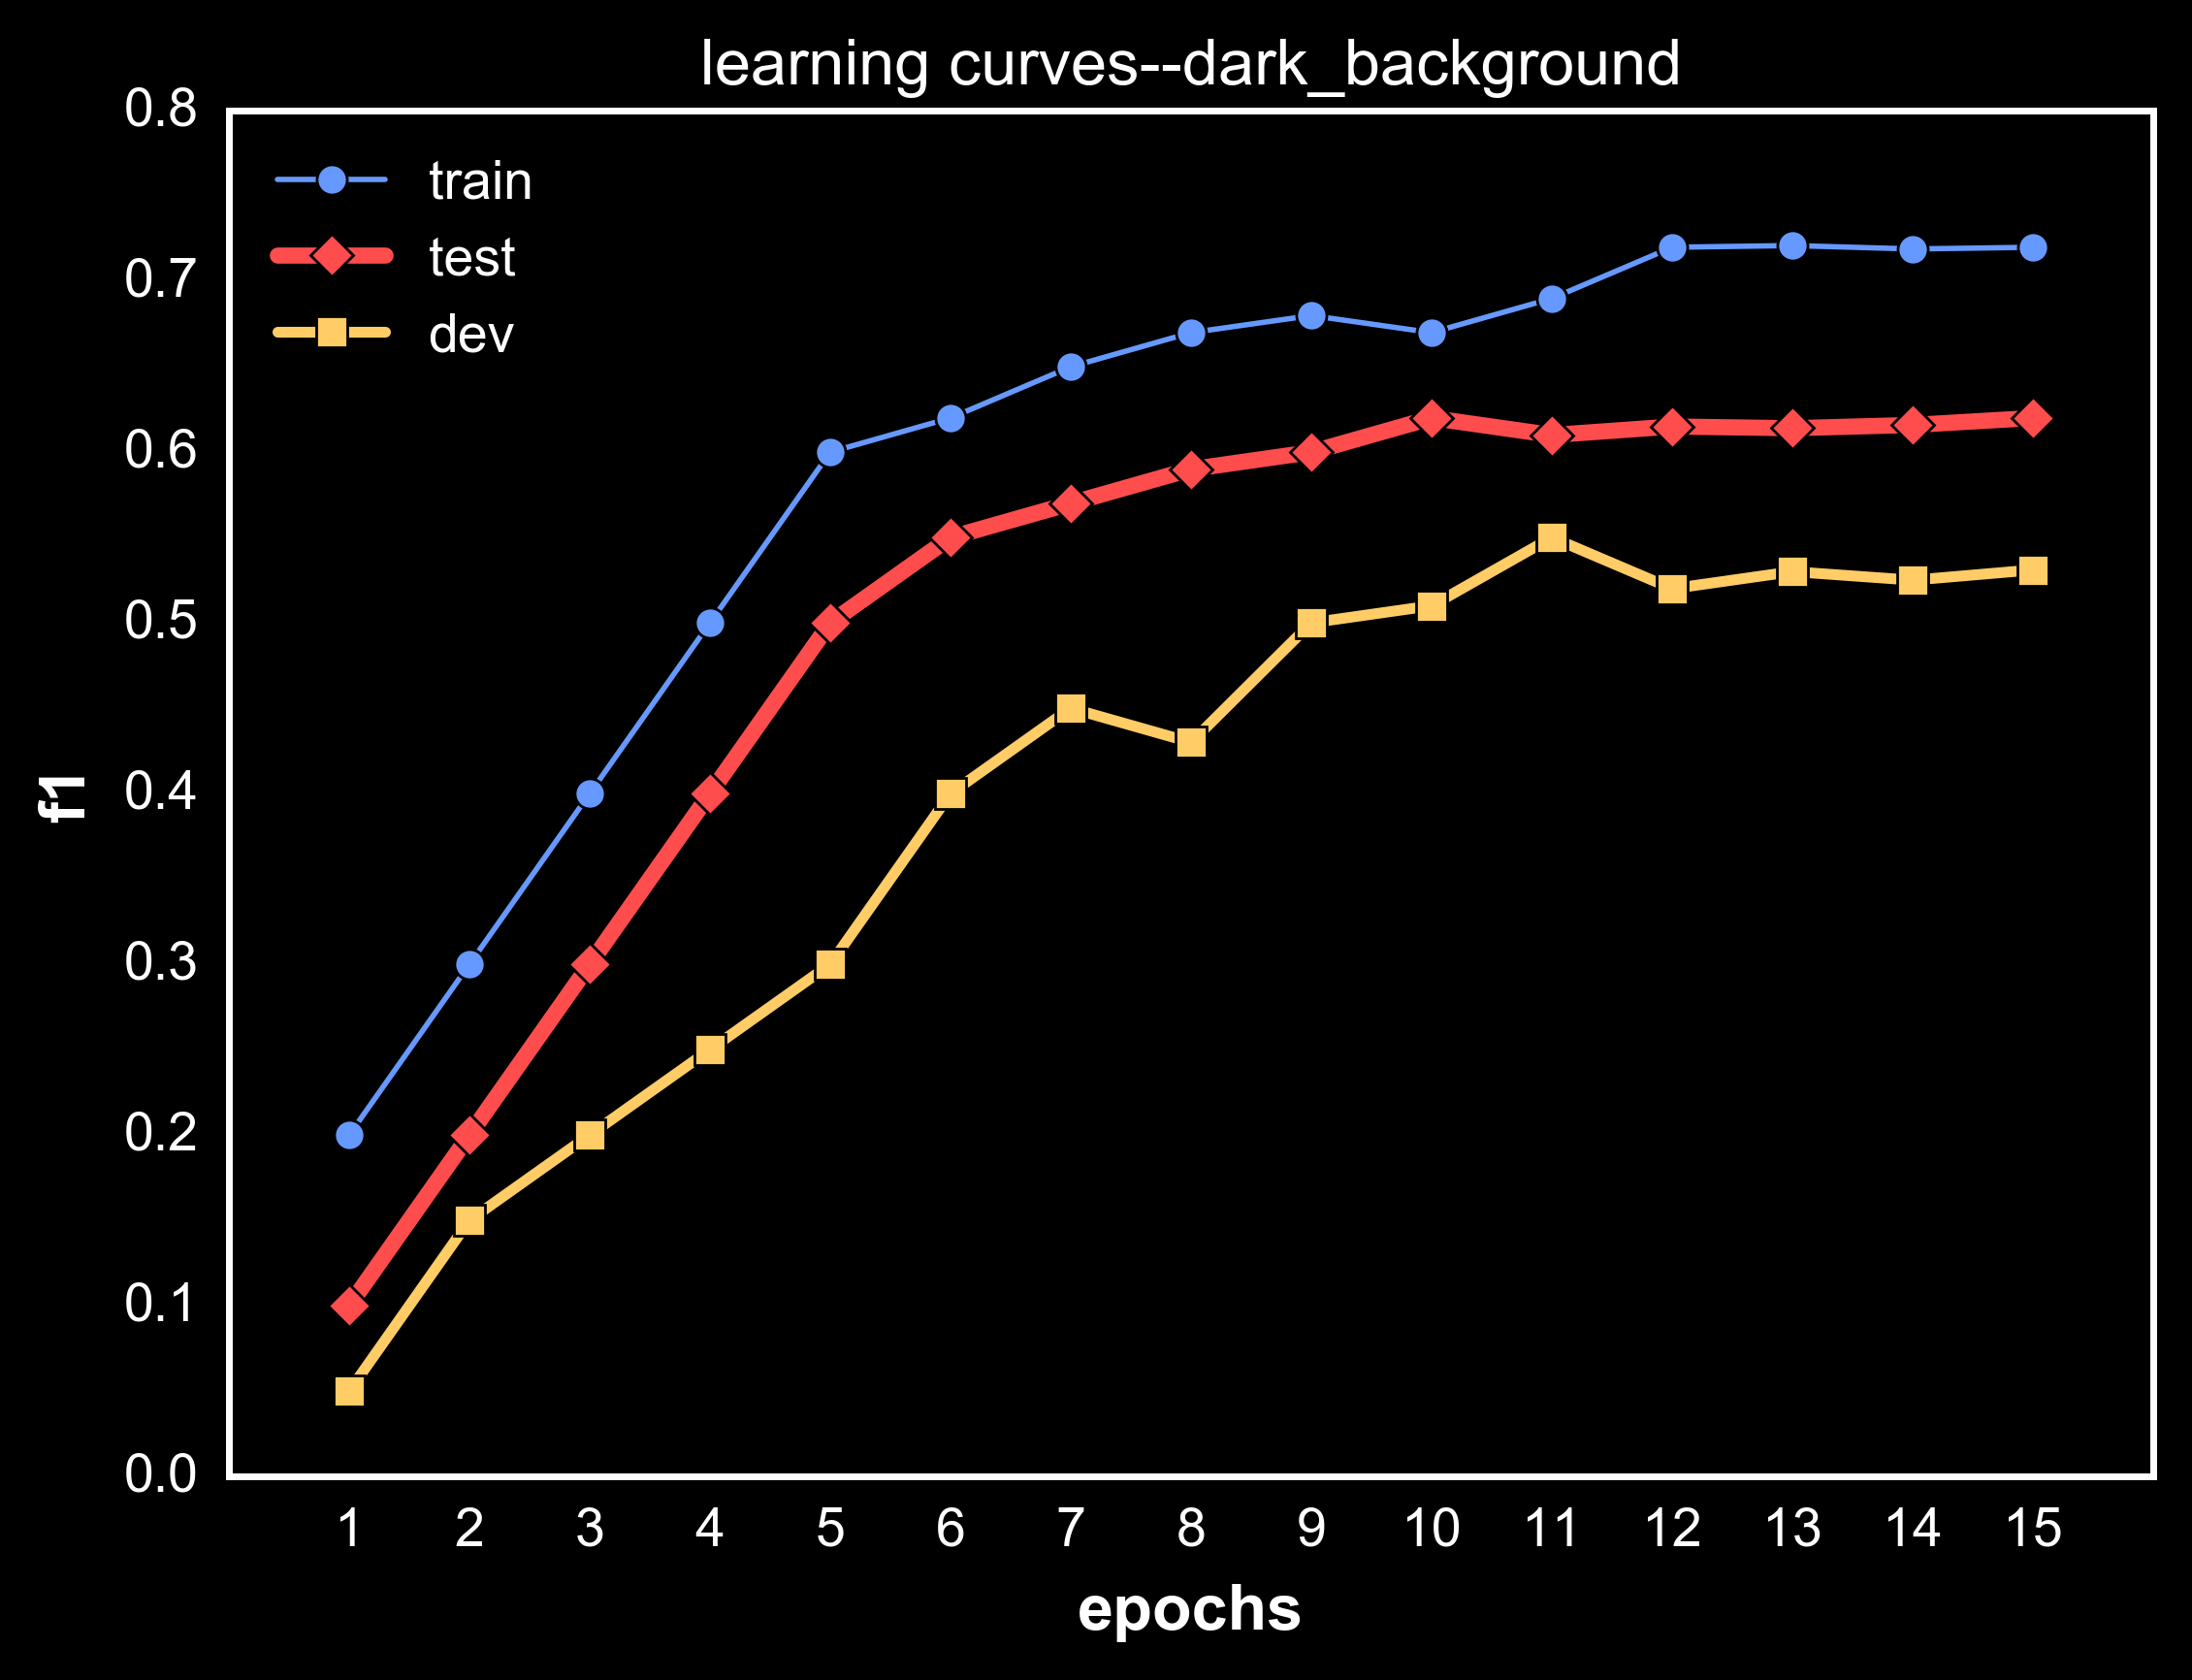

<Figure size 512x352 with 0 Axes>

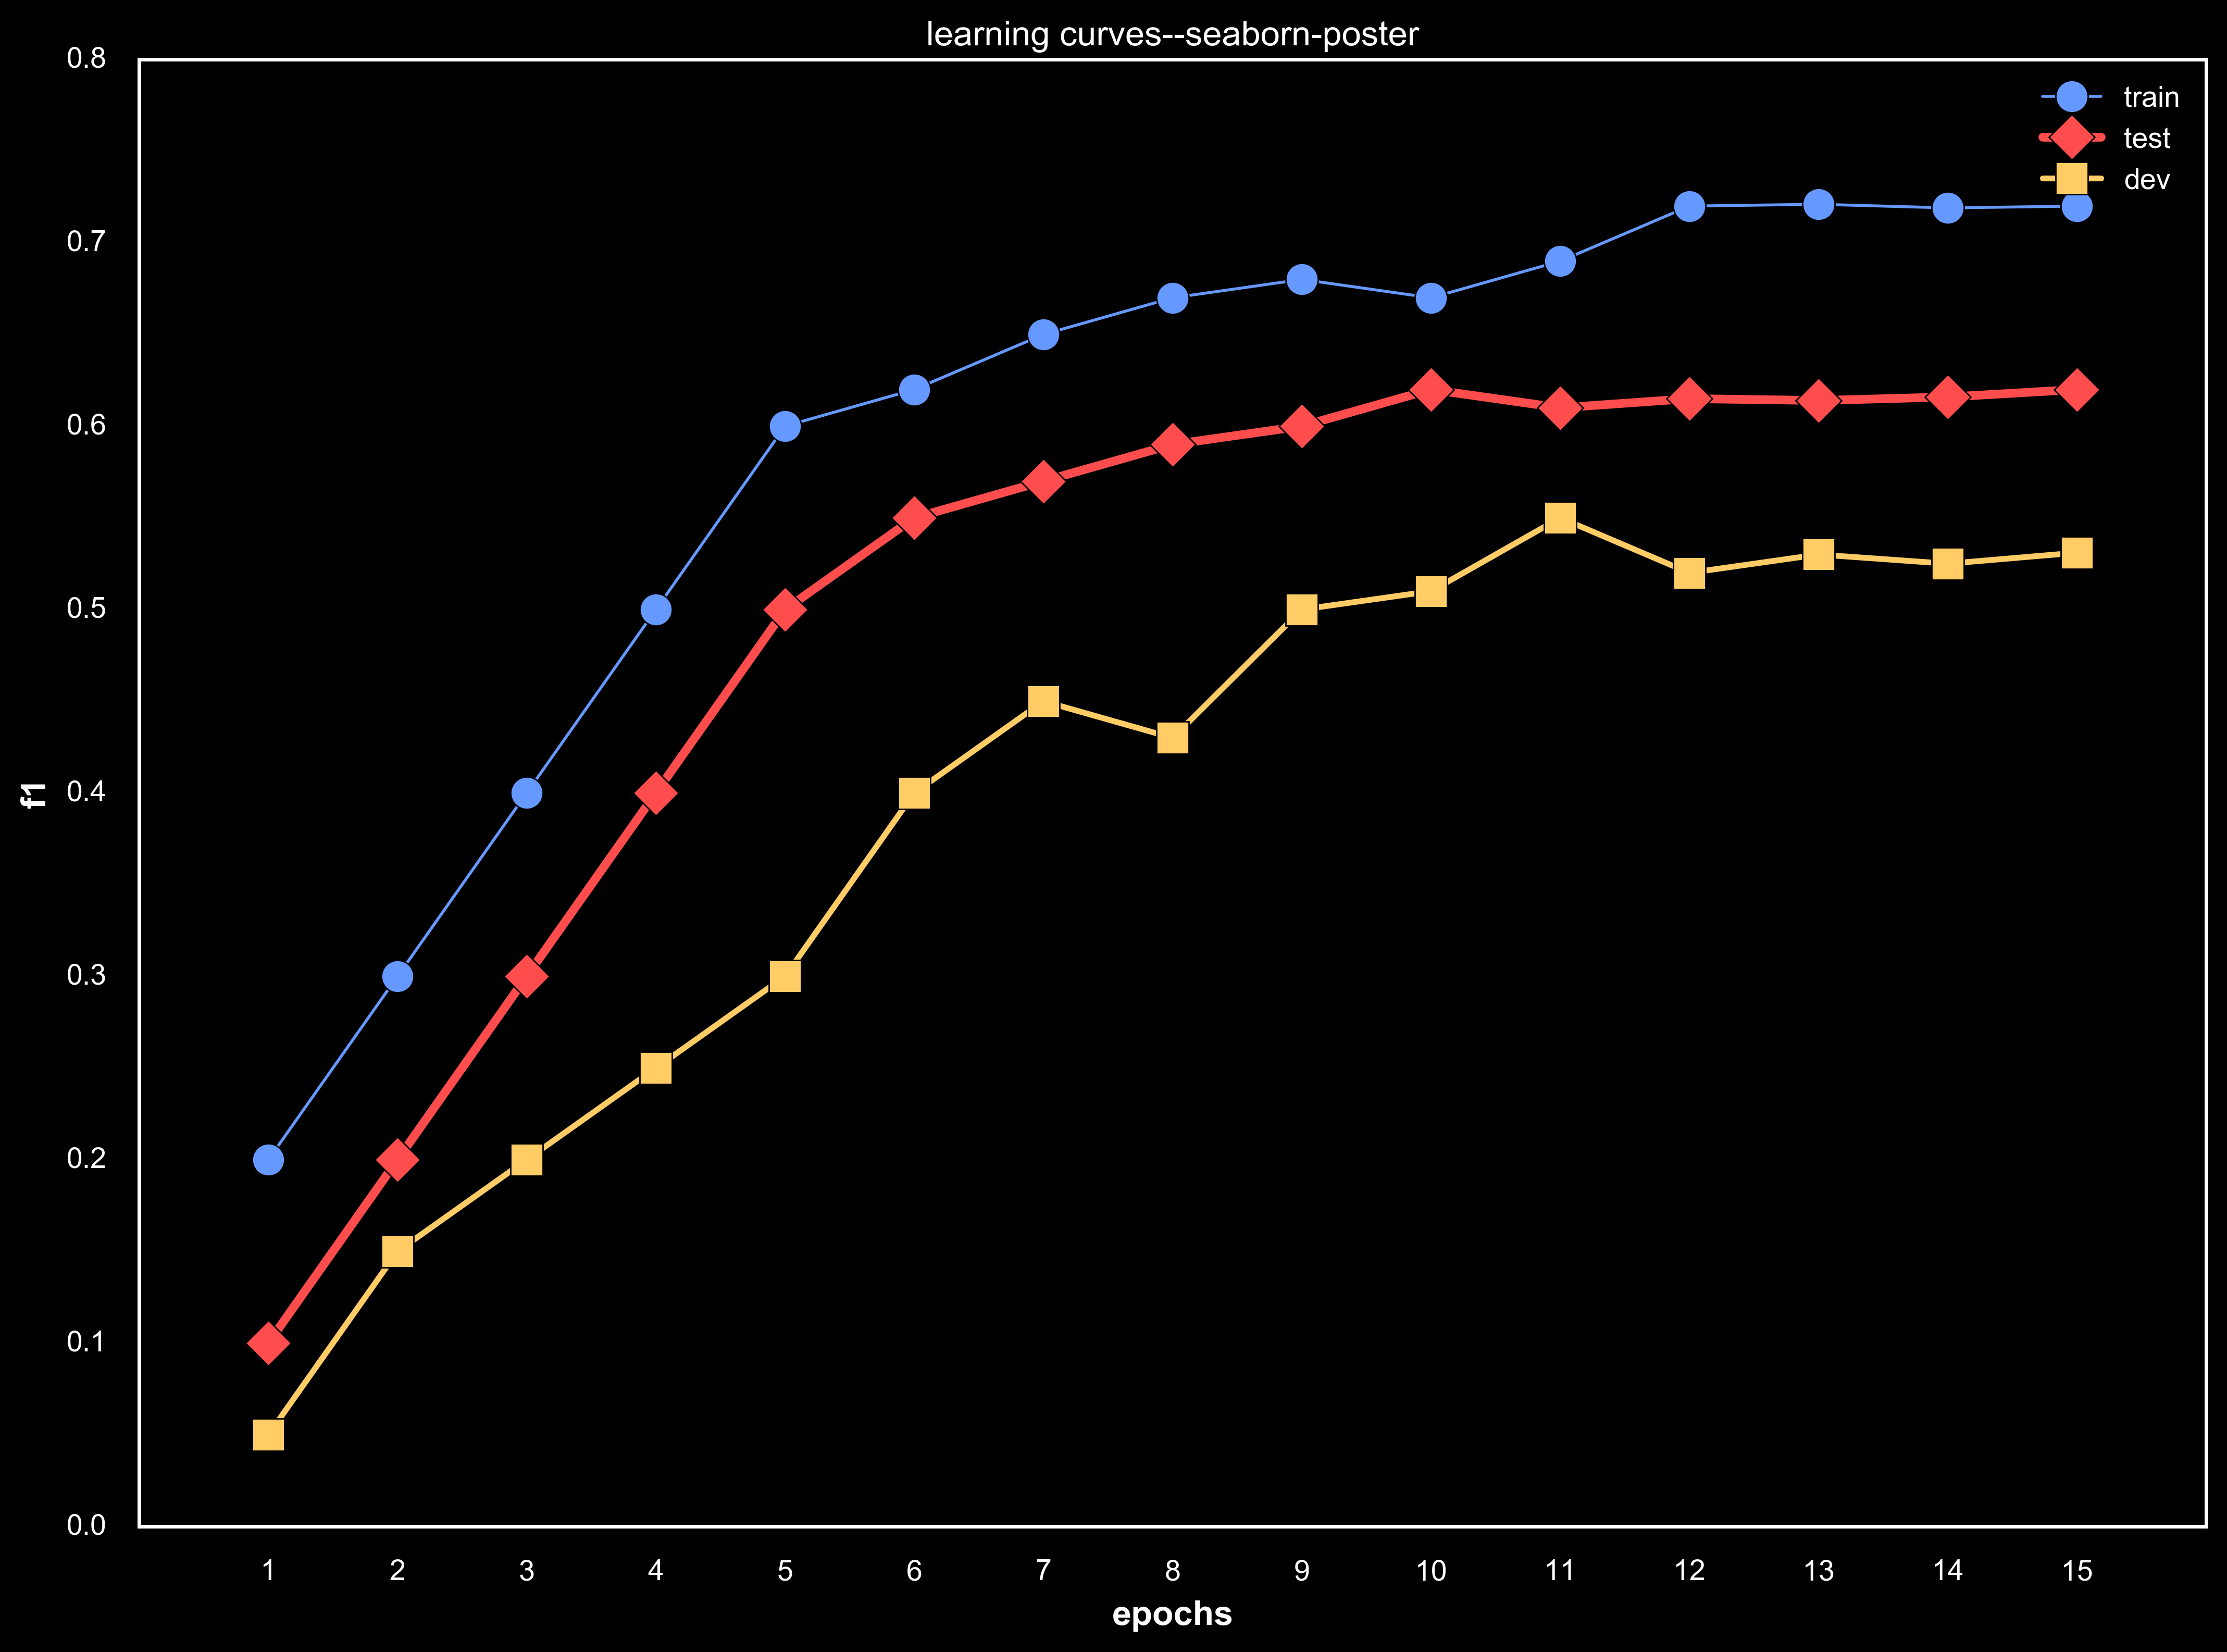

<Figure size 1024x704 with 0 Axes>

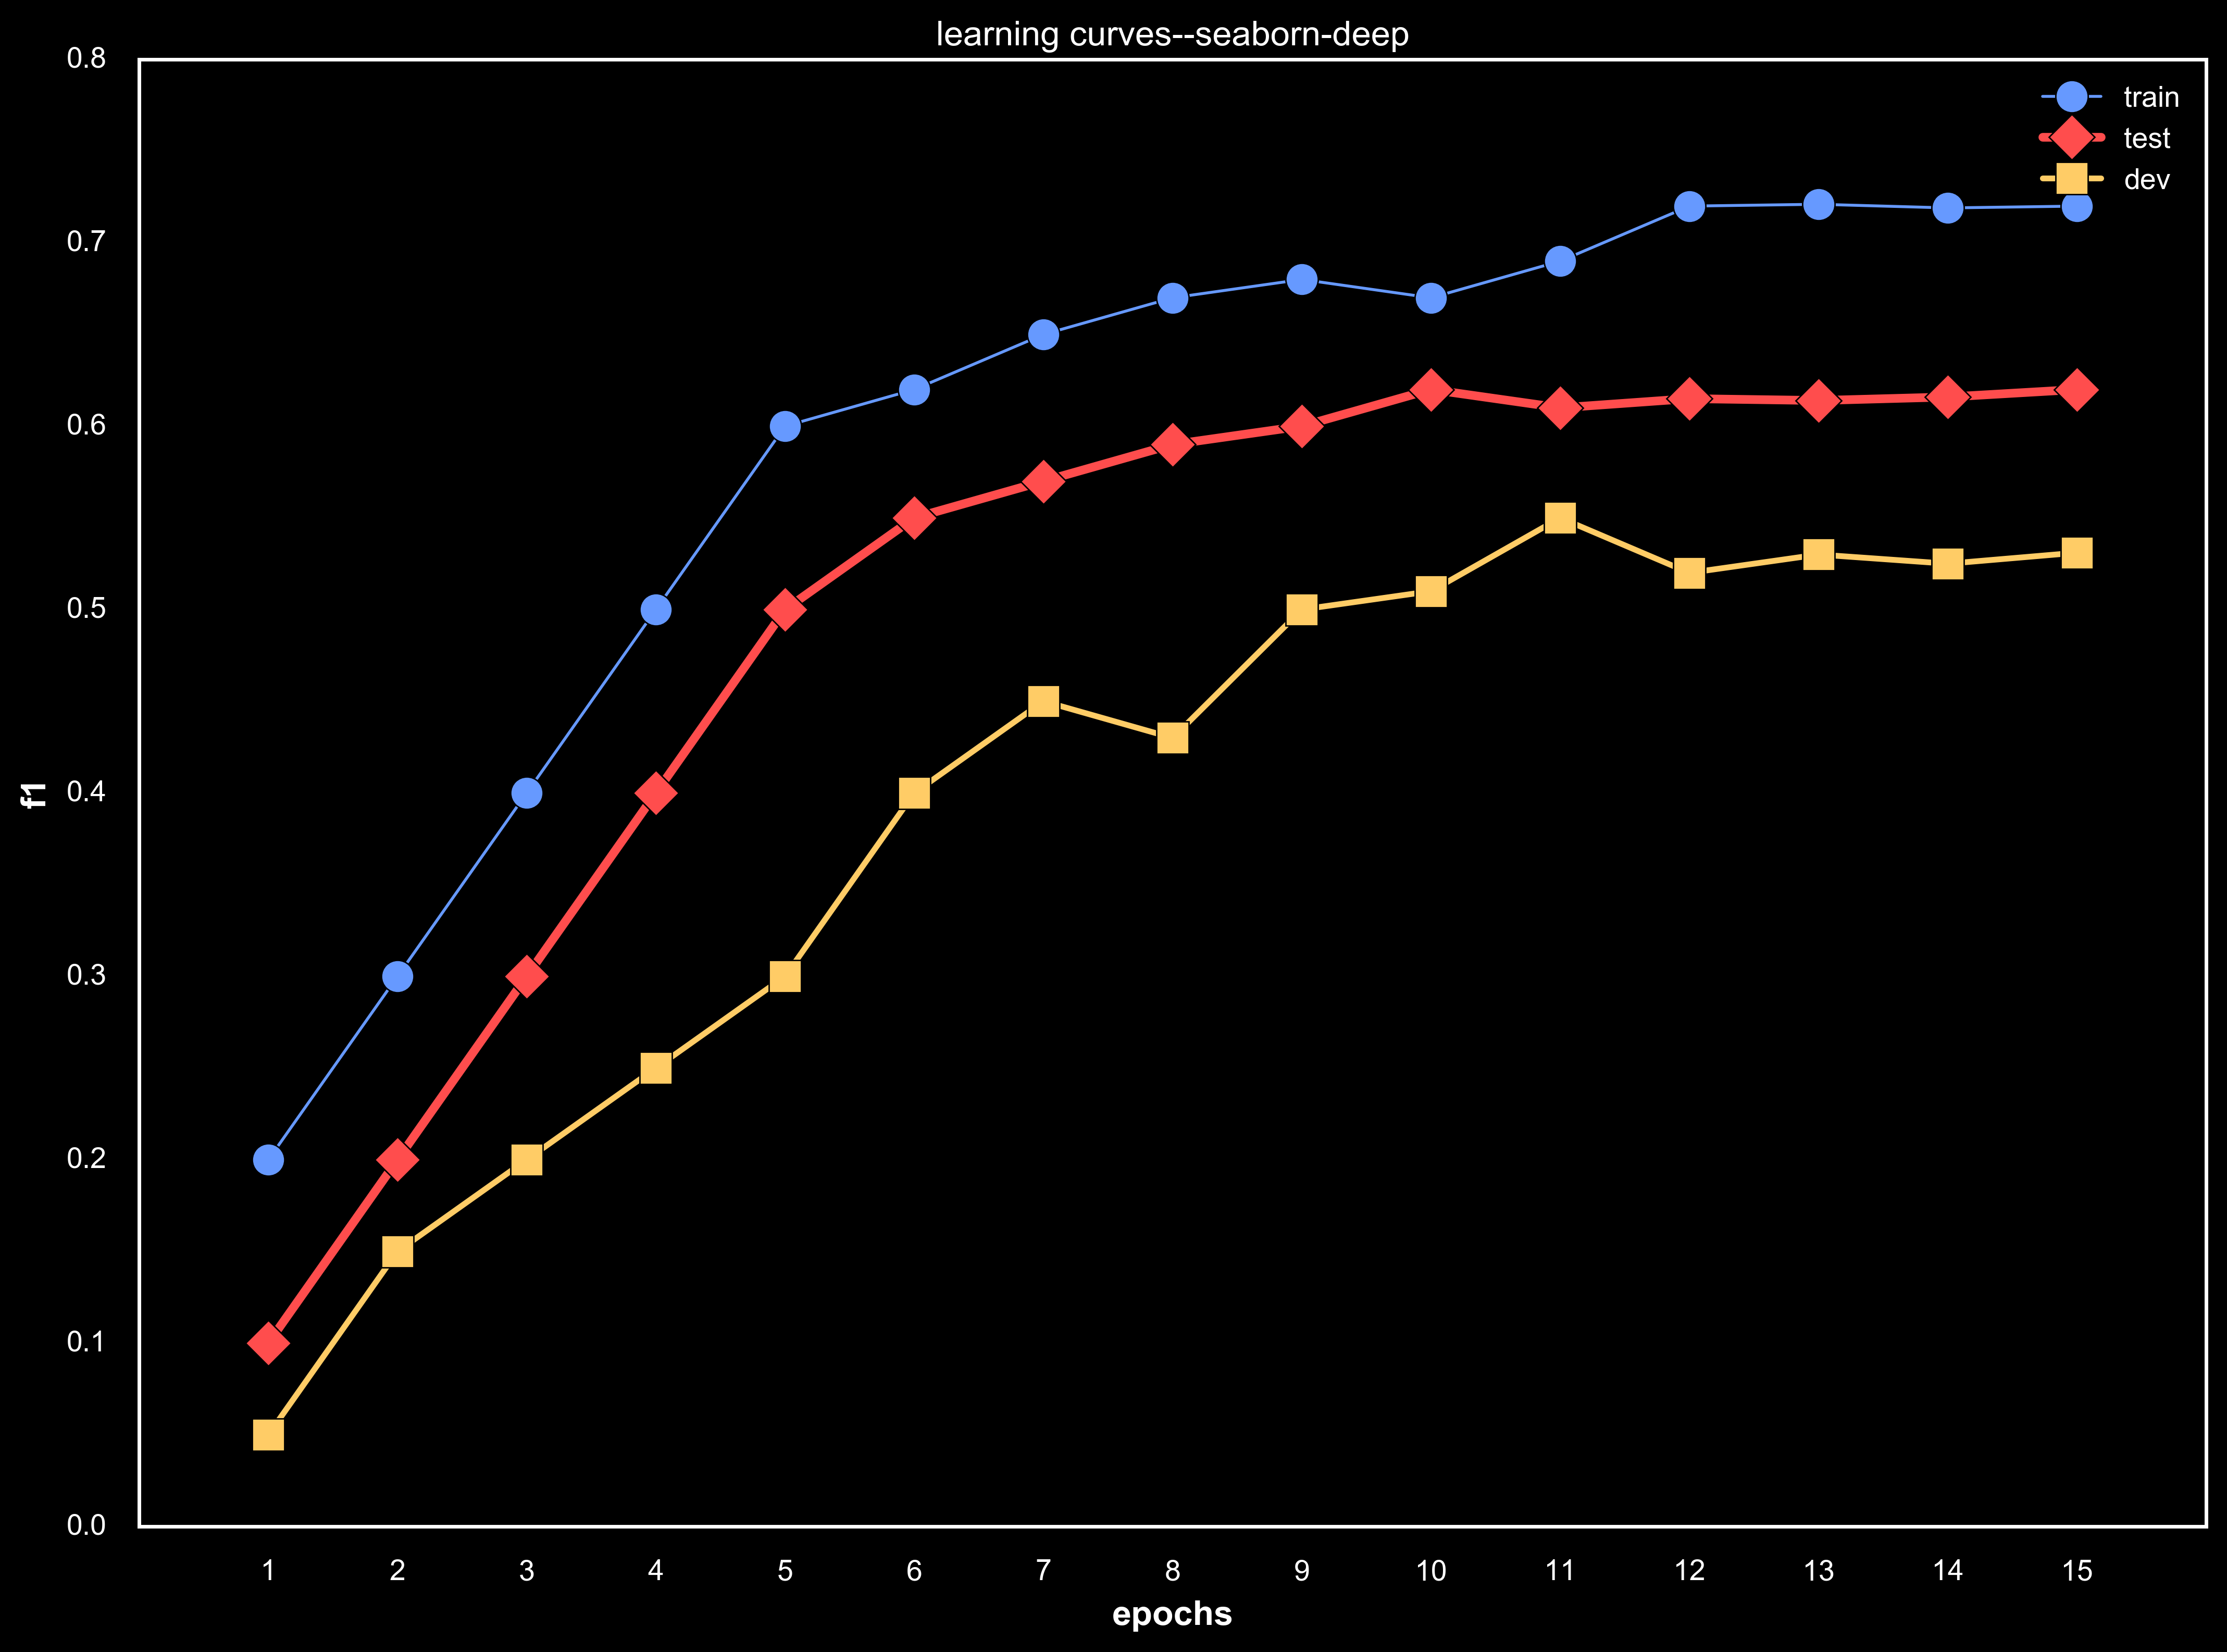

<Figure size 1024x704 with 0 Axes>

In [7]:
for st in plt.style.available:
    matplotlib.style.use(st)
    plot_learning_curves(fig_path + 'learning_curve.png', n_epochs , flist, '--' + st)

In your scripts after every epoch or after every 1K iterations evaluate your model on train, dev and test data and append corresponding scripts. 

## Heatmaps

### Visualize LSTM outputs

Now import prettyplotlib. 

In [8]:
import prettyplotlib as ppl

```visu_lstm_outputs``` illustrates a heatmap of LSTM outputs. More examples can be found here: https://github.com/olgabot/prettyplotlib/wiki/Examples-with-code.

In [9]:
def visu_lstm_outputs(fig_path, LSTM_outputs, sentence_tokenized):
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    
    slen = len(sentence_tokenized)
    fig, ax = ppl.subplots(1)
    fig.set_figheight(15)
    fig.set_figwidth(20)
    ppl.pcolormesh(fig, ax, LSTM_outputs)

    ax.set_xticks(np.arange(0.5, slen + 0.5, 1))
    ax.set_xticklabels(sentence_tokenized)
    ax.set_title('lstm outputs', fontsize = 25)
    plt.show()
    fig.savefig(fig_path)

Let's see how it works for a randomly generated example.

In [10]:
import numpy as np

sentence = 'today is a beautiful day'
sentence_tokenized = sentence.split(' ')
slen = len(sentence_tokenized)
LSTM_hidden_size = 15
LSTM_outputs = np.random.rand(LSTM_hidden_size, slen) 

fig_path = "figs/heatmap_lstm_hidden.png"
visu_lstm_outputs(fig_path, LSTM_outputs, sentence_tokenized)

KeyError: 'axes.color_cycle is not a valid rc parameter. See rcParams.keys() for a list of valid parameters.'

For a tensorflow model you need to retrieve ourputs with ```outputs_op = graph.get_operation_by_name(op_name).outputs[0]```, run the operation ```outputs = session.run(outputs_op)``` and transpose them ```np.asarray(outputs).transpose()```.

## Visualize improvements

If you compare your models with another model, you can visualize improvements and make your results table easier to interpret.

In [11]:
matplotlib.style.use('seaborn-white')

```visu_imporovements``` makes a heatmap of the improvements data and writes improvements values in the center of cells.

In [12]:
def visu_improvements(improvements_data, y_labels = ['model1', 'model2', 'model3', 'model4'], x_labels = ['measure1', 'measure2', 'measure3']):

    fig, ax = plt.subplots(1)
    fig.set_figheight(15)
    fig.set_figwidth(30)
    #plt.pcolormesh(fig, ax, my_data)
    plt.pcolor(improvements_data, cmap=plt.cm.YlGn)
    ax.set_aspect('auto')
    for y in range(improvements_data.shape[0]):
        for x in range(improvements_data.shape[1]):
            plt.text(x + 0.5, y + 0.5, '%.2f' % improvements_data[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=30,
                     weight='bold'
                     )

    ax.set_yticks(np.arange(0.5, len(y_labels) + 0.5, 1))
    ax.set_yticklabels(y_labels, size=25, weight='bold')
    ax.set_xticks(np.arange(0.5, len(x_labels) + 0.5, 1))
    ax.set_xticklabels(x_labels, size=17, weight='bold')
    ax.tick_params(axis='both', labelsize=25)
    ax.set_title('improvements', fontsize = 40)

    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=30)
    fig.savefig(fig_path)

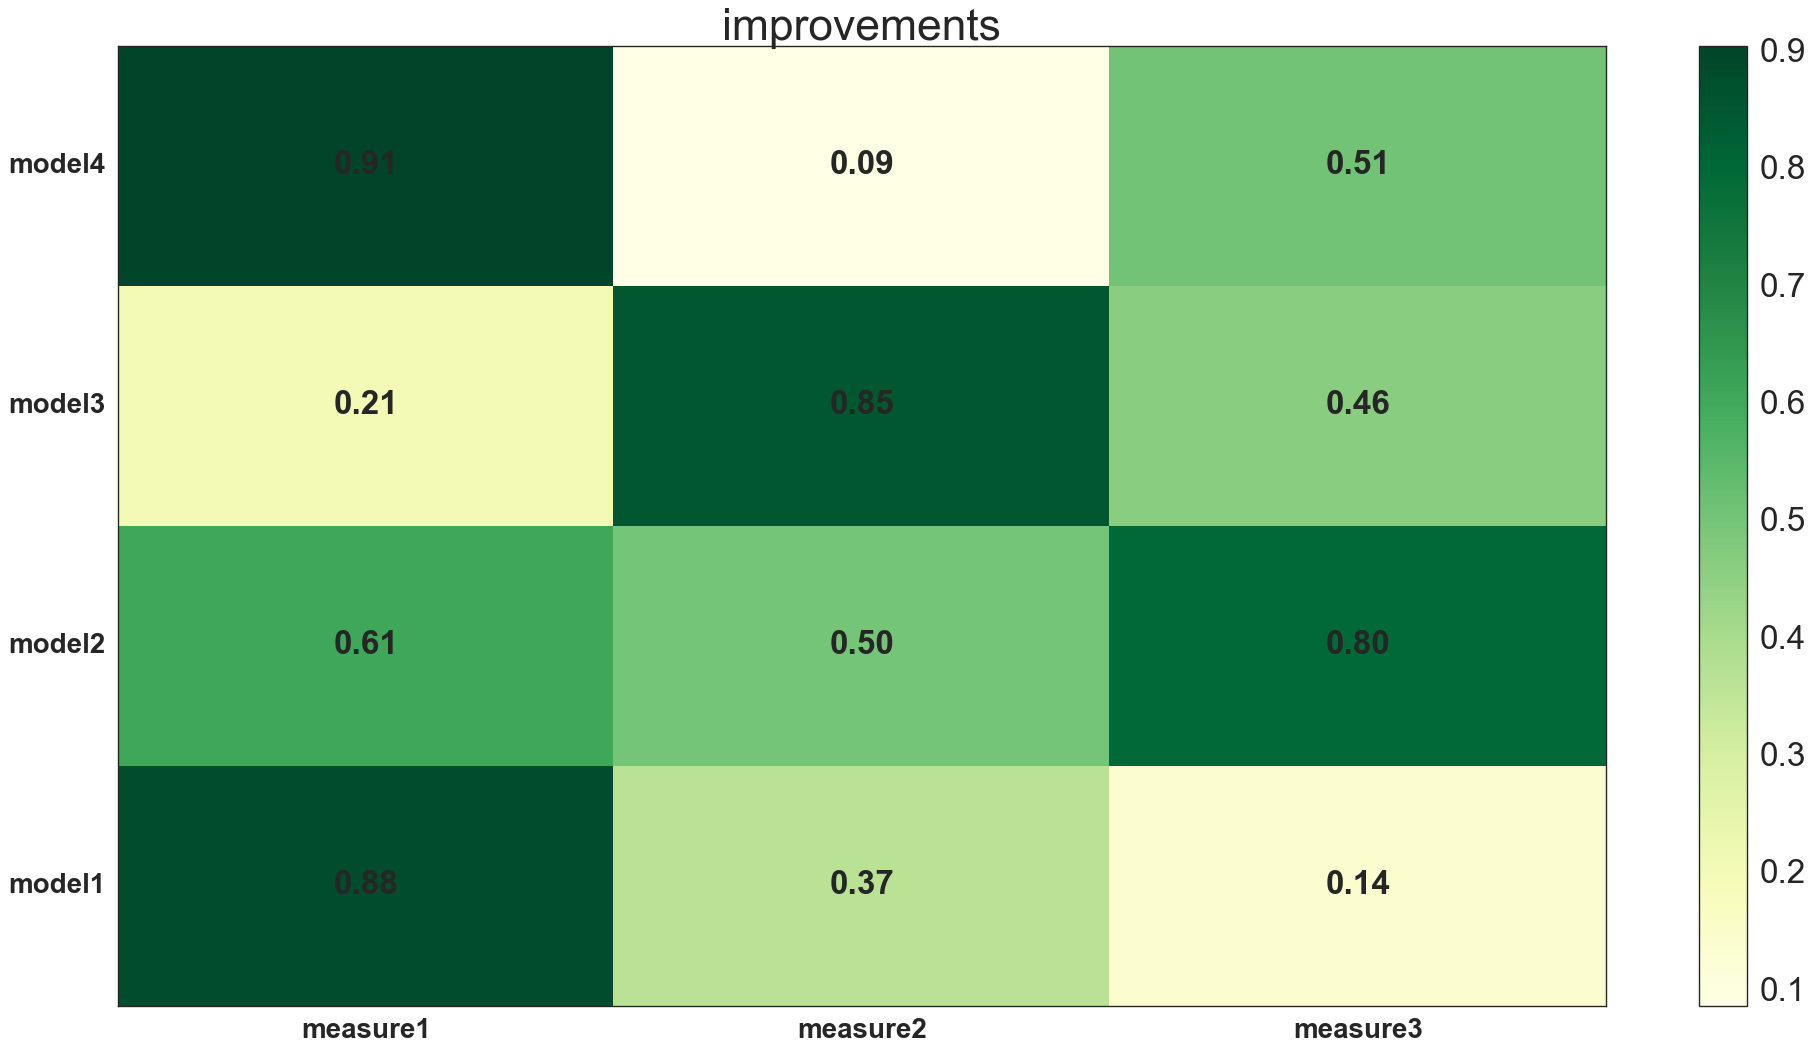

In [13]:
fig_path = "improvements.png"
n_models = 4, 
n_measures = 3
improvements_data = np.random.random_sample((4,3))
np.savetxt(fname='improvements.txt', X=improvements_data, fmt='%10.5f', delimiter='\t')
visu_improvements(improvements_data)

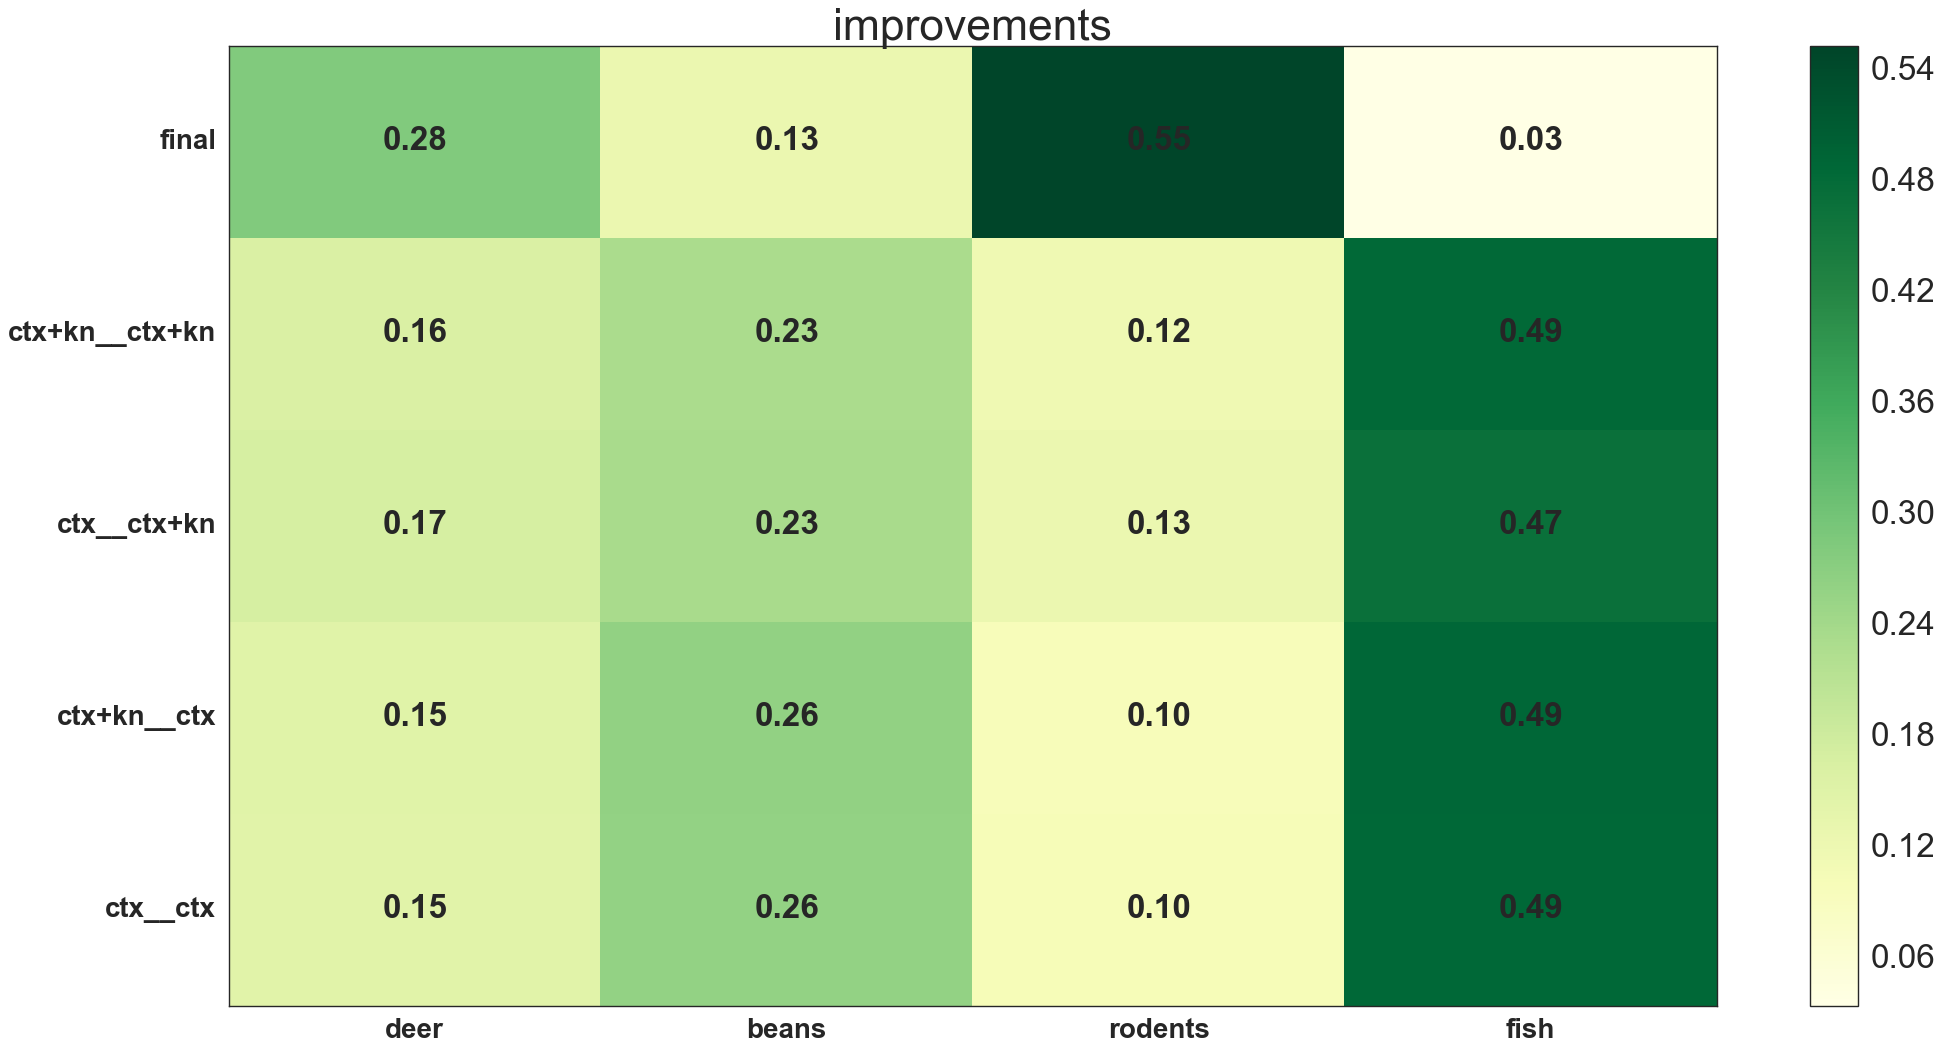

In [21]:
fig_path = "improvements.png"
n_models = 4, 
n_measures = 5

item_str_json = """
     {"id": "7-834", "question_tokens": ["@qstart@", "When", "eagles", "are", "hunting", "in", "a", "field", ",", "some", "of", "their", "nutrients", "come", "from", "@qend@"], "choice_tokens_list": [["@cstart@", "deer", "@cend@"], ["@cstart@", "beans", "@cend@"], ["@cstart@", "rodents", "@cend@"], ["@cstart@", "fish", "@cend@"]], "facts_tokens_list": [["@fstart@", "hunting", "permit", "is", "a", "synonym", "of", "hunting", "license", "@fend@"], ["@fstart@", "hunting", "lodge", "is", "a", "synonym", "of", "lodge", "@fend@"], ["@fstart@", "a", "rifle", "is", "used", "for", "hunting", "@fend@"], ["@fstart@", "hunting", "expedition", "is", "a", "synonym", "of", "campaign", "@fend@"], ["@fstart@", "hunting", "licence", "is", "a", "synonym", "of", "hunting", "license", "@fend@"], ["@fstart@", "Some", "birds", "are", "eagles", "@fend@"], ["@fstart@", "come", "up", "is", "a", "synonym", "of", "muster", "@fend@"], ["@fstart@", "show", "up", "is", "a", "synonym", "of", "come", "on", "@fend@"], ["@fstart@", "come", "upon", "is", "a", "synonym", "of", "enter", "upon", "@fend@"], ["@fstart@", "come", "up", "to", "is", "a", "synonym", "of", "address", "@fend@"], ["@fstart@", "A", "deer", "is", "an", "animal", "@fend@"], ["@fstart@", "Moschus", "moschiferus", "is", "a", "synonym", "of", "musk", "deer", "@fend@"], ["@fstart@", "Cervus", "sika", "is", "a", "synonym", "of", "Japanese", "deer", "@fend@"], ["@fstart@", "Cervus", "nipon", "is", "a", "synonym", "of", "Japanese", "deer", "@fend@"], ["@fstart@", "elaphure", "is", "a", "synonym", "of", "pere", "david", "'s", "deer", "@fend@"], ["@fstart@", "Dama", "dama", "is", "a", "synonym", "of", "fallow", "deer", "@fend@"], ["@fstart@", "cervid", "is", "a", "synonym", "of", "deer", "@fend@"], ["@fstart@", "Elaphurus", "davidianus", "is", "a", "synonym", "of", "pere", "david", "'s", "deer", "@fend@"], ["@fstart@", "withers", "is", "a", "part", "of", "deer", "@fend@"], ["@fstart@", "deer", "tick", "is", "a", "synonym", "of", "Ixodes", "dammini", "@fend@"], ["@fstart@", "If", "you", "want", "to", "fart", "then", "you", "should", "eat", "beans", "@fend@"], ["@fstart@", "*", "Something", "you", "find", "in", "a", "cupboard", "is", "a", "can", "of", "beans", "@fend@"], ["@fstart@", "frijoles", "refritos", "is", "a", "synonym", "of", "refried", "beans", "@fend@"], ["@fstart@", "tattle", "is", "a", "synonym", "of", "spill", "the", "beans", "@fend@"], ["@fstart@", "babble", "out", "is", "a", "synonym", "of", "spill", "the", "beans", "@fend@"], ["@fstart@", "blab", "is", "a", "synonym", "of", "spill", "the", "beans", "@fend@"], ["@fstart@", "blab", "out", "is", "a", "synonym", "of", "spill", "the", "beans", "@fend@"], ["@fstart@", "babble", "is", "a", "synonym", "of", "spill", "the", "beans", "@fend@"], ["@fstart@", "beavers", "are", "rodents", "@fend@"], ["@fstart@", "rats", "are", "rodents", "@fend@"], ["@fstart@", "rodents", "are", "mammals", "@fend@"], ["@fstart@", "bats", "are", "nocturnal", "flying", "rodents", "@fend@"], ["@fstart@", "my", "fish", "is", "colorful", "@fend@"], ["@fstart@", "The", "clown", "fish", "is", "immune", "to", "anemone", "stings", "@fend@"], ["@fstart@", "Some", "fish", "are", "striped", "@fend@"], ["@fstart@", "fish", "fillet", "is", "a", "synonym", "of", "fillet", "@fend@"], ["@fstart@", "scorpaenid", "fish", "is", "a", "synonym", "of", "scorpaenid", "@fend@"], ["@fstart@", "scorpaenoid", "fish", "is", "a", "synonym", "of", "scorpaenoid", "@fend@"], ["@fstart@", "carangid", "is", "a", "synonym", "of", "carangid", "fish", "@fend@"], ["@fstart@", "polly", "fish", "is", "a", "synonym", "of", "parrotfish", "@fend@"], ["@fstart@", "stromateid", "fish", "is", "a", "synonym", "of", "butterfish", "@fend@"], ["@fstart@", "sergeant", "fish", "is", "a", "synonym", "of", "cobia", "@fend@"]], "label_probs": [0.2833872437477112, 0.1275777965784073, 0.5541264414787292, 0.03490845859050751], "label_ranks": [1, 2, 0, 3], "predicted_label": 2, "attentions": {"att_q_to_ch": {"ctx+kn__ctx": [0.14888042211532593, 0.26262471079826355, 0.09808314591646194, 0.49041175842285156], "ctx__ctx+kn": [0.1694306880235672, 0.234678715467453, 0.12690143287181854, 0.46898916363716125], "ctx+kn__ctx+kn": [0.16447050869464874, 0.23234613239765167, 0.11624252051115036, 0.48694083094596863], "ctx__ctx": [0.14824925363063812, 0.26041379570961, 0.10234484076499939, 0.4889921247959137], "final": [0.2833872437477112, 0.1275777965784073, 0.5541264414787292, 0.03490845859050751]}, "att_q_to_f": {"src1": [0.0030588984955102205, 0.003153320634737611, 0.0012897499836981297, 0.003570298431441188, 0.001904725912027061, 7.786039350321516e-05, 0.04235730692744255, 0.18662631511688232, 0.0065375156700611115, 0.14430609345436096, 0.004020577762275934, 0.014959699474275112, 0.018000567331910133, 0.009829147718846798, 0.019271424040198326, 0.0012221697252243757, 0.005260029807686806, 0.04390464350581169, 0.0009949045488610864, 0.008873866870999336, 0.004632036667317152, 0.17035095393657684, 0.010631207376718521, 0.02423202246427536, 0.10938724130392075, 0.01914345845580101, 0.09019909799098969, 0.018867526203393936, 1.1299567631795071e-05, 8.906410585041158e-06, 7.728708624199498e-06, 3.484414264676161e-05, 7.184511105151614e-06, 0.0004963389365002513, 6.883715832373127e-05, 0.0033905706368386745, 0.0033404123969376087, 0.003212718991562724, 0.005252310074865818, 0.005077651236206293, 0.004873991943895817, 0.007554560899734497, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, "att_ch_to_f": {"src1": [0.0030588984955102205, 0.003153320634737611, 0.0012897499836981297, 0.003570298431441188, 0.001904725912027061, 7.786039350321516e-05, 0.04235730692744255, 0.18662631511688232, 0.0065375156700611115, 0.14430609345436096, 0.004020577762275934, 0.014959699474275112, 0.018000567331910133, 0.009829147718846798, 0.019271424040198326, 0.0012221697252243757, 0.005260029807686806, 0.04390464350581169, 0.0009949045488610864, 0.008873866870999336, 0.004632036667317152, 0.17035095393657684, 0.010631207376718521, 0.02423202246427536, 0.10938724130392075, 0.01914345845580101, 0.09019909799098969, 0.018867526203393936, 1.1299567631795071e-05, 8.906410585041158e-06, 7.728708624199498e-06, 3.484414264676161e-05, 7.184511105151614e-06, 0.0004963389365002513, 6.883715832373127e-05, 0.0033905706368386745, 0.0033404123969376087, 0.003212718991562724, 0.005252310074865818, 0.005077651236206293, 0.004873991943895817, 0.007554560899734497, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}}}
     """

def get_ordered_key_values(typed_values, init_value_name="ctx__ctx", final_value_name = "full"):
    changes_names_keys = [x for x in typed_values.keys() if x not in [init_value_name, final_value_name]]
    ordered_keys = [init_value_name] + changes_names_keys + [final_value_name]

    key_values = [typed_values[k] for k in ordered_keys]

    key_values_array = np.asarray(key_values)

    return ordered_keys, key_values_array


import json
item = json.loads(item_str_json.strip())

row_keys, values_array = get_ordered_key_values(item["attentions"]["att_q_to_ch"], init_value_name="ctx__ctx", final_value_name = "final")
import string
choices_keys = [string.ascii_uppercase[x] for x in range(values_array.shape[1])]
choices_keys = [ " ".join([xx for xx in x if "@" not in xx]) for x in item["choice_tokens_list"]]

np.savetxt(fname='values_array.txt', X=values_array, fmt='%10.5f', delimiter='\t')
visu_improvements(values_array, y_labels=row_keys, x_labels=choices_keys)

# questions to facts
facts_keys = [ " ".join([xx for xx in x if "@" not in xx]) for x in item["facts_tokens_list"]]



You will write differences of your models and another model in a text file (one row for one model) and read it as a numpy array.

In [ ]:
improvements_data = np.loadtxt('improvements.txt', delimiter='\t')
visu_improvements(improvements_data)

## tSNE 

Using ```tSNE``` you can visualize your high-dimensional vectors in 2D space. Learn first how to use tSNE effectively https://distill.pub/2016/misread-tsne/.

In [ ]:
def plot(candidates_tsne, n_classes, tags, ids, file_path):
    almost_black = '#262626'

    fig, ax = plt.subplots(1)
    # hard-coded for the example with 3 classes
    colors = ['red', 'blue']

    for k in range(n_classes):
        begin = sum(sizes[:k])
        end = sum(sizes[:k]) + sizes[k]
        x = [candidates_tsne[i, 0] for i in range(begin, end)]
        y = [candidates_tsne[i, 1] for i in range(begin, end)]

        # marks every vector with "id (tag)", where id and tag could be anything you like, e.g. word (POS)
        # every vector point is colored with the corresponding class color
        text = [str(ids[i]) + " (" + str(tags[i]) + ")" for i in range(begin, end)]
        ax.scatter(x, y, label='class'+str(k+1), alpha=0.5, edgecolor=almost_black, facecolor=colors[k], linewidth=0.15)

        for i, txt in enumerate(text):
            ax.annotate(txt, (x[i], y[i]))

    # remove top and right axes
    spines_to_remove = ['top', 'right']
    for spine in spines_to_remove:
        ax.spines[spine].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    spines_to_keep = ['bottom', 'left']
    for spine in spines_to_keep:
        ax.spines[spine].set_linewidth(0.5)
        ax.spines[spine].set_color(almost_black)
        
    # make axis almost black
    ax.xaxis.label.set_color(almost_black)
    ax.yaxis.label.set_color(almost_black)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_color(almost_black)
    ax.set_title('tsne', fontsize = 20)

    # make the legend background light gray
    light_grey = np.array([float(248)/float(255)]*3)
    legend = ax.legend(frameon=True, scatterpoints=1)
    rect = legend.get_frame()
    rect.set_facecolor(light_grey)
    rect.set_linewidth(0.0)

    # change the legend label colors to almost black
    texts = legend.texts
    for t in texts:
        t.set_color(almost_black)

    ax.grid(False)
    plt.show()
    fig.savefig(str(file_path), dpi=200)
    plt.close()

Make random classification dataset.

In [ ]:
import sklearn
from sklearn import datasets

n_classes = 2
X, y = datasets.make_classification(n_samples=10, n_features=20, class_sep=10)
types = [[] for _ in range(n_classes)]
sizes = [0]*n_classes
for i, l in enumerate(y):
    types[l].append(X[i])
    sizes[l] += 1

for i in range(n_classes):
    types[i] = np.asarray(types[i]).reshape((sizes[i], 20))

And plot.

In [ ]:
from sklearn.manifold import TSNE

joint = np.concatenate(types, 0)
tsne = TSNE(init='pca', n_iter=5000)
candidates_tsne = tsne.fit_transform(joint)
file_path = "figs/tsne.png"
tags = [1]*sizes[0] + [2]*sizes[1]
ids = range(sum(sizes))
plot(candidates_tsne, n_classes, tags, ids, file_path)

When running on serves comment ```plt.show``` for all examples.

## Stacked bars plot

In [ ]:
#from matplotlib.font_manager import FontProperties
from operator import add

In [ ]:
def tags_stacked_bars(distr1, distr2):
    distr1.sort(key=lambda item: item[1], reverse=True)
    distr1_dict = dict(distr1)

    distr2.sort(key=lambda item: item[1], reverse=True)
    distr2_dict = dict(distr2)
    
    # plot tags which has positive frequency in the first distribution and higher than one in the second
    plot_tags = [tag for tag, freq in distr1 if freq > 0.0]

    other = []
    for tag, freq in distr2:
        if freq > 1.0 and tag not in plot_tags:
            plot_tags.append(tag)
        else:
            other.append(freq)

    distr1_pruned_dict = {}
    for key in plot_tags:
        if key in distr1_dict:
            distr1_pruned_dict[key] = distr1_dict[key]
        else:
            distr1_pruned_dict[key] = 0

    distr2_pruned_dict = {}
    for key in plot_tags:
        if key in distr2_dict:
            distr2_pruned_dict[key] = distr2_dict[key]
        else:
            distr2_pruned_dict[key] = 0

    distr1_freq = []
    distr2_freq = []
    for tag in plot_tags:
        distr1_freq.append(distr1_pruned_dict[tag])
        distr2_freq.append(distr2_pruned_dict[tag])
    plot_tags.append("other")
    distr1_freq.append(0.0)
    distr2_freq.append(np.mean(np.asarray(other)))
    
    # plot stacked bar
    width = 0.4
    height_cumulative = [0.0, 0.0]
    plots = []
    ind = [0, 0.5]
    fig = plt.figure(figsize=(11, 11))
    ax = fig.add_subplot(1, 1, 1)

    colors = ['#0066ff', '#ffcc99', '#adebad', '#ff5c33', '#ac3973', '#ffbf00', '#7979d2', '#00cc99']

    for k in range(len(plot_tags)):
        if k < 8:
            color = colors[k]
        else:
            color = np.random.rand(3)
        if k == 0:
            plots.append(ax.bar(ind, [distr1_freq[k], distr2_freq[k]], width, color=color, edgecolor='black'))
        else:
            plots.append(ax.bar(ind, [distr1_freq[k], distr2_freq[k]], width,
                                bottom=height_cumulative, color=color, edgecolor='black'))
        height_cumulative = map(add, [distr1_freq[k], distr2_freq[k]], height_cumulative)

    plt.ylabel('median occurrence of a tag', fontsize=20)
    title = 'distribution of tags'
    plt.title(title, fontsize=25)
    plt.xticks([ind[0]+width/2.0, ind[1]+width/2], ["distr1", "distr2"], fontsize=20)
    plt.yticks(np.arange(0, sum(distr2_freq), 3))
    handles = [p[0] for p in plots]
    plt.legend(handles[::-1], plot_tags[::-1], prop={'size': 10}, loc='center left', bbox_to_anchor=(1, 0.5))
    fig_path = "figs/stacked_bars.png"
    plt.show()
    fig.savefig(fig_path)

In [ ]:
distr1 = [["NN", 5.0], ["NP", 3.0], ["PP", 2.0], ["ADV", 2.0], ["S", 2.0], ["ART", 2.0], ["$.", 1.0], ["KON", 1.0], ["ADJA", 1.0], ["APPR", 1.0], ["VVINF", 1.0], ["VVFIN", 1.0], ["$,", 1.0], ["KOUS", 1.0], ["VP", 1.0], ["VAFIN", 1.0], ["PPER", 1.0], ["CVZ", 0.0], ["AVP", 0.0], ["CAP", 0.0], ["CVP", 0.0], ["NE", 0.0], ["CPP", 0.0], ["VMFIN", 0.0], ["PTKNEG", 0.0], ["VAPP", 0.0], ["APPO", 0.0], ["PRF", 0.0], ["VVIZU", 0.0], ["NM", 0.0], ["PDAT", 0.0], ["PIAT", 0.0], ["ADJD", 0.0], ["$[", 0.0], ["PTKVZ", 0.0], ["PRELS", 0.0], ["PIS", 0.0], ["ROOT", 0.0], ["PROAV", 0.0], ["APZR", 0.0], ["PPOSAT", 0.0], ["CO", 0.0], ["CNP", 0.0], ["PDS", 0.0], ["VVPP", 0.0], ["AP", 0.0], ["XY", 0.0], ["PWAV", 0.0], ["CS", 0.0], ["PTKANT", 0.0], ["VZ", 0.0], ["PTKZU", 0.0], ["CARD", 0.0], ["PWS", 0.0], ["VMINF", 0.0], ["MPN", 0.0], ["VAINF", 0.0], ["APPRART", 0.0], ["KOKOM", 0.0], ["PTKA", 0.0], ["PIDAT", 0.0], ["TRUNC", 0.0], ["KOUI", 0.0], ["CAVP", 0.0]]
distr2 = [["NN", 10.0], ["NP", 7.0], ["S", 7.0], ["PP", 5.0], ["ADV", 4.0], ["ADJA", 3.0], ["APPR", 3.0], ["VP", 3.0], ["ART", 3.0], ["VVINF", 2.0], ["VVFIN", 2.0], ["VAFIN", 2.0], ["PPER", 2.0], ["KON", 1.0], ["VMFIN", 1.0], ["ADJD", 1.0], ["PTKNEG", 1.0], ["$.", 1.0], ["$,", 1.0], ["CNP", 1.0], ["KOUS", 1.0], ["PDS", 1.0], ["VVPP", 1.0], ["AP", 1.0], ["CS", 1.0], ["APPRART", 1.0], ["CVZ", 0.0], ["AVP", 0.0], ["CAP", 0.0], ["PWAT", 0.0], ["CVP", 0.0], ["NE", 0.0], ["CPP", 0.0], ["VAPP", 0.0], ["APPO", 0.0], ["PRF", 0.0], ["VVIZU", 0.0], ["NM", 0.0], ["PDAT", 0.0], ["PIAT", 0.0], ["FM", 0.0], ["$[", 0.0], ["PTKVZ", 0.0], ["PRELS", 0.0], ["PIS", 0.0], ["ROOT", 0.0], ["PROAV", 0.0], ["TRUNC", 0.0], ["PPOSAT", 0.0], ["CO", 0.0], ["XY", 0.0], ["PWAV", 0.0], ["PTKANT", 0.0], ["VZ", 0.0], ["PTKZU", 0.0], ["CARD", 0.0], ["PWS", 0.0], ["PRELAT", 0.0], ["VVIMP", 0.0], ["VMINF", 0.0], ["MPN", 0.0], ["VAINF", 0.0], ["KOKOM", 0.0], ["PTKA", 0.0], ["PIDAT", 0.0], ["APZR", 0.0], ["KOUI", 0.0], ["CAVP", 0.0]]

tags_stacked_bars(distr1, distr2)